# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

# Load Libraries

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score,confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_recall_curve

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping



# Stage 1 data

## 1. Data Preprocessing and Feature Engineering

In [27]:
#Load Dataset
#Install gdown for importing the data
!pip install -q gdown
import gdown

# Stage 1 Data File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"
output_file= "Stage1_data.csv"
gdown.download(file_url, output_file, quiet=False)

# Load and Preview Data
applicant_df_original = pd.read_csv(output_file)
applicant_df = applicant_df_original.copy()
print("Initial data shape:", applicant_df.shape)
applicant_df.head()

Downloading...
From: https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6
To: /content/Stage1_data.csv
100%|██████████| 6.06M/6.06M [00:00<00:00, 204MB/s]


Initial data shape: (25059, 16)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  
0  University of Aberdeen  
1  University of Aberdeen  
2  University of Aberdeen  
3  University of Aberdeen  
4  University of Aberdeen

###EDA

In [28]:
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

The data set contains 25 059 rows - each representing a learner ('LearnerCode') enrolled in one of the study group center('CentreName) and 16 columns, containing details (features) about the demographic details (e.g. gender, nationality) and course-related details (e.g. course name, course level, first-intake status). Variable 'CompletedCourse' is the target variable, that indicates whether student completed the course or dropped out.

In [29]:
missing_values_1 = applicant_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (applicant_df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into a single DataFrame
missing_data_1 = pd.DataFrame({
    'Missing Count': missing_values_1,
    'Missing %': missing_percentage
})
print(missing_data_1[missing_data_1['Missing Count'] > 0])

                   Missing Count  Missing %
DiscountType               17464  69.691528
HomeState                  16134  64.384054
HomeCity                    3448  13.759528
ProgressionDegree            875   3.491759


DiscountType ~70%, HomeState 64%, HomeCity 14% and ProgressionDegree ~4 features are containing missing values which will be handled during the data cleaning process.  

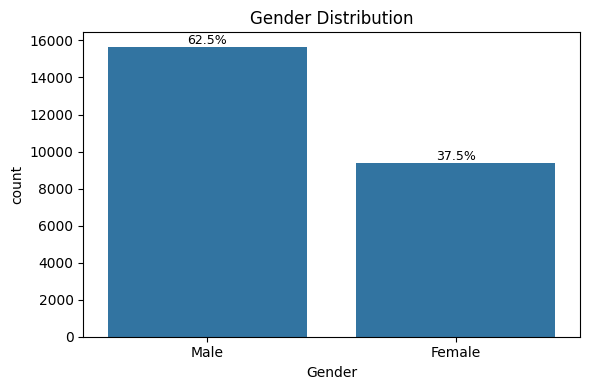

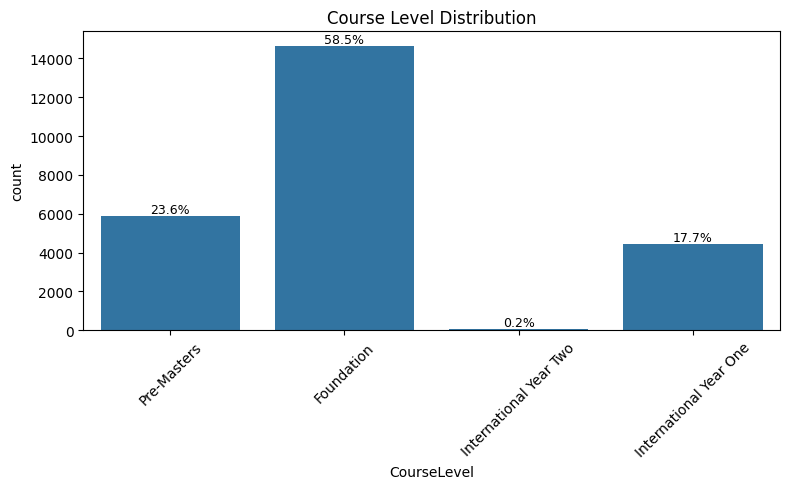

In [30]:
# Gender distribution
plt.figure(figsize=(6, 4))
ax1 = sns.countplot(data=applicant_df, x='Gender')
plt.title('Gender Distribution')
total = len(applicant_df)

# Add percentage labels
for container in ax1.containers:
    labels = [f'{100 * bar.get_height() / total:.1f}%' for bar in container]
    ax1.bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

# Course level distribution
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(data=applicant_df, x='CourseLevel')
plt.title('Course Level Distribution')
plt.xticks(rotation=45)
total = len(applicant_df)

# Add percentage labels
for container in ax2.containers:
    labels = [f'{100 * bar.get_height() / total:.1f}%' for bar in container]
    ax2.bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


Around 63% of learners are male. More than hald (~59) of the students are enrolled in founation course level, and another ~40% are distributed to other 3 course levels. only 0.2% of total applicants are enrolled in "International Year Two" level of the course.

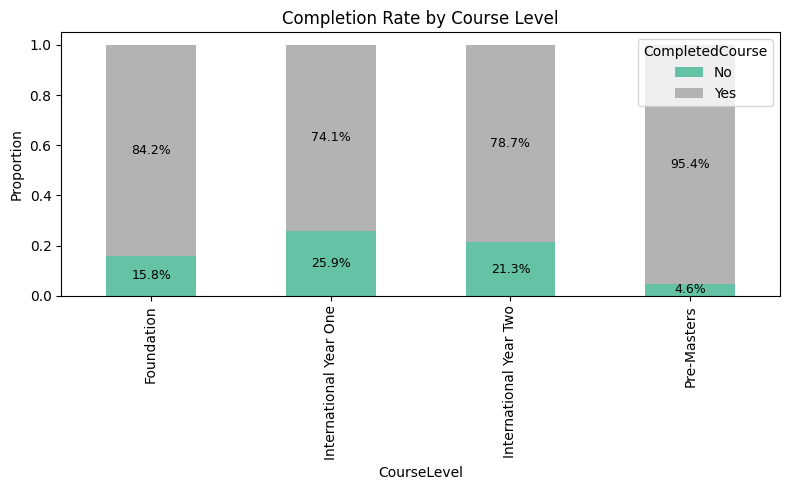

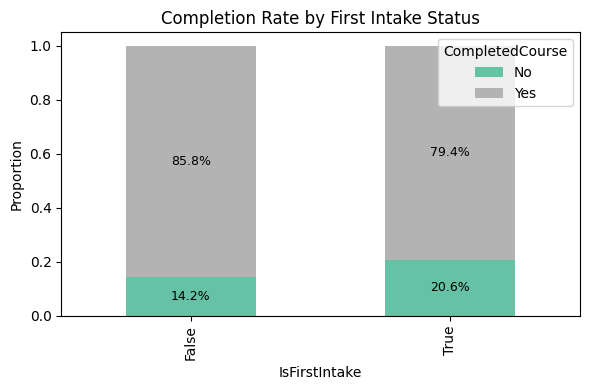

In [31]:
# Completion Rate by Course Level
ct1 = pd.crosstab(applicant_df['CourseLevel'], applicant_df['CompletedCourse'], normalize='index')
ax1 = ct1.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

plt.title('Completion Rate by Course Level')
plt.ylabel('Proportion')
plt.ylim(0, 1.05)

# Add percentage labels
for c in ax1.containers:
    ax1.bar_label(c, labels=[f'{v*100:.1f}%' if v > 0 else '' for v in c.datavalues],
                  label_type='center', fontsize=9)

plt.tight_layout()
plt.show()


# Completion Rate by First Intake
ct2 = pd.crosstab(applicant_df['IsFirstIntake'], applicant_df['CompletedCourse'], normalize='index')
ax2 = ct2.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

plt.title('Completion Rate by First Intake Status')
plt.ylabel('Proportion')
plt.ylim(0, 1.05)

# Add percentage labels
for c in ax2.containers:
    ax2.bar_label(c, labels=[f'{v*100:.1f}%' if v > 0 else '' for v in c.datavalues],
                  label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

Highest Dropout rate is observed with applicants entrolled in "International Year One" level, followed by "International Year Two". Lower dropout (~5%) is observed with pre-masters students. Intuitively, first intakers are more proned to dropout (20.6%)

### Data Cleaning

In [32]:
#Remove unnecessary columns(LearnerCode)
if 'LearnerCode' in applicant_df.columns:
    applicant_df.drop(['LearnerCode'], axis=1, inplace=True)

#Convert 'DateofBirth' to 'Age' and drop original column
applicant_df['Age']=datetime.now().year - pd.to_datetime(applicant_df['DateofBirth'], dayfirst=True, errors='coerce').dt.year
applicant_df.drop(['DateofBirth'], axis=1, inplace=True)

In [33]:
# Identify high-cardinality object columns
high_card_cols = [
    col for col in applicant_df.select_dtypes(include='object').columns
    if applicant_df[col].nunique() > 200
]

# Print the column names and their unique value counts
for col in high_card_cols:
    print(f"{col}: {applicant_df[col].nunique()} unique values")

HomeState: 2448 unique values
HomeCity: 5881 unique values
ProgressionDegree: 2616 unique values


In [34]:
#Drop high cardinality columns (>200 unique values)
applicant_df.drop(high_card_cols, axis=1, inplace=True)

In [35]:
# Set threshold
missing_threshold = 0.5

# Identify columns with >50% missing values
missing_cols_s1 = [
    col for col in applicant_df.columns
    if applicant_df[col].isnull().mean() > missing_threshold
]

# Print columns with their missing value percentages
for col in missing_cols_s1:
    missing_pct = applicant_df[col].isnull().mean() * 100
    print(f"{col}: {missing_pct:.2f}% missing")

DiscountType: 69.69% missing


In [36]:
# Drop "DiscountType" (since missing values are more than 50%)
applicant_df.drop(missing_cols_s1, axis=1, inplace=True)

Afer removing "LearnerCode", also columns with high cardibclaity (>200 unique values) and missing values (>50%) "HomeCity', "DiscountType", "HomeState" and "ProgressionDegree" featured were dropped.


### Feature Engineering

In [37]:
# Encode target variable ('CompletedCourse')
# Flit target encoding (1=Dropouts and 0=Compliters)
applicant_df['CompletedCourse'] = applicant_df['CompletedCourse'].map({'Yes': 0, 'No': 1})

# Ordinal encoding for CourseLevel
if 'CourseLevel' in applicant_df.columns:
    ordinal_order = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]
    ordinal_encoder = OrdinalEncoder(categories=ordinal_order, handle_unknown='use_encoded_value', unknown_value=-1)
    applicant_df[['CourseLevel']]=ordinal_encoder.fit_transform(applicant_df[['CourseLevel']])

In [38]:
# One-hot encode remaining categorical features
categorical_cols=applicant_df.select_dtypes(include='object').columns.tolist()
applicant_df=pd.get_dummies(applicant_df, columns=categorical_cols, drop_first=True)

In [39]:
print("Shape of data:", applicant_df.shape)
print("Remaining columns:", applicant_df.columns.tolist())
print("Mssing values:", applicant_df.isnull().sum().sum())
print("Dataframe info:")
applicant_df.info()
print("Dataframe head:")
applicant_df.head()

Shape of data: (25059, 390)
Remaining columns: ['CourseLevel', 'IsFirstIntake', 'CompletedCourse', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham', 'CentreName_ISC_Holland', 'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston', 'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster', 'CentreName_ISC_Leeds', 'CentreName_ISC_Lincoln', 'CentreName_ISC_London', 'CentreName_ISC_Online', 'CentreName_ISC_RHUL', 'CentreName_ISC_Sheffield', 'CentreName_ISC_Strathclyde', 'CentreName_ISC_Surrey', 'CentreName_ISC_Sussex', 'CentreName_ISC_Teesside', 'BookingType_Direct', 'LeadSource_Digital (Web)', 'LeadSource_Re-enrolment', 'LeadSource_Referrals', 'LeadSource_Sponsor', 'LeadSource_Standard Agent Booking', 'LeadSource_Walk-in', 'Gender_Male', 'Nationality_Afghan', 'Nationality_Albanian', 'Nationality_Algerian', 'Nationality_American', 'Nationality_Angolan', 'Nationality_Antiguan', 'Nationality_Argentine', 'Nationality_Armenian', 'Nationality_Australian', 'Nationality

CourseLevel  IsFirstIntake  CompletedCourse  Age  CentreName_ISC_Cardiff  \
0          3.0           True                0   27                   False   
1          0.0          False                0   27                   False   
2          2.0          False                0   25                   False   
3          2.0           True                0   26                   False   
4          3.0           True                0   29                   False   

   CentreName_ISC_Dublin  CentreName_ISC_Durham  CentreName_ISC_Holland  \
0                  False                  False                   False   
1                  False                  False                   False   
2                  False                  False                   False   
3                  False                  False                   False   
4                  False                  False                   False   

   CentreName_ISC_Huddersfield  CentreName_ISC_Kingston  ...  \
0                        False                    False  ...   
1                        False                    False  ...   
2                        False                    False  ...   
3                        False                    False  ...   
4                        False                    False  ...   

   ProgressionUniversity_University College Dublin  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Aberdeen  \
0                                          True   
1                                          True   
2                                          True   
3                                          True   
4                                          True   

   ProgressionUniversity_University of Huddersfield  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversity_University of Leeds  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversity_University of Lincoln  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ProgressionUniversity_University of Sheffield International College  \
0                                              False                     
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     

   ProgressionUniversity_University of Strathclyde  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Surrey  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   ProgressionUniversity_University of Sussex  \
0                        

Performed ordinal encoding for ordinal data, "CourseLevel".Perfrmed one-hot encoding for all other categorical data.

As a result, dataframe contains again 25 059 observations and 390 columns.

Data is clean from missing values.

In [40]:
# Convert boolean columns to integers (doesn't matter for XGBoost but especially important for NN)
bool_cols_s1 = applicant_df.select_dtypes(include='bool').columns
applicant_df[bool_cols_s1] = applicant_df[bool_cols_s1].astype(int)

# Confirm the conversion
print("Data types after conversion:")
print(applicant_df.dtypes.value_counts())


Data types after conversion:
int64      388
float64      1
int32        1
Name: count, dtype: int64


 Boolean columns (True/False) were converted into integers (1/0) in the dataset, it is important, especially for machine learning models like neural networks, which often require numeric input.

 XGBoost can handle booleans, but converting is still a good  for compatibility across models.

## 2. Data Preparation for Modeling

### Target Variable Distribution

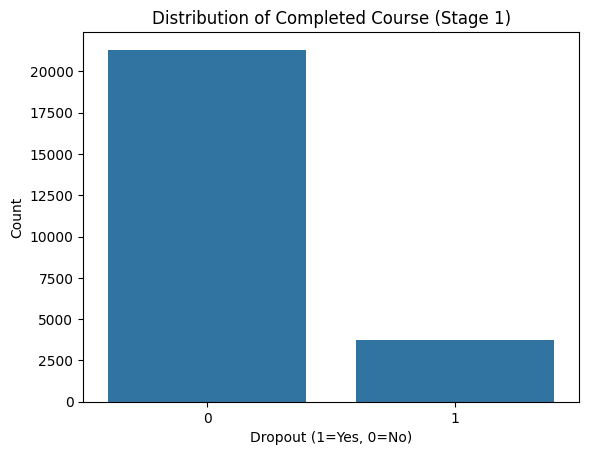

Target class (Class 1) distribution (Stage 1):
CompletedCourse
0    0.850194
1    0.149806
Name: proportion, dtype: float64


In [41]:
sns.countplot(x='CompletedCourse', data=applicant_df)
plt.title('Distribution of Completed Course (Stage 1)')
plt.xlabel('Dropout (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

print("Target class (Class 1) distribution (Stage 1):")
print(applicant_df['CompletedCourse'].value_counts(normalize=True))

The data is imbalanced with ~85% (0 in the dataset) belonging to compliters class and ~15% (1 in the dataset) class. During the modeling, imbalance class will be handled with class weighting.

### Training/Test Split

In [42]:
# Split data into 80% train and 20% test (as per rubric)
X1 = applicant_df.drop("CompletedCourse", axis=1)
y1 = applicant_df["CompletedCourse"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, stratify=y1, random_state=42
)

print(f"Train shape: {X1_train.shape}, Test shape: {X1_test.shape}")

Train shape: (20047, 389), Test shape: (5012, 389)


To prepare the data for machine learning, the dataset was split into features (X1) and the target variable (y1), which indicates whether a student completed their course.

Following standard practice and the project rubric, the data was split into 80% training and 20% test sets using train_test_split() from Scikit-learn. This ensures that model performance is evaluated on data it has not seen during training. Stratification was applied to preserve the class balance (i.e., the proportion of students who completed the course vs. those who didn’t) across both sets.

While this test set is reserved for final evaluation, a further split will be applied internally during the training of the neural network model, namely, 20% of the training data will be used as a validation set to monitor the model’s learning progress and prevent overfitting. This validation set is not used for training or testing — it acts as a development set to tune the model during training

### Scaling for NN

In [43]:
#Scale the data
# Identify numeric columns (excluding binary)
numerics_s1 = X1_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

#Exclude binary columns (i.e., exactly 2 unique values)
numeric_cols_s1 = [col for col in numerics_s1 if X1_train[col].nunique() > 2]

print("Numeric columns to scale:", numeric_cols_s1)

# Scale numeric features using StandardScaler
scaler = StandardScaler()

X1_train_scaled = X1_train.copy()
X1_test_scaled = X1_test.copy()

X1_train_scaled[numeric_cols_s1] = scaler.fit_transform(X1_train[numeric_cols_s1])
X1_test_scaled[numeric_cols_s1] = scaler.transform(X1_test[numeric_cols_s1])

Numeric columns to scale: ['CourseLevel', 'Age']


Neural networks are sensitive to the scale of input features due to their reliance on gradient-based optimization. To ensure efficient training and stable convergence, only the continuous numeric features (those with more than two unique values) and Ordinal (although tere is differnt opinion about scaling the ordinal features, the project applied university Demo's practices) were standardized using StandardScaler.

Binary features (e.g., flags or one-hot encoded variables) were excluded from scaling since they are already on a uniform [0, 1] scale and scaling them could distort their meaning.

This preprocessing step was applied only for neural network models, as tree-based models like XGBoost do not require feature scaling, given their insensitivity to feature magnitudes.



## 3. Predicting with XGBoost

### XGBoost Model without Tuning

In [44]:
## Class Imbalance Handling Setup
pos,neg =y1_train.value_counts().sort_index()
scale_pos_weight=neg/pos
print(f"Class Imbalance Ratio (scale_pos_weight): {scale_pos_weight:.2f}")

Class Imbalance Ratio (scale_pos_weight): 0.18


During the training process, the model is configured to assign higher weights to minority-class examples (dropouts), so that errors on these cases are penalized more heavily during training. For XGBoost specifically, the imbalance between the negative and positive classes was addressed by calculating the scale_pos_weight parameter, which adjusts the contribution of the minority class to the loss function.



--- XGBoost - No Tuning (Stage 1) ---
Accuracy: 0.8675179569034318
Precision: 0.8372093023255814
Recall: 0.14380825565912117
ROC AUC: 0.5694399175502833


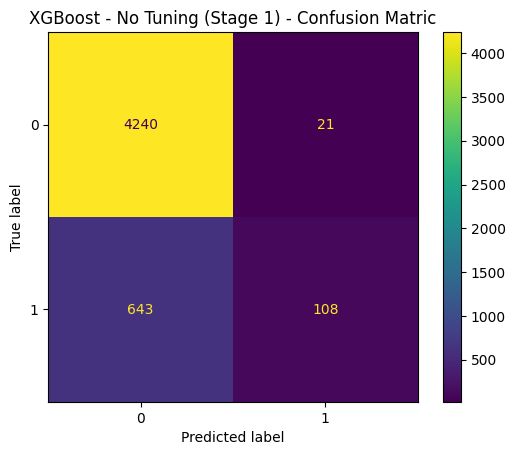

In [45]:
## Baseline Model (Weighted)
xgb_weighted = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_weighted.fit(X1_train, y1_train)
y1_pred_weighted = xgb_weighted.predict(X1_test)

def evaluate_model(name, y1_true, y1_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y1_true, y1_pred))
    print ("Precision:", precision_score (y1_true, y1_pred))
    print("Recall:", recall_score(y1_true, y1_pred))
    print("ROC AUC:", roc_auc_score(y1_true, y1_pred))
    ConfusionMatrixDisplay.from_predictions(y1_true, y1_pred)
    plt.title(f"{name} - Confusion Matric")
    plt.show()

evaluate_model("XGBoost - No Tuning (Stage 1)", y1_test, y1_pred_weighted)

The confusion matrix for XGBoost without tuning suggest that model performs well in predicting majority class (Compliters, 0), correctly classifying 4240 with only 21 false positives.

However, model is struggling to identify dropouts (class 1), correctly predicting only 108 out of 751, while misclassifying 643 as completions.

This is intuitibe, since there is a strong class imbalance in the data, with the model biased towards the majority class.

Given that identifying dropouts is critical for early intervention, this highlights the need for class weighting along with hyperparameter tuning, to improve performance on the minority class.

### XGBoost Model - With Tunning

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:53:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters after Tuning (Weighted, Stage 1):
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'scale_pos_weight': 0.17619103496831728}

Classification Report at Threshold = 0.2
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4261
           1       0.72      0.46      0.56       751

    accuracy                           0.89      5012
   macro avg       0.82      0.72      0.75      5012
weighted avg       0.88      0.89      0.88      5012



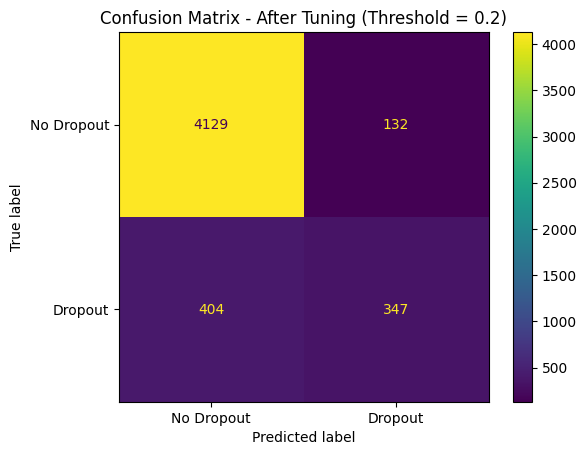

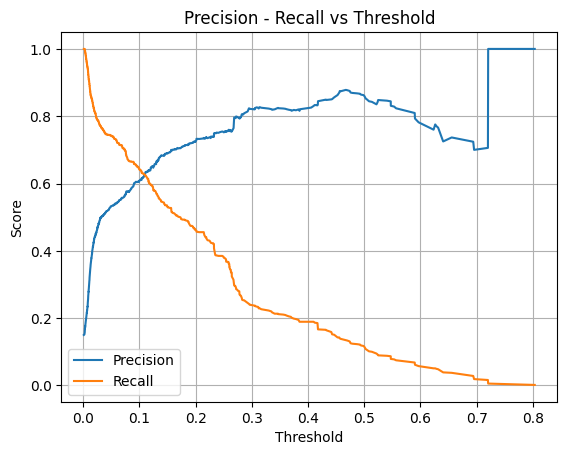

In [46]:
#Model tuning
param_grid_s1 = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 150],
    'scale_pos_weight': [scale_pos_weight]
}

xgb_grid_s1 = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
grid_search_s1 = GridSearchCV(xgb_grid_s1, param_grid_s1, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_s1.fit(X1_train, y1_train)

print("Best Parameters after Tuning (Weighted, Stage 1):")
print(grid_search_s1.best_params_)

# Evaluate best estimator
xgb_best_s1 = grid_search_s1.best_estimator_

# Predict probabilities for dropout (class 1)
y1_proba = xgb_best_s1.predict_proba(X1_test)[:, 1]

# Apply custom threshold
threshold = 0.2
y1_pred_custom = (y1_proba >= threshold).astype(int)

# Evaluation
print(f"\nClassification Report at Threshold = {threshold}")
print(classification_report(y1_test, y1_pred_custom))

# Confusion matrix
cm = confusion_matrix(y1_test, y1_pred_custom)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Dropout", "Dropout"]).plot()
plt.title(f"Confusion Matrix - After Tuning (Threshold = {threshold})")
plt.show()

# Visualize precision-recall vs threshold
precision, recall, thresholds = precision_recall_curve(y1_test, y1_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()



After tuning, the model correctly identifies 46.2% of dropouts.

XGBoost was tuned using GridSearchCV with ROC AUC as the scoring metric. To address class imbalance, scale_pos_weight was applied to give more importance to dropout cases. The model outputs probabilities, allowing threshold adjustment. A lower threshold of 0.2 was selected to improve recall and better detect true dropouts.

The precision–recall curve showed that as the threshold decreases, recall improves but precision declines. The chosen threshold of 0.2 strikes a practical balance—significantly improving the model’s ability to flag at-risk students, which is especially valuable for early intervention in educational settings.




### Tuned vs Without Tuned XGBoost Model Comparison

                           Model  Threshold  Accuracy  Precision (Dropout)  \
0  XGBoots - Without Tuning (S1)        0.5  0.867518             0.837209   
1           XGBoost - Tuned (S1)        0.2  0.893057             0.724426   

   Recall (Dropout)  F1 (Dropout)   ROC AUC  
0          0.143808      0.245455  0.569440  
1          0.462051      0.564228  0.884788  


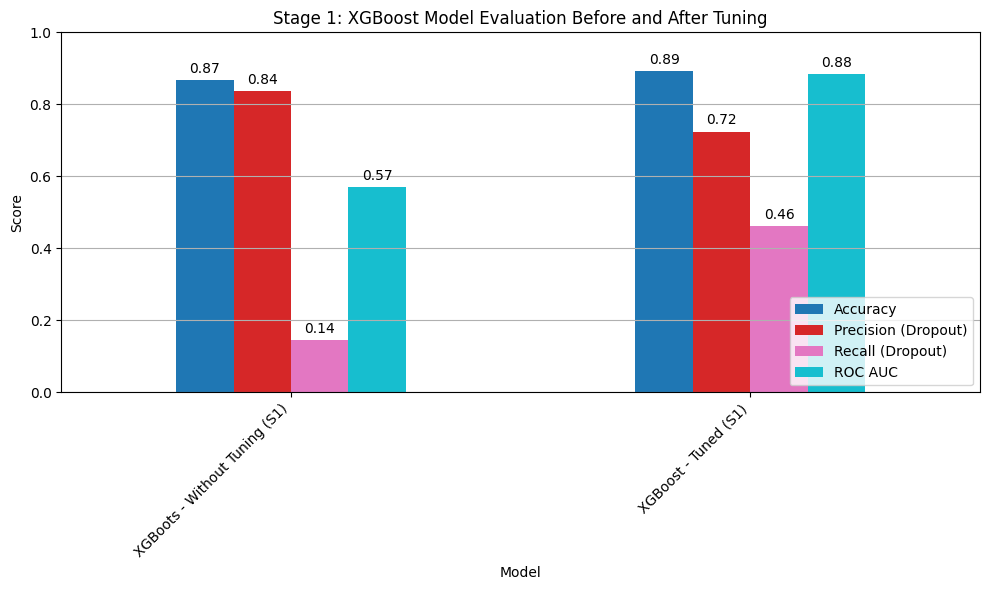

In [47]:
#Compare models before and after tuning (stage 1)
# Define the comparison function
def compare_s1(model_name, model, X_test, y_test, threshold=None):
    if threshold is not None:
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred)

    return {
        "Model": model_name,
        "Threshold": threshold if threshold is not None else 0.5,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Dropout)": precision_score(y_test, y_pred, pos_label=1),
        "Recall (Dropout)": recall_score(y_test, y_pred, pos_label=1),
        "F1 (Dropout)": f1_score(y_test, y_pred, pos_label=1),
        "ROC AUC": roc_auc
    }

# Evaluate models (only Stage 1 tuning vs untuned)
results = [
    compare_s1("XGBoots - Without Tuning (S1)", xgb_weighted, X1_test, y1_test),
    compare_s1("XGBoost - Tuned (S1)", xgb_best_s1, X1_test, y1_test, threshold=0.2)
]

# Create DataFrame
comparison_s1 = pd.DataFrame(results)
print(comparison_s1)

# Plotting setup
plot_s1 = ["Accuracy", "Precision (Dropout)", "Recall (Dropout)", "ROC AUC"]

# Create bar plot
axs1 = comparison_s1.set_index("Model")[plot_s1].plot(kind='bar', figsize=(10, 6), colormap='tab10')

# Titles and labels
plt.title("Stage 1: XGBoost Model Evaluation Before and After Tuning")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(True, axis='y')
plt.tight_layout()

# Add value labels
for container in axs1.containers:
    axs1.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


Although tunded model doesn't have strong predictive power, tuning adjustment improved the model's ability to predict dropouts (recall increase from 14% to 46%) and AUC increased from 0.57 to 0.88, meaning, tuned model has better discriminatory power.


### Feature Importance



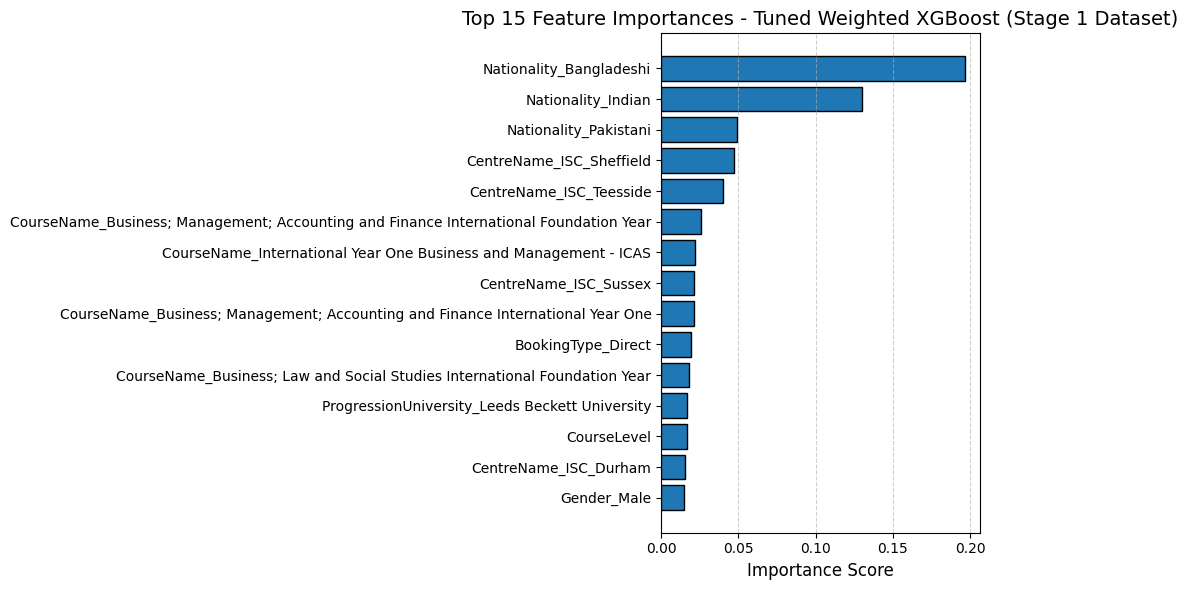

In [48]:
# Create DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': xgb_best_s1.feature_importances_
})

# Sort and select top 15
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], edgecolor='black')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Tuned Weighted XGBoost (Stage 1 Dataset)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


The Feature Importance plot suggests that students identified as Bangladeshi, Indian, or Pakistani has the highest contribution to the model's prediction (however, this required additional checks to make sure there is no structural bias in the data). Centre-related featires (ISC_Sheffield, ISC_Teesside) and specific course names also played role, suggesting that institutional or program-level differences may impact dropout risk. Other important predictors include booking type (Direct), progression university, and gender (Male), though their individual importance scores are relatively lower. However, given the high proportion of male students observed during the exploratory data analysis, this class imbalance may have influenced the model's attribution of importance to the gender feature.














### SHAP

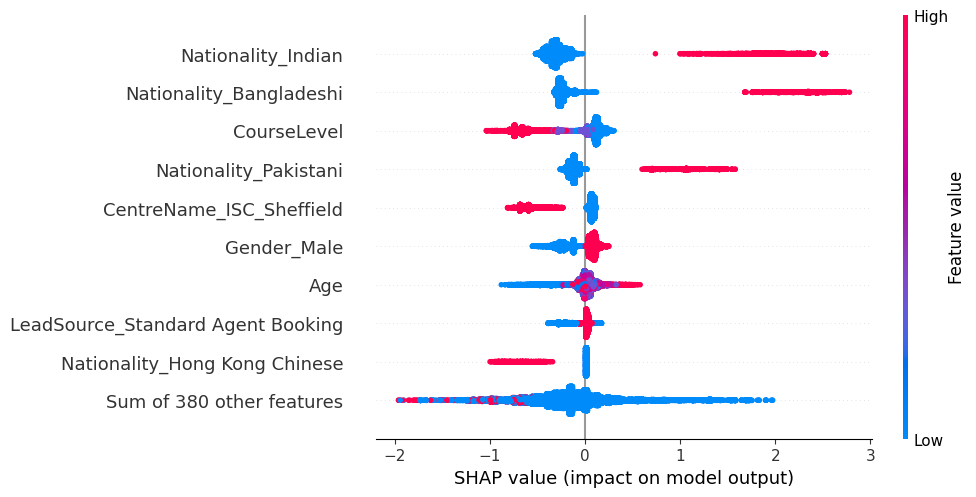

In [49]:
explainer_s2 = shap.Explainer(xgb_best_s1)
shap_s1 = explainer_s2(X1_train)

# Beeswarm plot
shap.plots.beeswarm(shap_s1)


This SHAP summary plot shows the top features impacting the model's predictions of student dropout. Features like Nationality_Indian, Bangladeshi, and CourseLevel have strong positive SHAP values, indicating that high values (red) for these features increase the likelihood of predicting dropout. Conversely, low Age (blue) and being Male appear associated with a higher dropout risk. Interestingly, CentreName_ISC_Sheffield and LeadSource_Standard Agent Booking also influence predictions, suggesting institutional and recruitment channel effects. Overall, nationality, course level, and demographics play significant roles in model decisions.

## 4. Predict Dropouts with Neural Network Model

###  Neural Network Model Without Optimisation

In [50]:
print(X1_train_scaled.shape, y1_train.shape)

(20047, 389) (20047,)


 Started with a simple neural network, using one hidden layer (32 units, ReLU) and a sigmoid output for binary classification, the model was trained with Adam (lr=0.001) for 20 epochs.


In [51]:
#Compute class weights
cw_1 = compute_class_weight(class_weight='balanced', classes=np.unique(y1_train), y=y1_train)
cw_dict_1 = dict(enumerate(cw_1))

In [52]:
# Define models

# Model without regularization
def model_no_reg_s1(input_dim, hidden_units, learning_rate):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model


# Model with L2 regularization
def model_l2_s1(input_dim, hidden_units, learning_rate, l2_lambda):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model

In [53]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Evaluate model
def evaluate_model(model, X, y, threshold=0.5, label="Model"):
    y_prob = model.predict(X).ravel()
    y_pred = (y_prob >= threshold).astype(int)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall   :", recall_score(y, y_pred))
    print("F1 Score :", f1_score(y, y_pred))
    print("AUC      :", roc_auc_score(y, y_prob))
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"{label} - Confusion Matrix")
    plt.show()
    return y_pred, y_prob


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


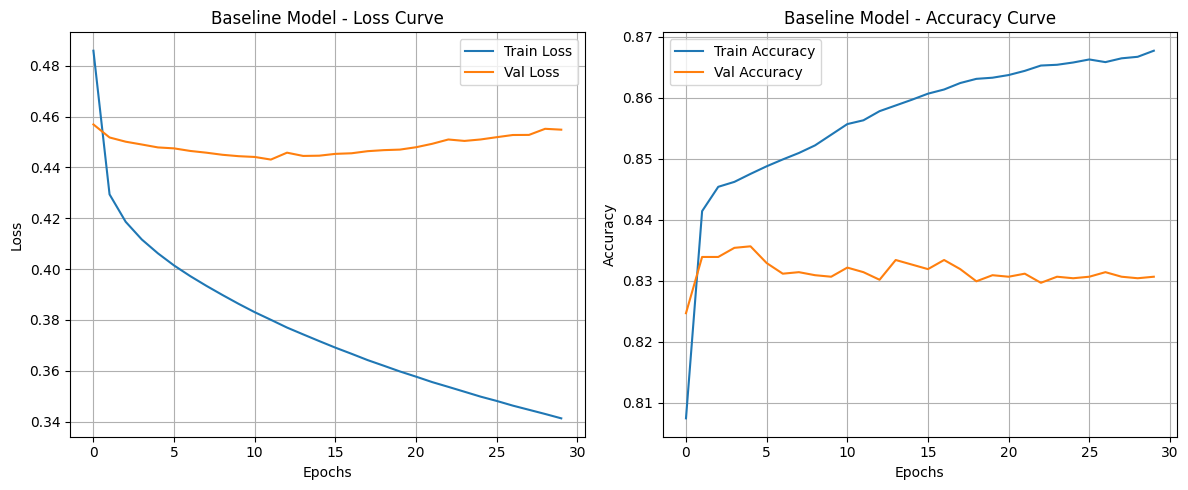

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== Baseline Model (Stage 1) ===
Accuracy : 0.8222266560255387
Precision: 0.44776119402985076
Recall   : 0.7989347536617842
F1 Score : 0.5738880918220947
AUC      : 0.8694326363253126


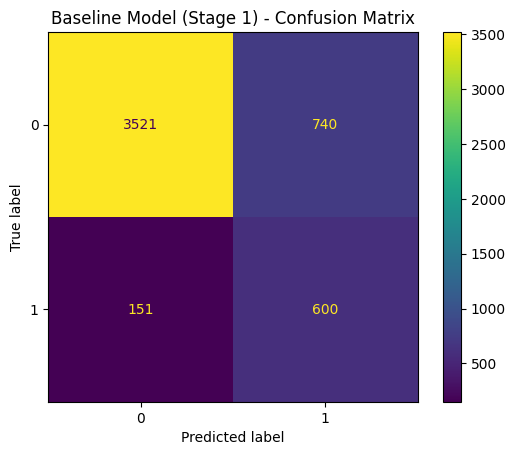

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0.00702011, 0.26423717, 0.03770856, ..., 0.19217607, 0.00800015,
        0.19023259], dtype=float32))

In [54]:
# Baseline model training
tf.random.set_seed(42)
baseline_model_s1 = model_no_reg_s1(X1_train_scaled.shape[1], hidden_units=(32,), learning_rate=0.001)
baseline_history = baseline_model_s1.fit(
    X1_train_scaled, y1_train,
    epochs=30,
    batch_size=32,
    class_weight=cw_dict_1,
    validation_split=0.2,
    verbose=0
)

plot_history(baseline_history, "Baseline Model")
evaluate_model(baseline_model_s1, X1_test_scaled, y1_test, label="Baseline Model (Stage 1)")

The confusion matrix of the baseline neural network model shows a decent ability to detect dropouts (TP = 600, FN = 151), but it misclassifies a significant number of non-dropouts as dropouts (FP = 740). The training curves reveal signs of overfitting: while training loss consistently decreases and accuracy improves, validation loss stagnates and begins rising slightly, and validation accuracy plateaus early. This suggests the model learns the training data well but struggles to generalize, highlighting the need for regularization, early stopping, or model tuning to improve generalization on unseen data.




### Neural Network Model with Optimisation


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


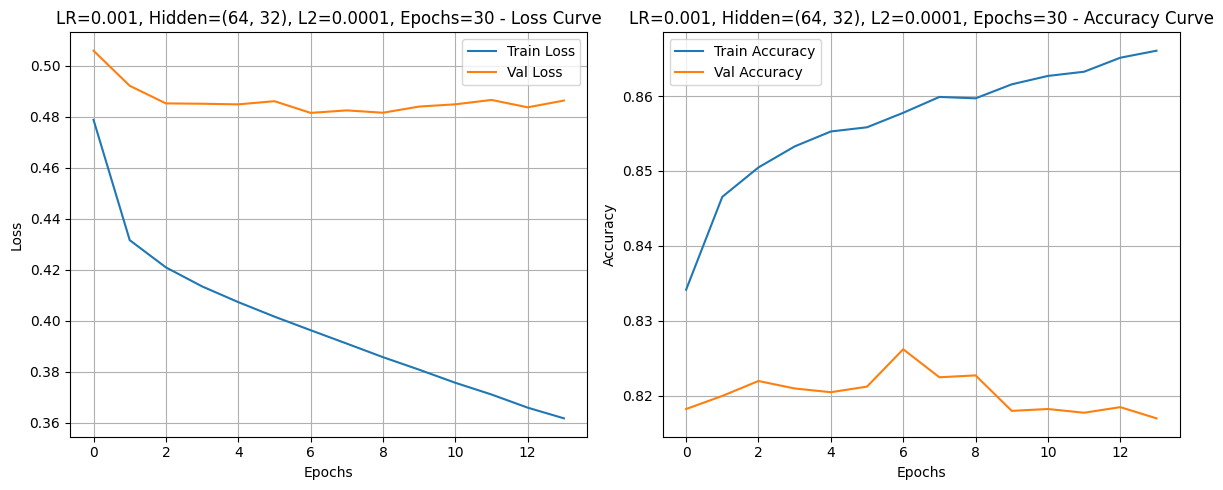

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.8122505985634477
Precision: 0.4325284090909091
Recall   : 0.810918774966711
F1 Score : 0.5641500694766095
AUC      : 0.8779363570937725


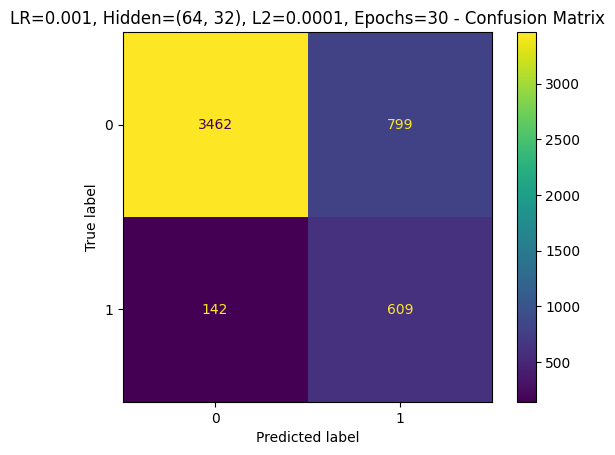


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


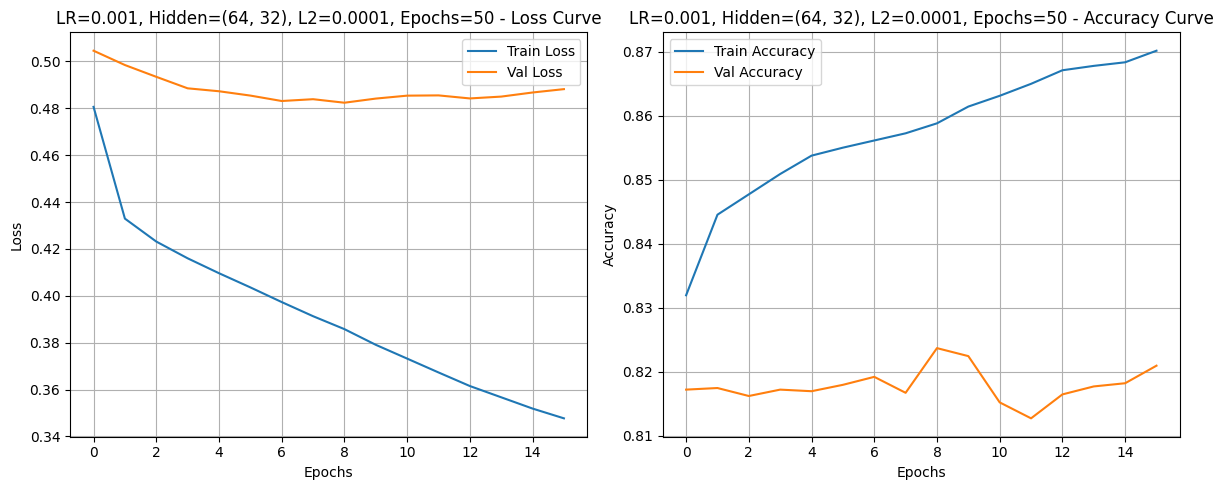

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.8138467677573823
Precision: 0.43509272467902993
Recall   : 0.8122503328894807
F1 Score : 0.566651184393869
AUC      : 0.8769921415895133


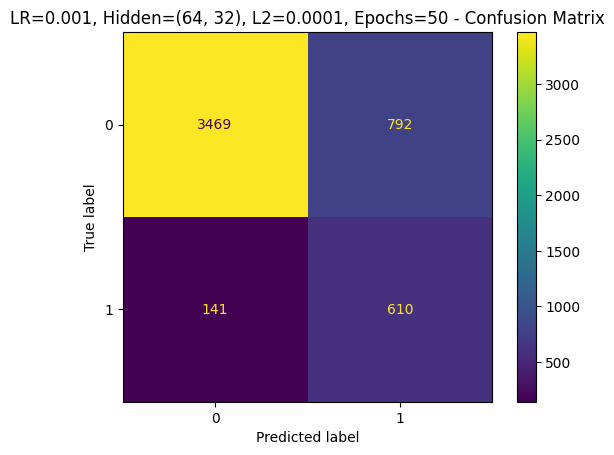


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


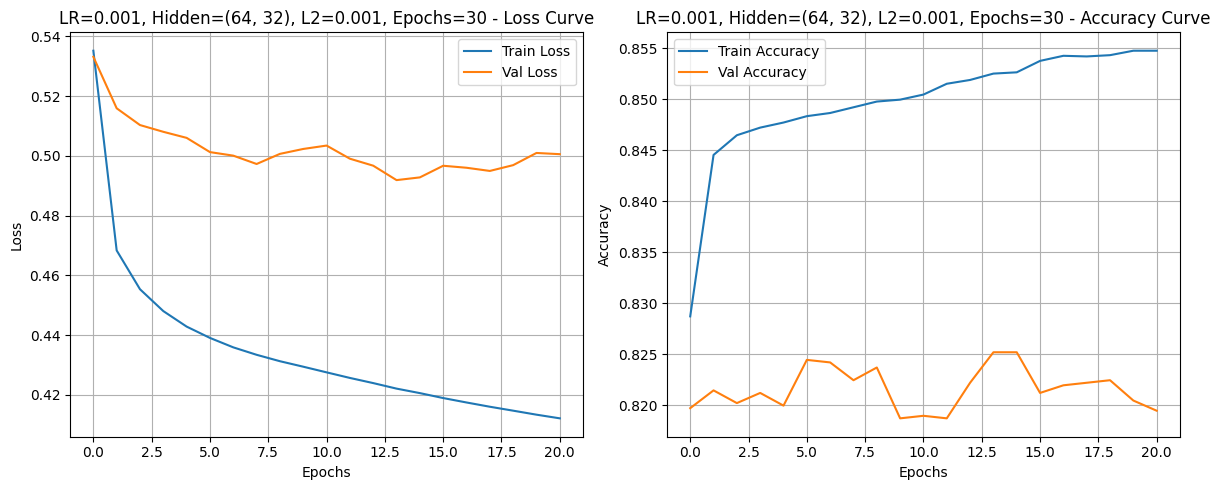

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.8138467677573823
Precision: 0.4357344632768362
Recall   : 0.8215712383488681
F1 Score : 0.5694508537148131
AUC      : 0.8810608776032333


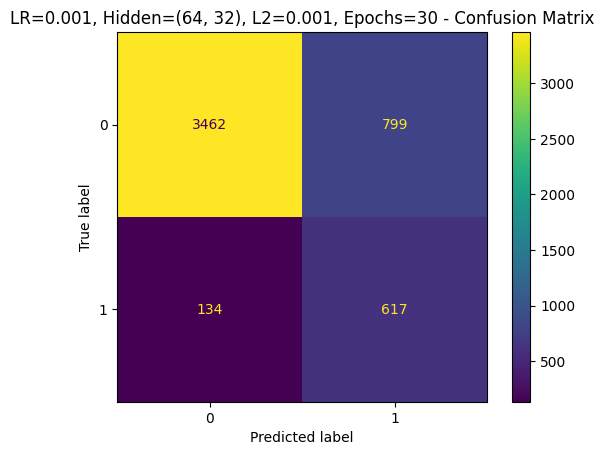


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


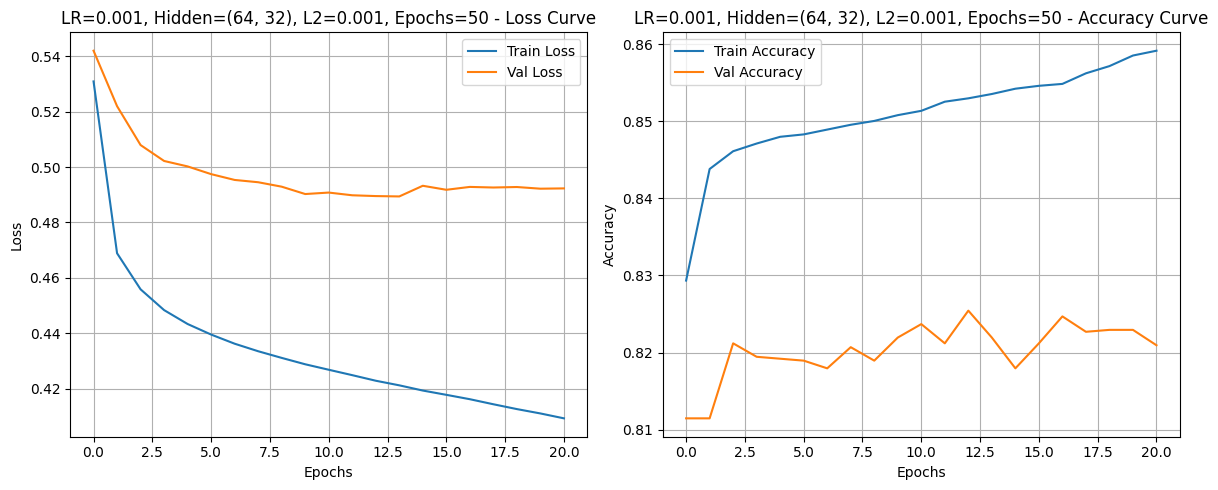

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.8110534716679968
Precision: 0.4314685314685315
Recall   : 0.8215712383488681
F1 Score : 0.5657955066483265
AUC      : 0.8811371273411248


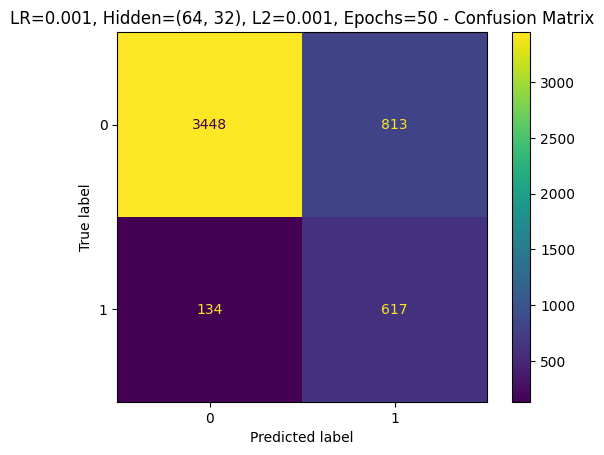


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


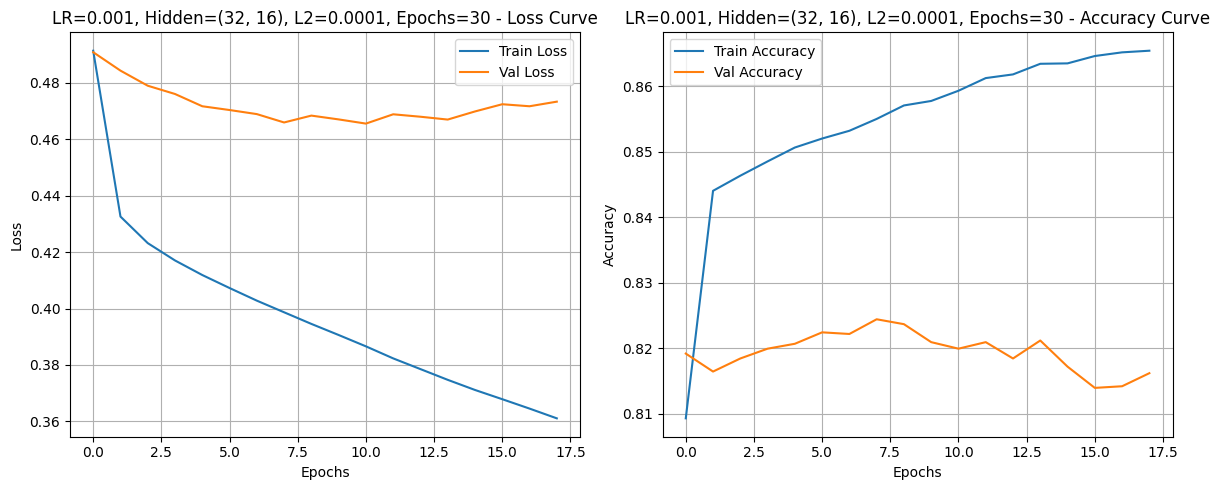

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.8118515562649641
Precision: 0.4318181818181818
Recall   : 0.8095872170439414
F1 Score : 0.5632237146827235
AUC      : 0.8768251109136811


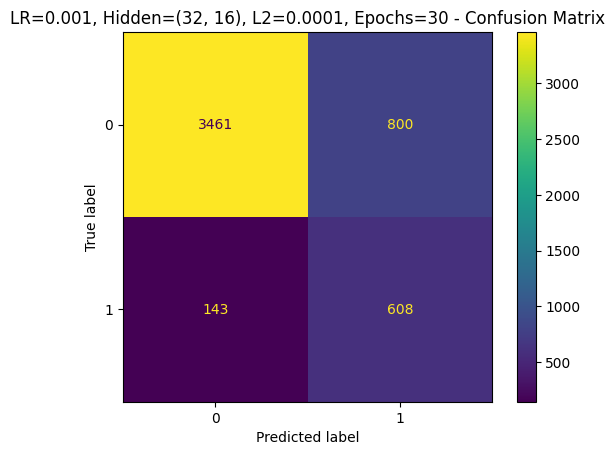


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


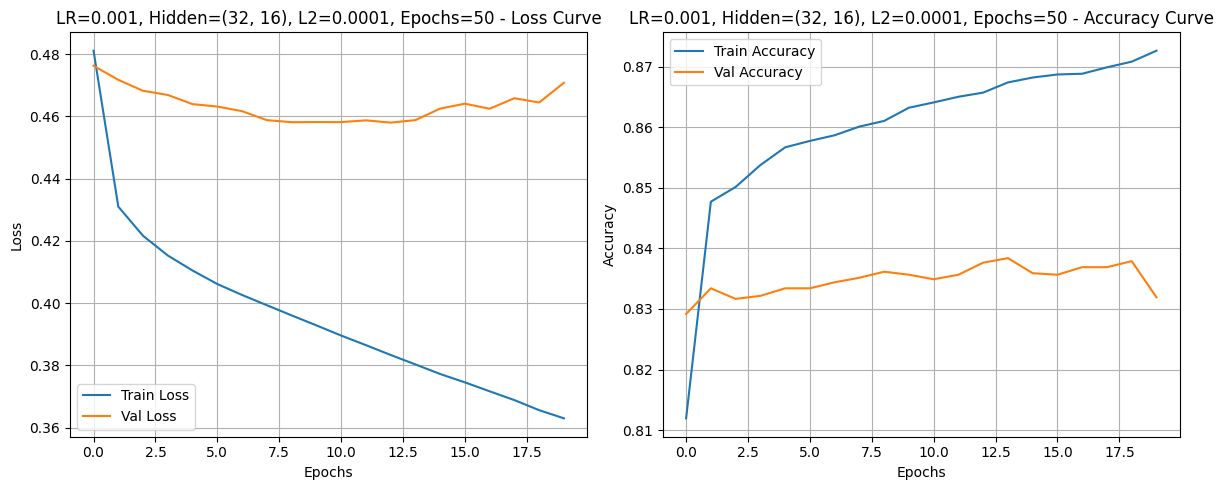

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.8272146847565842
Precision: 0.45660377358490567
Recall   : 0.8055925432756325
F1 Score : 0.5828516377649325
AUC      : 0.8775876082925964


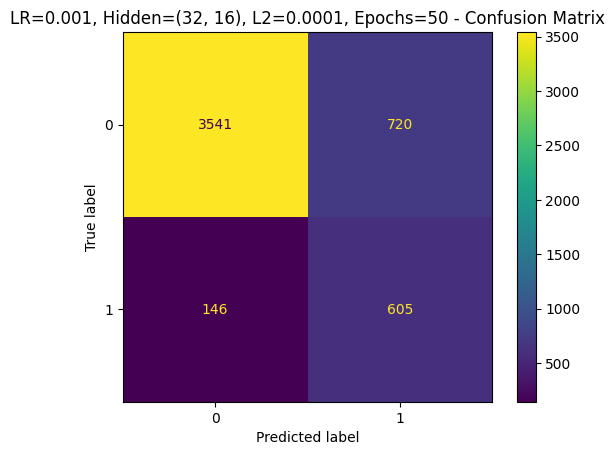


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


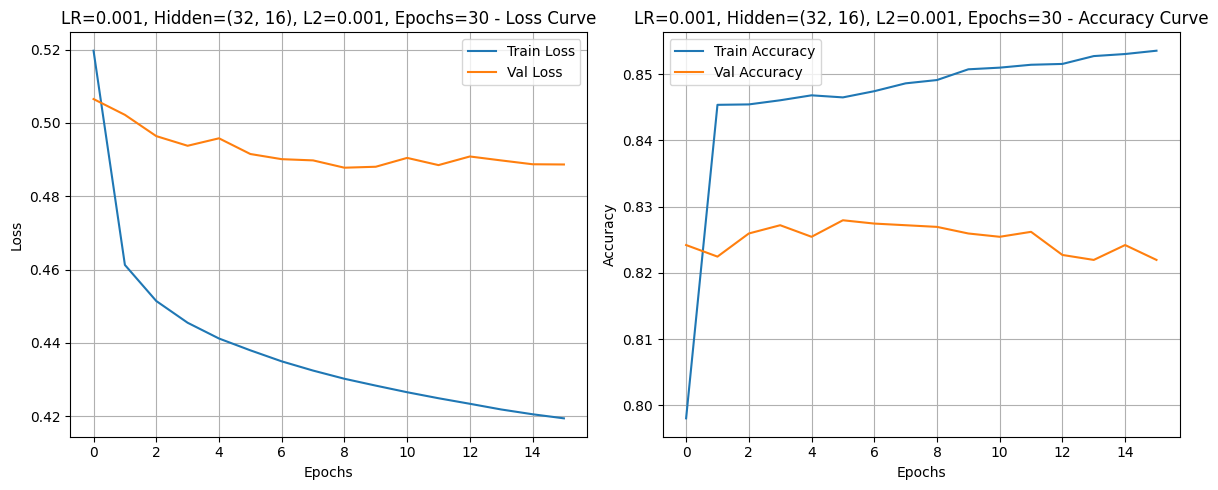

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.8170391061452514
Precision: 0.4408831908831909
Recall   : 0.8242343541944075
F1 Score : 0.5744779582366589
AUC      : 0.8825850911137493


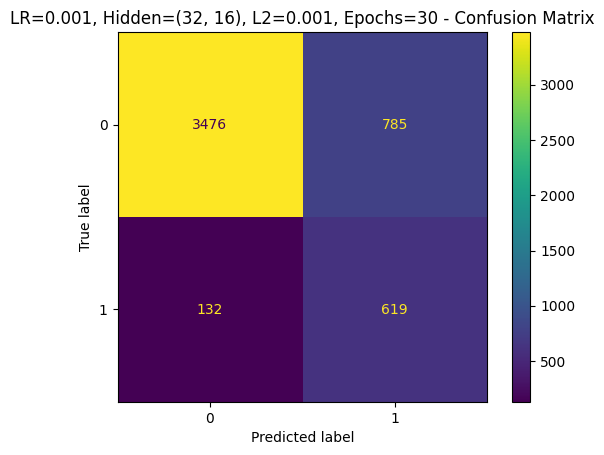


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


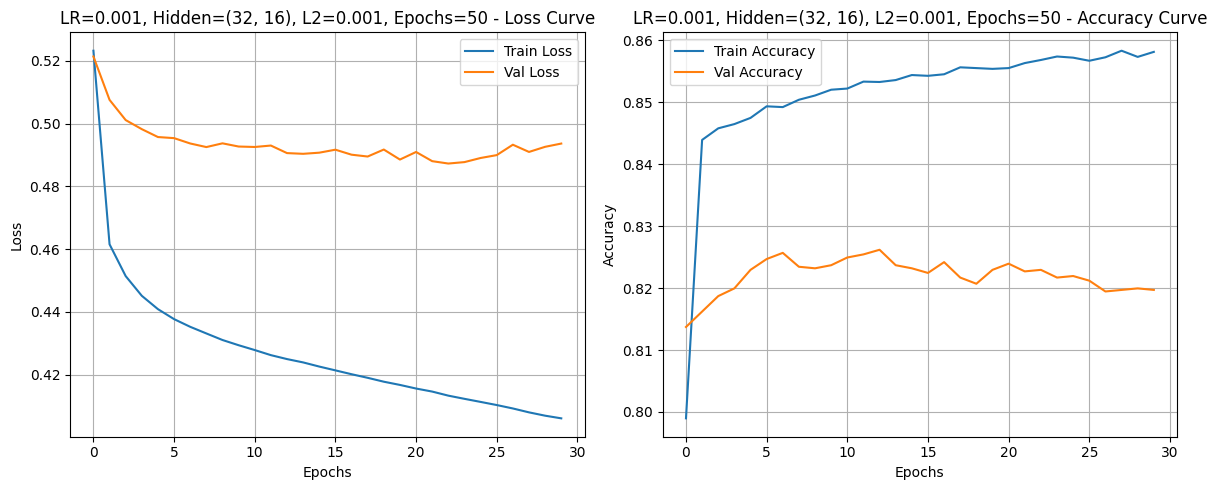

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.8162410215482842
Precision: 0.43937232524964337
Recall   : 0.8202396804260985
F1 Score : 0.5722248026010218
AUC      : 0.8809149406048916


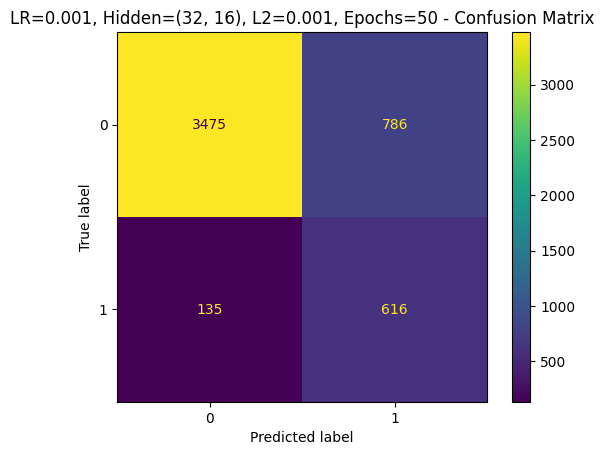


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


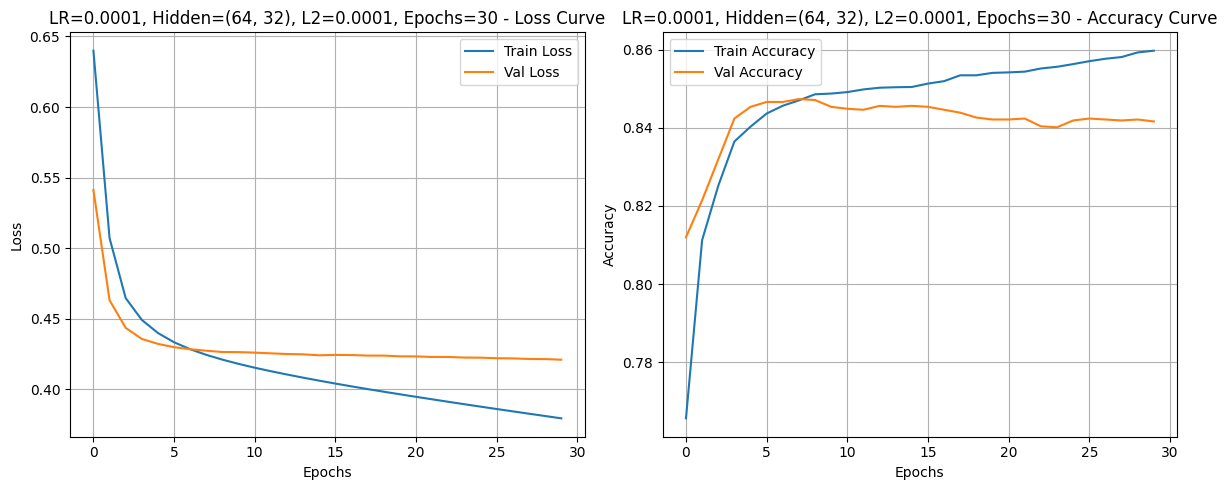

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.8328012769353551
Precision: 0.466147859922179
Recall   : 0.7976031957390146
F1 Score : 0.5884086444007859
AUC      : 0.8794808830344645


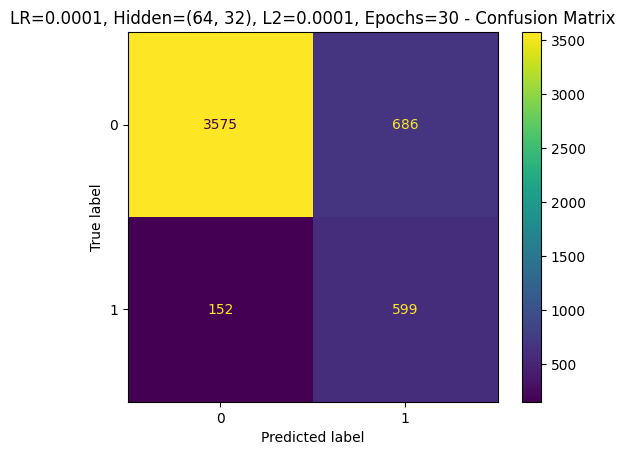


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


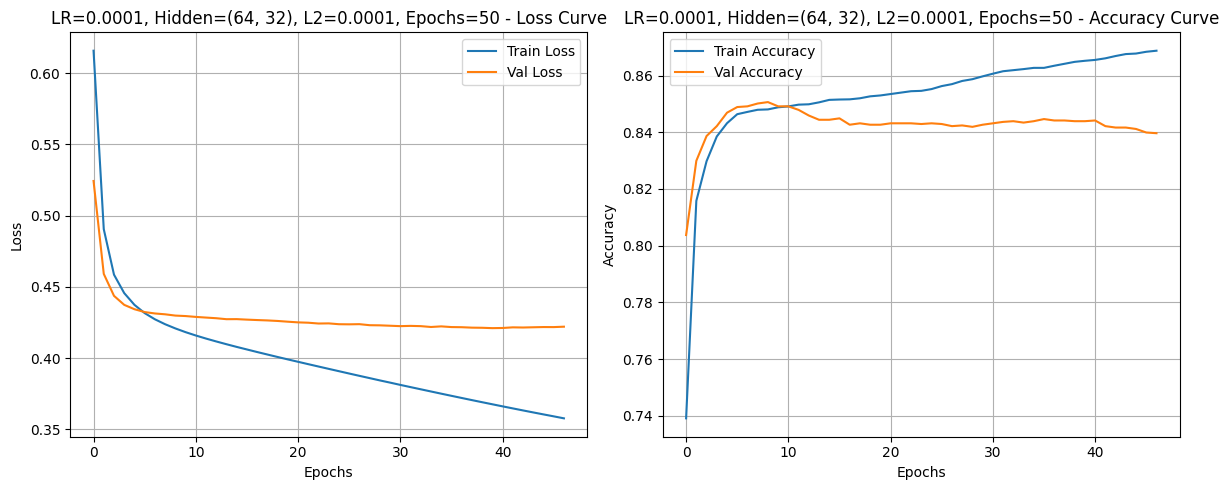

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.8330007980845969
Precision: 0.46640625
Recall   : 0.7949400798934754
F1 Score : 0.5878877400295421
AUC      : 0.8796386949919859


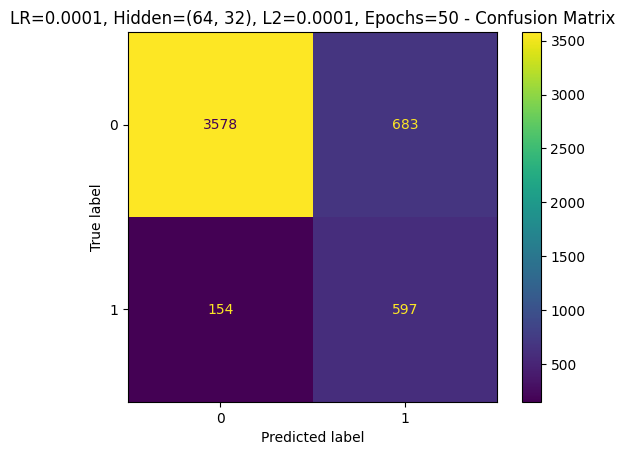


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


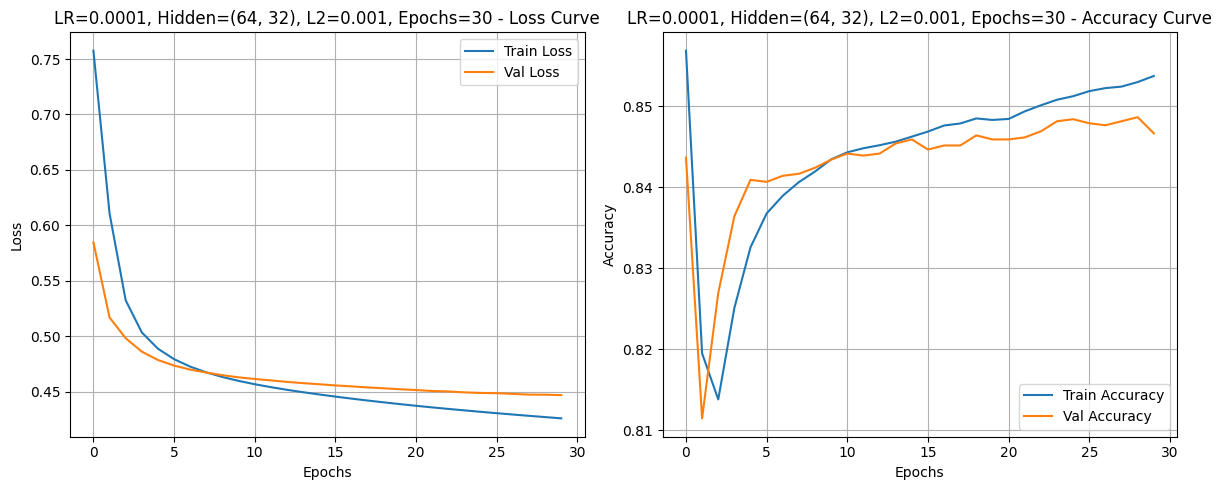

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.8322027134876296
Precision: 0.46533127889060094
Recall   : 0.8042609853528628
F1 Score : 0.5895558809175208
AUC      : 0.8831049330767926


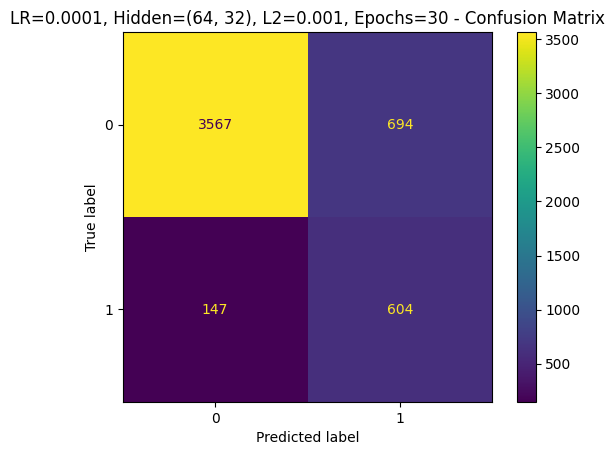


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


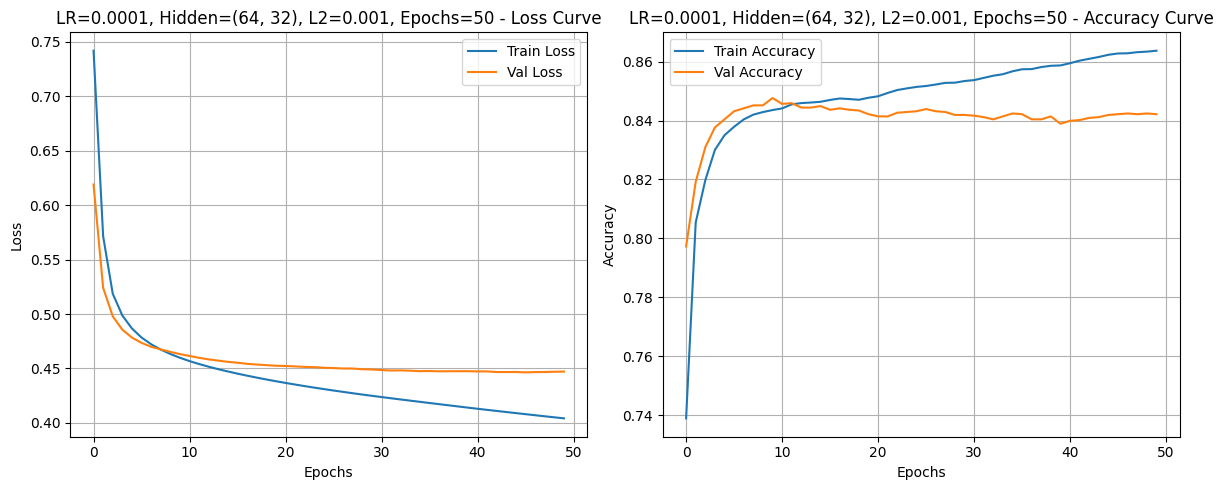

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.8304070231444534
Precision: 0.4616576297443842
Recall   : 0.7936085219707057
F1 Score : 0.5837414299706171
AUC      : 0.8811594710143185


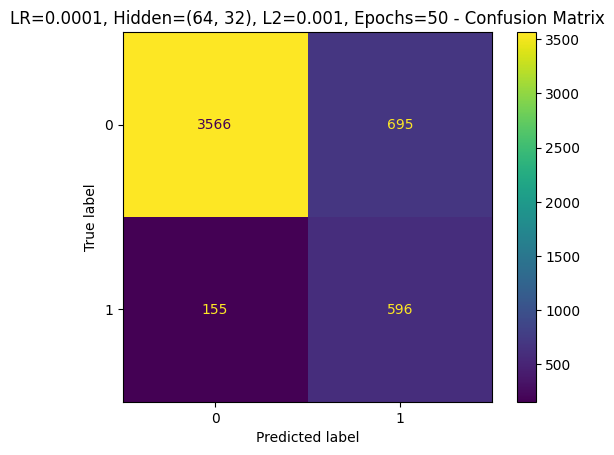


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


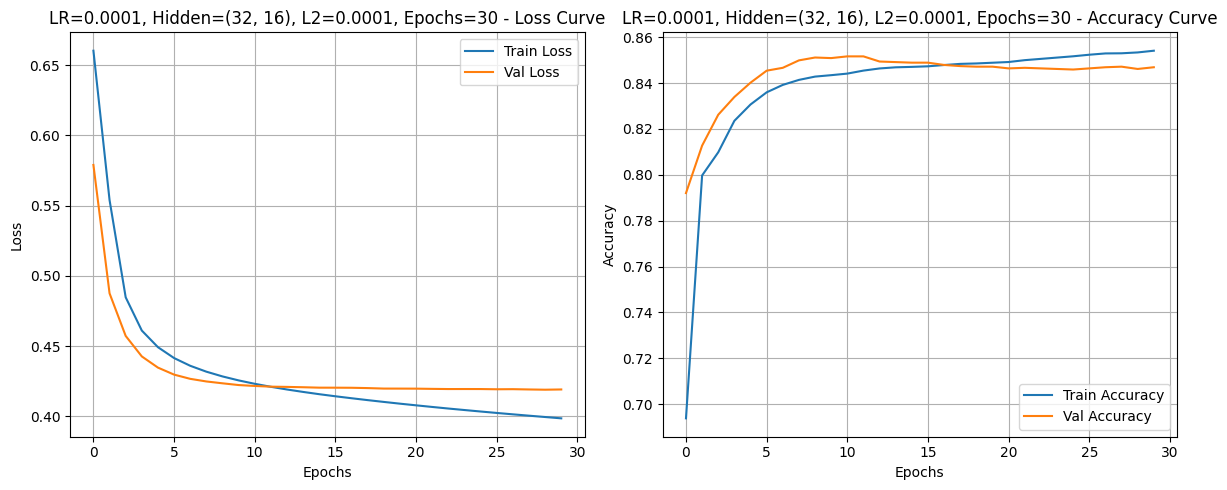

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.8363926576217079
Precision: 0.4725972994440032
Recall   : 0.7922769640479361
F1 Score : 0.5920398009950248
AUC      : 0.8805069732572794


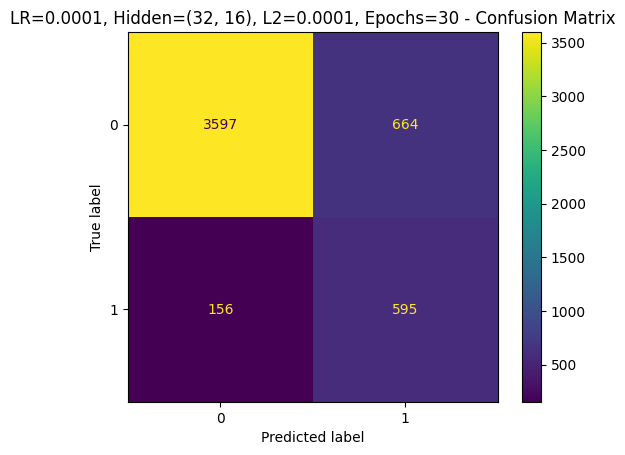


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


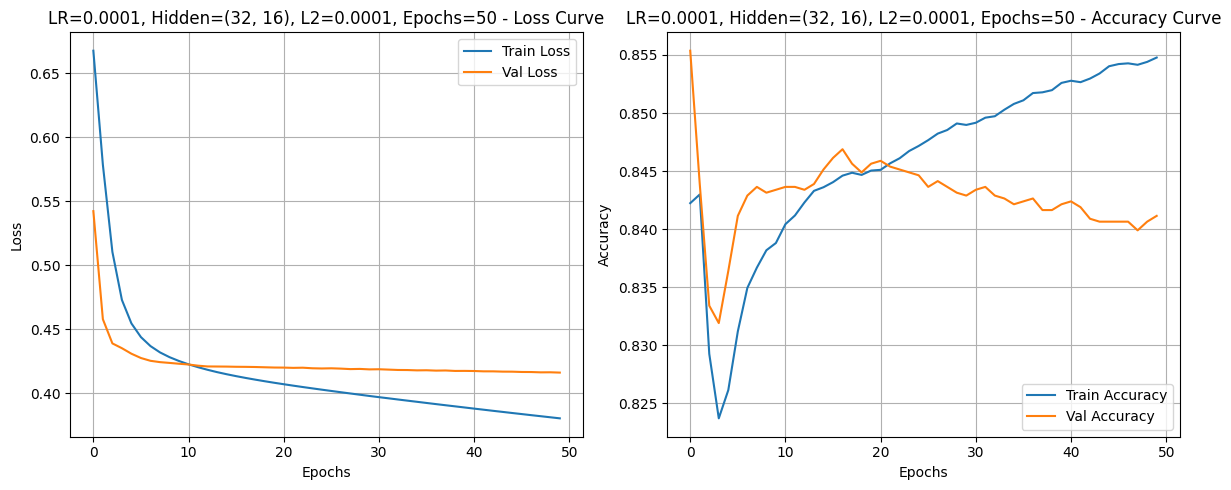

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.8326017557861133
Precision: 0.46540880503144655
Recall   : 0.7882822902796272
F1 Score : 0.5852694018783984
AUC      : 0.8772580781753563


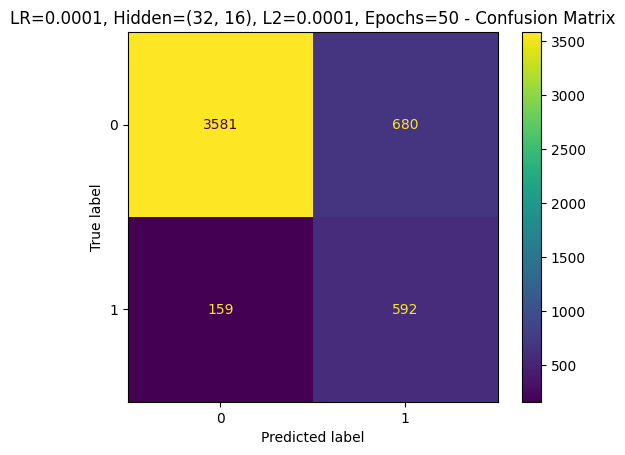


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


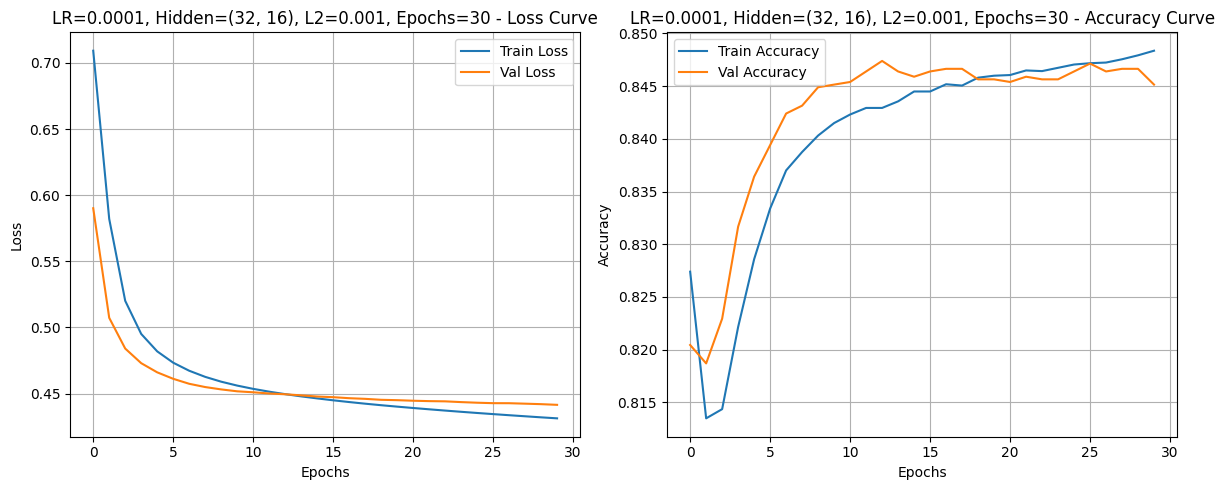

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.8314046288906624
Precision: 0.4635658914728682
Recall   : 0.796271637816245
F1 Score : 0.5859872611464968
AUC      : 0.8817083753774596


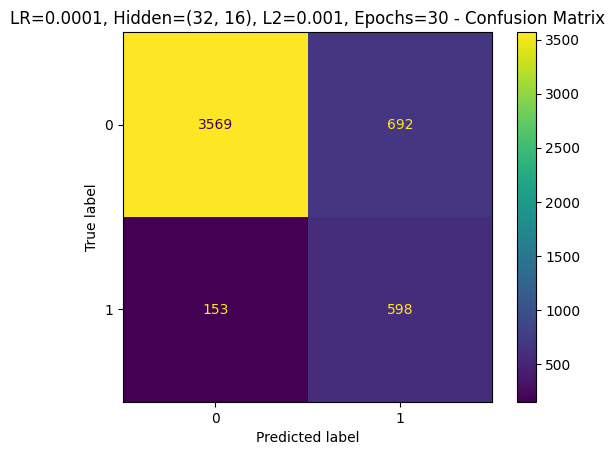


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


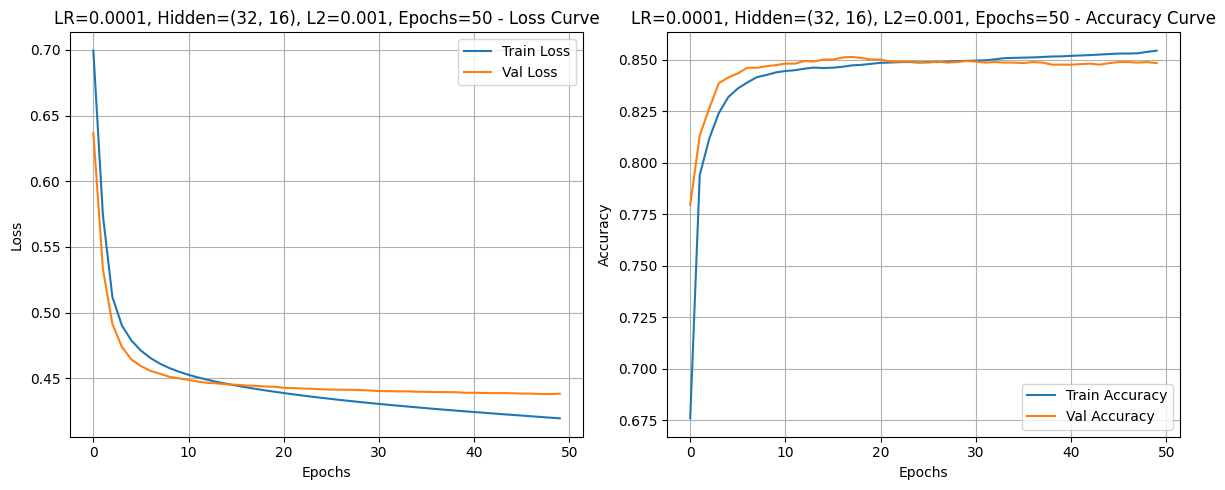

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.8357940941739824
Precision: 0.471563981042654
Recall   : 0.7949400798934754
F1 Score : 0.5919682697074864
AUC      : 0.8836766498615162


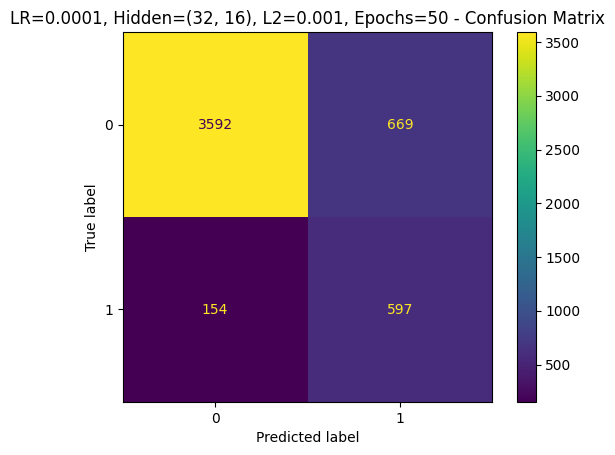

In [55]:

# Manual Grid Search with Early Stopping
results_s1 = []
learning_rates = [0.001, 0.0001]
hidden_layer_options = [(64, 32), (32, 16)]
l2_lambdas = [1e-4, 1e-3]
epoch_options = [30, 50]
batch_size = 32

# EarlyStopping configuration
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=0
)

for lr in learning_rates:
    for hidden_units in hidden_layer_options:
        for l2_lambda in l2_lambdas:
            for epochs in epoch_options:
                label = f"LR={lr}, Hidden={hidden_units}, L2={l2_lambda}, Epochs={epochs}"
                print(f"\nTraining: {label}")

                model = model_l2_s1(X1_train_scaled.shape[1], hidden_units, lr, l2_lambda)

                history = model.fit(
                    X1_train_scaled, y1_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    class_weight=cw_dict_1,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0
                )

                plot_history(history, label)

                y_pred, y_prob = evaluate_model(model, X1_test_scaled, y1_test, threshold=0.5, label=label)

                results_s1.append({
                    "Label": label,
                    "Accuracy": accuracy_score(y1_test, y_pred),
                    "Precision": precision_score(y1_test, y_pred),
                    "Recall": recall_score(y1_test, y_pred),
                    "F1 Score": f1_score(y1_test, y_pred),
                    "AUC": roc_auc_score(y1_test, y_prob)
                })

LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30 (this is so far the best hypermarapeter combination). Slow learning rate and L2 labda, that allows model to learn.

The training and validation curves indicate good overall performance and generalization. The loss curves (left) show a steady decline for both training and validation losses, with the validation loss plateauing around epoch 10–15, suggesting convergence without significant overfitting. The accuracy curves (right) demonstrate a rapid increase in performance early in training, with both training and validation accuracies stabilizing around 85%. The small gap between the two suggests a well-regularized model with minimal overfitting, helped by the use of L2 regularization (0.0001) and a conservative learning rate (0.0001)

### Baseline vs Optimised Model Comparison

In [56]:
# Results Comparison
results_df_s1 = pd.DataFrame(results_s1)
results_df_s1 = results_df_s1.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\nTop Models by F1 Score:")
print(results_df_s1.head(3))


Top Models by F1 Score:
                                              Label  Accuracy  Precision  \
0  LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30  0.836393   0.472597   
1   LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50  0.835794   0.471564   
2   LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30  0.832203   0.465331   

     Recall  F1 Score       AUC  
0  0.792277  0.592040  0.880507  
1  0.794940  0.591968  0.883677  
2  0.804261  0.589556  0.883105  


In [57]:
# Baseline vs Best Tuned Model Comparison (Stage 1)

y_baseline_prob = baseline_model_s1.predict(X1_test_scaled)
y_baseline_pred = (y_baseline_prob >= 0.5).astype(int)
best_model_metrics_s1 = results_df_s1.iloc[0]

print("\nComparison of Baseline vs Best Tuned Model (Stage 1):")
print(f"{'Metric':<12} | {'Baseline':<10} | {'Tuned':<10}")
print("-" * 40)
print(f"{'Accuracy':<12} | {accuracy_score(y1_test, y_baseline_pred):<10.4f} | {best_model_metrics_s1['Accuracy']:<10.4f}")
print(f"{'Precision':<12} | {precision_score(y1_test, y_baseline_pred):<10.4f} | {best_model_metrics_s1['Precision']:<10.4f}")
print(f"{'Recall':<12} | {recall_score(y1_test, y_baseline_pred):<10.4f} | {best_model_metrics_s1['Recall']:<10.4f}")
print(f"{'F1 Score':<12} | {f1_score(y1_test, y_baseline_pred):<10.4f} | {best_model_metrics_s1['F1 Score']:<10.4f}")
print(f"{'AUC':<12} | {roc_auc_score(y1_test, y_baseline_prob):<10.4f} | {best_model_metrics_s1['AUC']:<10.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Comparison of Baseline vs Best Tuned Model (Stage 1):
Metric       | Baseline   | Tuned     
----------------------------------------
Accuracy     | 0.8222     | 0.8364    
Precision    | 0.4478     | 0.4726    
Recall       | 0.7989     | 0.7923    
F1 Score     | 0.5739     | 0.5920    
AUC          | 0.8694     | 0.8805    


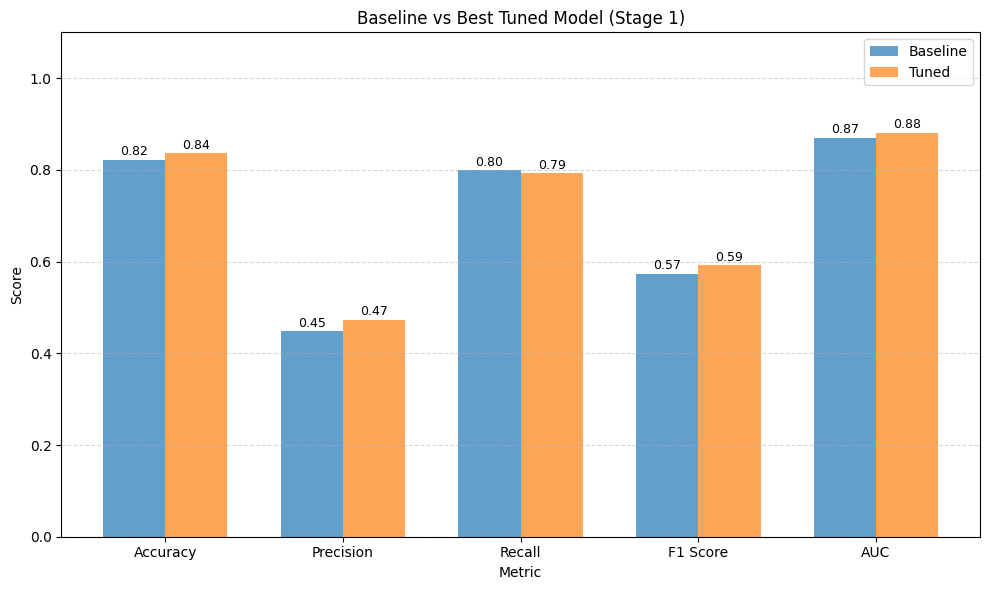

In [58]:
# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Values
baseline_values_s1 = [
    accuracy_score(y1_test, y_baseline_pred),
    precision_score(y1_test, y_baseline_pred),
    recall_score(y1_test, y_baseline_pred),
    f1_score(y1_test, y_baseline_pred),
    roc_auc_score(y1_test, y_baseline_prob)
]

tuned_values_s1 = [
    best_model_metrics_s1["Accuracy"],
    best_model_metrics_s1["Precision"],
    best_model_metrics_s1["Recall"],
    best_model_metrics_s1["F1 Score"],
    best_model_metrics_s1["AUC"]
]

# Plot setup
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, baseline_values_s1, width=width, label='Baseline', alpha=0.7)
bars2 = plt.bar([p + width for p in x], tuned_values_s1, width=width, label='Tuned', alpha=0.7)

# Add metric values on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

# Labels and ticks
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Baseline vs Best Tuned Model (Stage 1)")
plt.xticks([p + width / 2 for p in x], metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The comparison shows that the best tuned neural network model outperforms the baseline across all key metrics. Accuracy improves from 0.82 to 0.84, and AUC rises from 0.87 to 0.88, indicating better overall classification performance. Precision and recall also increase slightly, from 0.45 to 0.47 and from 0.79 to 0.7949 respectively, leading to a higher F1 score (0.5743 to 0.5931). These consistent improvements suggest that hyperparameter tuning enhanced the model’s ability to correctly identify positive cases while maintaining strong generalization.




# Stage 2 data

In [59]:
# File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



## Data Preprocessing and Feature Engineering

### EDA

In [60]:
#Install gdown for importing the data
!pip install -q gdown
import gdown

# Stage 2 Data File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"
s2_file= "Stage2_data.csv"
gdown.download(file_url, output_file, quiet=False)

# Load and Preview Data
engage_df_original = pd.read_csv(output_file)
engage_df = engage_df_original.copy()
print("Initial data shape:", engage_df.shape)
engage_df.head()

Downloading...
From: https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ
To: /content/Stage1_data.csv
100%|██████████| 6.20M/6.20M [00:00<00:00, 132MB/s]


Initial data shape: (25059, 18)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0  University of Aberdeen                     NaN                       NaN  
1  University of Aberdeen                    93.0                       5.0  
2  University of Aberdeen                    92.0                       6.0  
3  University of Aberdeen                    67.0                      15.0  
4  University of Aberdeen                     NaN                       NaN

In [61]:
#Basic info
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Progre

Stage 2 data is expanded Stage 1 data, namely, the data set contains the same numebr of observations - 25 059 rows, but includes additional features about the students engagement ('AuthorisedAbsenceCount', UnauthorisedAbsenceCount') - 18 columns in total.


In [62]:
#Check Missing Values
missing_values_2 = engage_df.isnull().sum().sort_values(ascending=False)
missing_percentage_2= (engage_df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into a single DataFrame
missing_data_2 = pd.DataFrame({
    'Missing Count': missing_values_2,
    'Missing %': missing_percentage_2
})
print(missing_data_2[missing_data_2['Missing Count'] > 0])

                          Missing Count  Missing %
DiscountType                      17464  69.691528
HomeState                         16134  64.384054
HomeCity                           3448  13.759528
ProgressionDegree                   875   3.491759
AuthorisedAbsenceCount              208   0.830041
UnauthorisedAbsenceCount            208   0.830041


In additional features, there are incremental number of missing values, these values will be handled during the feature engineering stage.

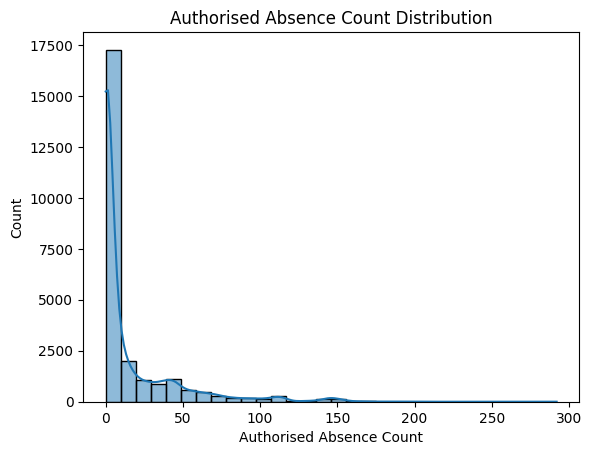

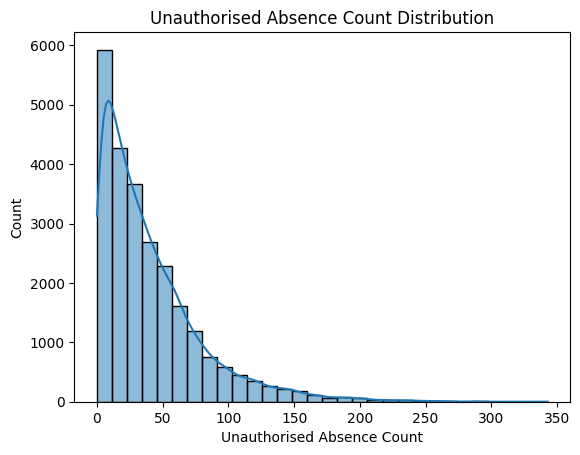

In [63]:
#Distribution of additional features
# Authorised
sns.histplot(engage_df['AuthorisedAbsenceCount'].dropna(), kde=True, bins=30)
plt.title('Authorised Absence Count Distribution')
plt.xlabel('Authorised Absence Count')
plt.show()

# Unauthorised
sns.histplot(engage_df['UnauthorisedAbsenceCount'].dropna(), kde=True, bins=30)
plt.title('Unauthorised Absence Count Distribution')
plt.xlabel('Unauthorised Absence Count')
plt.show()

### Data Cleaning

In [64]:
#Remove unnecessary columns(LearnerCode)
if 'LearnerCode' in engage_df.columns:
    engage_df.drop(['LearnerCode'], axis=1, inplace=True)

#Convert 'DateofBirth' to 'Age' and drop original column
engage_df['Age']=datetime.now().year - pd.to_datetime(engage_df['DateofBirth'], dayfirst=True, errors='coerce').dt.year
engage_df.drop(['DateofBirth'], axis=1, inplace=True)

In [65]:
#Drop columns with >50% missing values
missing_threshold=0.5
missing_cols_s2 =[col for col in engage_df.columns if engage_df[col].isnull().mean()>missing_threshold]
engage_df.drop(missing_cols_s2, axis=1, inplace=True)

In [66]:
#Drop high cardinality columns (>200 unique values)
high_cardinality = [
    col for col in engage_df.select_dtypes(include='object').columns
    if engage_df [col].nunique()>200
]

engage_df.drop(high_cardinality, axis=1, inplace=True)

### Feature Engineering

In [67]:
# Encode target variable ('CompletedCourse')
# Flip target encoding (1=Dropouts and 0=Compliters)
engage_df['CompletedCourse'] = engage_df['CompletedCourse'].map({'Yes': 0, 'No': 1})

# Ordinal encoding for CourseLevel
if 'CourseLevel' in engage_df.columns:
    ordinal_order = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]
    ordinal_encoder = OrdinalEncoder(categories=ordinal_order, handle_unknown='use_encoded_value', unknown_value=-1)
    engage_df[['CourseLevel']]=ordinal_encoder.fit_transform(engage_df[['CourseLevel']])

In [68]:
# One-hot encode remaining categorical features
categorical_s2=engage_df.select_dtypes(include='object').columns.tolist()
engage_df=pd.get_dummies(engage_df, columns=categorical_s2, drop_first=True)

In [69]:
print("Final shape of data (Applican't Engagement Data):", engage_df.shape)
print("Remaining columns:", engage_df.columns.tolist())
print("Mssing values:", engage_df.isnull().sum().sum())
print("Dataframe info:")
engage_df.info()
print("Dataframe head:")
engage_df.head()

Final shape of data (Applican't Engagement Data): (25059, 392)
Remaining columns: ['CourseLevel', 'IsFirstIntake', 'CompletedCourse', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham', 'CentreName_ISC_Holland', 'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston', 'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster', 'CentreName_ISC_Leeds', 'CentreName_ISC_Lincoln', 'CentreName_ISC_London', 'CentreName_ISC_Online', 'CentreName_ISC_RHUL', 'CentreName_ISC_Sheffield', 'CentreName_ISC_Strathclyde', 'CentreName_ISC_Surrey', 'CentreName_ISC_Sussex', 'CentreName_ISC_Teesside', 'BookingType_Direct', 'LeadSource_Digital (Web)', 'LeadSource_Re-enrolment', 'LeadSource_Referrals', 'LeadSource_Sponsor', 'LeadSource_Standard Agent Booking', 'LeadSource_Walk-in', 'Gender_Male', 'Nationality_Afghan', 'Nationality_Albanian', 'Nationality_Algerian', 'Nationality_American', 'Nationality_Angolan', 'Nationality_Antiguan'

CourseLevel  IsFirstIntake  CompletedCourse  AuthorisedAbsenceCount  \
0          3.0           True                0                     NaN   
1          0.0          False                0                    93.0   
2          2.0          False                0                    92.0   
3          2.0           True                0                    67.0   
4          3.0           True                0                     NaN   

   UnauthorisedAbsenceCount  Age  CentreName_ISC_Cardiff  \
0                       NaN   27                   False   
1                       5.0   27                   False   
2                       6.0   25                   False   
3                      15.0   26                   False   
4                       NaN   29                   False   

   CentreName_ISC_Dublin  CentreName_ISC_Durham  CentreName_ISC_Holland  ...  \
0                  False                  False                   False  ...   
1                  False                  False                   False  ...   
2                  False                  False                   False  ...   
3                  False                  False                   False  ...   
4                  False                  False                   False  ...   

   ProgressionUniversity_University College Dublin  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Aberdeen  \
0                                          True   
1                                          True   
2                                          True   
3                                          True   
4                                          True   

   ProgressionUniversity_University of Huddersfield  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversity_University of Leeds  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversity_University of Lincoln  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ProgressionUniversity_University of Sheffield International College  \
0                                              False                     
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     

   ProgressionUniversity_University of Strathclyde  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Surrey  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   ProgressionUniversity_University of Sussex  \
0                                       False   


Afer removing "LearnerCode", also columns with high cardibclaity (>200 unique values) and missing values (>50%) "HomeCity' and "DiscountType" dropped.

Performed ordinal encoding for ordinal data, "CourseLevel" is only ordinal data and perfrmed one-hot encoding for all other categorical data.

As a result, dataframe contains again 25 059 observations and 392 columns).

Althoug, observations with more than 50% missing values were droppee during dala cleaning process, it still contains total of 416 observations with missing values, in the following features "AuthorisedAbsenceCount", "UnauthorisedAbsenceCount".


In [70]:
# Count rows with any missing values
rows_missing_s2 = engage_df.isnull().any(axis=1).sum()

# Calculate percentage of total rows
missing_pct_s2 = (rows_missing_s2 / len(engage_df)) * 100

# Print summary
print(f"Rows with missing values: {rows_missing_s2} ({missing_pct_s2:.2f}%)")

# Handle missing values based on threshold
if rows_missing_s2 < 2:
    engage_df.dropna(inplace=True)
    print("Dropped rows with missing values (less than 2% of data).")
else:
    for col in engage_df.columns:
        if engage_df[col].isnull().sum() > 0:
            if engage_df[col].dtype in ['float64', 'int64', 'int32']:
                engage_df[col] = engage_df[col].fillna(engage_df[col].median())
            else:
                engage_df[col] = engage_df[col].fillna(engage_df[col].mode()[0])
    print("Imputed missing values.")


Rows with missing values: 208 (0.83%)
Imputed missing values.


To handle missing data, the proportion of incomplete rows was first assessed. If fewer than 2% of rows had missing values, they were dropped to ensure data integrity with minimal loss. If the missing rate was higher, imputation was applied.

The dataset contained 208 rows with missing values (in AuthorisedAbsenceCount	UnauthorisedAbsenceCount)  accounting for only 0.83% of the total data. Since this was below the 2% threshold, the rows were not dropped. Instead, missing values were imputed to preserve the full dataset. Missing columns were filled with their median value, since both of these feature are heaviliy right skewed, suggesting presence of outliers,  and median is robust to outliers.



In [71]:
print("Final shape of data (Applican't Engagement Data):", engage_df.shape)
print("Remaining columns:", engage_df.columns.tolist())
print("Mssing values:", engage_df.isnull().sum().sum())
print("Dataframe info:")
engage_df.info()
print("Dataframe head:")
engage_df.head()

Final shape of data (Applican't Engagement Data): (25059, 392)
Remaining columns: ['CourseLevel', 'IsFirstIntake', 'CompletedCourse', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham', 'CentreName_ISC_Holland', 'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston', 'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster', 'CentreName_ISC_Leeds', 'CentreName_ISC_Lincoln', 'CentreName_ISC_London', 'CentreName_ISC_Online', 'CentreName_ISC_RHUL', 'CentreName_ISC_Sheffield', 'CentreName_ISC_Strathclyde', 'CentreName_ISC_Surrey', 'CentreName_ISC_Sussex', 'CentreName_ISC_Teesside', 'BookingType_Direct', 'LeadSource_Digital (Web)', 'LeadSource_Re-enrolment', 'LeadSource_Referrals', 'LeadSource_Sponsor', 'LeadSource_Standard Agent Booking', 'LeadSource_Walk-in', 'Gender_Male', 'Nationality_Afghan', 'Nationality_Albanian', 'Nationality_Algerian', 'Nationality_American', 'Nationality_Angolan', 'Nationality_Antiguan'

CourseLevel  IsFirstIntake  CompletedCourse  AuthorisedAbsenceCount  \
0          3.0           True                0                     1.0   
1          0.0          False                0                    93.0   
2          2.0          False                0                    92.0   
3          2.0           True                0                    67.0   
4          3.0           True                0                     1.0   

   UnauthorisedAbsenceCount  Age  CentreName_ISC_Cardiff  \
0                      29.0   27                   False   
1                       5.0   27                   False   
2                       6.0   25                   False   
3                      15.0   26                   False   
4                      29.0   29                   False   

   CentreName_ISC_Dublin  CentreName_ISC_Durham  CentreName_ISC_Holland  ...  \
0                  False                  False                   False  ...   
1                  False                  False                   False  ...   
2                  False                  False                   False  ...   
3                  False                  False                   False  ...   
4                  False                  False                   False  ...   

   ProgressionUniversity_University College Dublin  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Aberdeen  \
0                                          True   
1                                          True   
2                                          True   
3                                          True   
4                                          True   

   ProgressionUniversity_University of Huddersfield  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversity_University of Leeds  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversity_University of Lincoln  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ProgressionUniversity_University of Sheffield International College  \
0                                              False                     
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     

   ProgressionUniversity_University of Strathclyde  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Surrey  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   ProgressionUniversity_University of Sussex  \
0                                       False   


In [72]:
# Convert boolean columns to integers (doesn't matter for XGBoost but especially important for NN)
bool_cols_s2 = engage_df.select_dtypes(include='bool').columns
engage_df[bool_cols_s2] = engage_df[bool_cols_s2].astype(int)

# Confirm the conversion
print("Data types after conversion:")
print(engage_df.dtypes.value_counts())

Data types after conversion:
int64      388
float64      3
int32        1
Name: count, dtype: int64


## 2. Data Preparation for Modeling

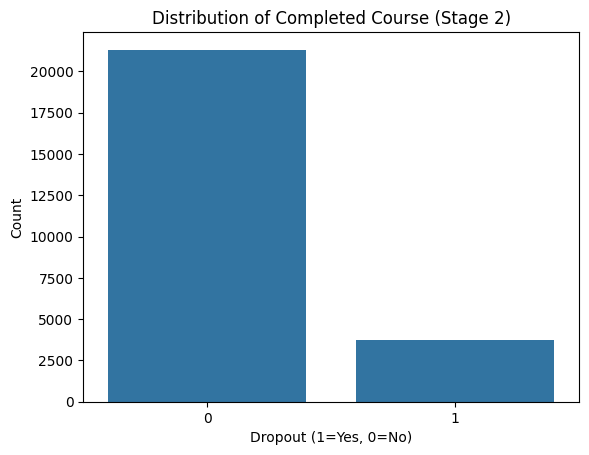

Target class distribution (Stage 2):
CompletedCourse
0    0.850194
1    0.149806
Name: proportion, dtype: float64


In [73]:
sns.countplot(x='CompletedCourse', data=engage_df)
plt.title('Distribution of Completed Course (Stage 2)')
plt.xlabel('Dropout (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

print("Target class distribution (Stage 2):")
print(engage_df['CompletedCourse'].value_counts(normalize=True))

### Training/Test Split

In [74]:
# Split data into 80% train and 20% test (as per rubric)
X2 = engage_df.drop("CompletedCourse", axis=1)
y2 = engage_df["CompletedCourse"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, stratify=y1, random_state=42
)

print(f"Train shape: {X2_train.shape}, Test shape: {X2_test.shape}")

Train shape: (20047, 391), Test shape: (5012, 391)


In [75]:
print(engage_df.dtypes.value_counts())


int64      388
float64      3
int32        1
Name: count, dtype: int64


### Scaling for NN

In [76]:
#Scale the data
# Identify numeric columns (excluding binary)
numerics_s2 = X2_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

#Exclude binary columns (i.e., exactly 2 unique values)
numeric_cols_s2 = [col for col in numerics_s2 if X2_train[col].nunique() > 2]

print("Numeric columns to scale:", numeric_cols_s2)

# Scale numeric features using StandardScaler
scaler = StandardScaler()

X2_train_scaled = X2_train.copy()
X2_test_scaled = X2_test.copy()

X2_train_scaled[numeric_cols_s2] = scaler.fit_transform(X2_train[numeric_cols_s2])
X2_test_scaled[numeric_cols_s2] = scaler.transform(X2_test[numeric_cols_s2])

Numeric columns to scale: ['CourseLevel', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age']


 ## Predict Dropouts with XGBoost Model

### XGBoost Without Tuning

In [77]:
## Class Imbalance Handling Setup
pos,neg =y2_train.value_counts().sort_index()
scale_pos_weight_s2=neg/pos
print(f"Class Imbalance Ratio (scale_pos_weight): {scale_pos_weight:.2f}")

Class Imbalance Ratio (scale_pos_weight): 0.18


---  XGBoost - No Tuning(Stage 2) ---
Accuracy: 0.8910614525139665
Precision: 0.9051383399209486
Recall: 0.30492676431424764
ROC AUC: 0.6496471418379499


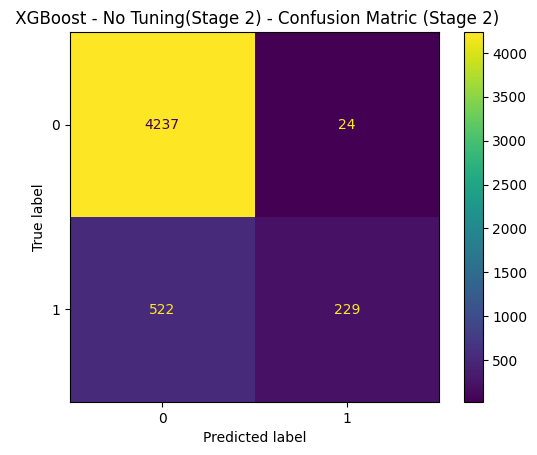

In [78]:
## XGBoost Baseline Model (Weighted)
xgb_weighted_s2 = XGBClassifier(eval_metric='logloss',  scale_pos_weight=scale_pos_weight_s2, random_state=42)
xgb_weighted_s2.fit(X2_train, y2_train)
y2_pred_weighted = xgb_weighted_s2.predict(X2_test)

def evaluate_model(name, y2_true, y2_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y2_true, y2_pred))
    print ("Precision:", precision_score (y2_true, y2_pred))
    print("Recall:", recall_score(y2_true, y2_pred))
    print("ROC AUC:", roc_auc_score(y2_true, y2_pred))
    ConfusionMatrixDisplay.from_predictions(y2_true, y2_pred)
    plt.title(f"{name} - Confusion Matric (Stage 2)")
    plt.show()

evaluate_model(" XGBoost - No Tuning(Stage 2)", y2_test, y2_pred_weighted)

Stage 2 baseline model outperformed Stage 1 baseline models across every metric.  The largest improvements came in recall, where Stage 2 models identified significantly more true dropouts,  +16% increase at baseline

ROC AUC also improved notably +8% , indicating better separation between dropout and non-dropout predictions.

These gains suggest that the Stage 2 dataset offers more predictive features, particularly those related to engagement and attendance (absence counts)

### XGBoost With Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters after Tuning (Weighted, Stage 2):
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'scale_pos_weight': 0.17619103496831728}

Classification Report at Threshold = 0.2
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4261
           1       0.77      0.53      0.63       751

    accuracy                           0.91      5012
   macro avg       0.85      0.75      0.79      5012
weighted avg       0.90      0.91      0.90      5012



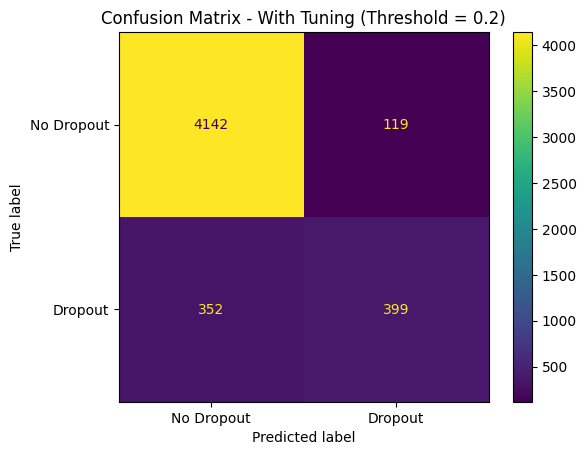

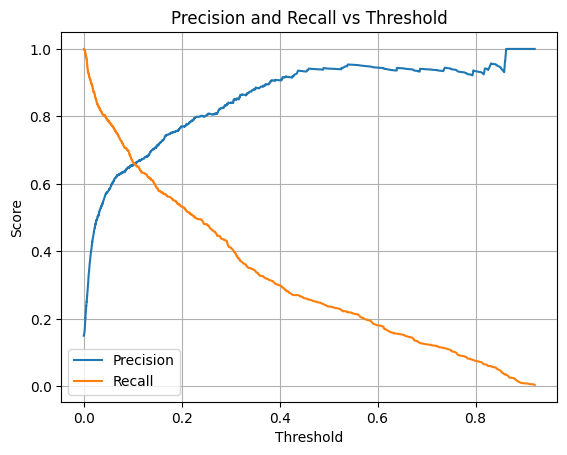

In [79]:
#Model tuning
param_grid_s2 = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 150],
    'scale_pos_weight': [scale_pos_weight_s2]
}

xgb_grid_s2 = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
grid_search_s2 = GridSearchCV(xgb_grid_s2, param_grid_s2, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_s2.fit(X2_train, y2_train)

print("Best Parameters after Tuning (Weighted, Stage 2):")
print(grid_search_s2.best_params_)

# Evaluate best estimator
xgb_best_s2 = grid_search_s2.best_estimator_

# Predict probabilities for dropout (class 1)
y2_proba = xgb_best_s2.predict_proba(X2_test)[:, 1]

# Apply custom threshold
threshold = 0.2
y2_pred_custom = (y2_proba >= threshold).astype(int)

# Evaluation
print(f"\nClassification Report at Threshold = {threshold}")
print(classification_report(y2_test, y2_pred_custom))

# Confusion matrix
cm = confusion_matrix(y2_test, y2_pred_custom)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Dropout", "Dropout"]).plot()
plt.title(f"Confusion Matrix - With Tuning (Threshold = {threshold})")
plt.show()

# Visualize precision-recall vs threshold
precision, recall, thresholds = precision_recall_curve(y2_test, y2_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


The model correctly classifies 91% of all students and 77% of predicted dropouts are truly at risk. The model identifies 53% of actual dropouts and has a good balance between precision and recall.

Similarly to baseline data, the stage 2 tuned model outperforms stage 1 across drop-out related metrics. Particularly, it captutes +7% (recall) dropouts while improving preciision and overall balance.

Model has stronger F1 (0.63) for dropout class and high accuracy (0.91), makes this model better calibrated for early intervention.


### Tuned vs Without Tunning XGBoost Comparison

                           Model  Threshold  Accuracy  Precision (Dropout)  \
0  XGBoots - Without Tuning (S1)        0.5  0.867518             0.837209   
1           XGBoots - Tuned (S1)        0.2  0.893057             0.724426   
2  XGBoots - Without Tuning (S2)        0.5  0.891061             0.905138   
3           XGBoots - Tuned (S2)        0.2  0.906026             0.770270   

   Recall (Dropout)  F1 (Dropout)   ROC AUC  
0          0.143808      0.245455  0.569440  
1          0.462051      0.564228  0.884788  
2          0.304927      0.456175  0.649647  
3          0.531292      0.628842  0.915800  


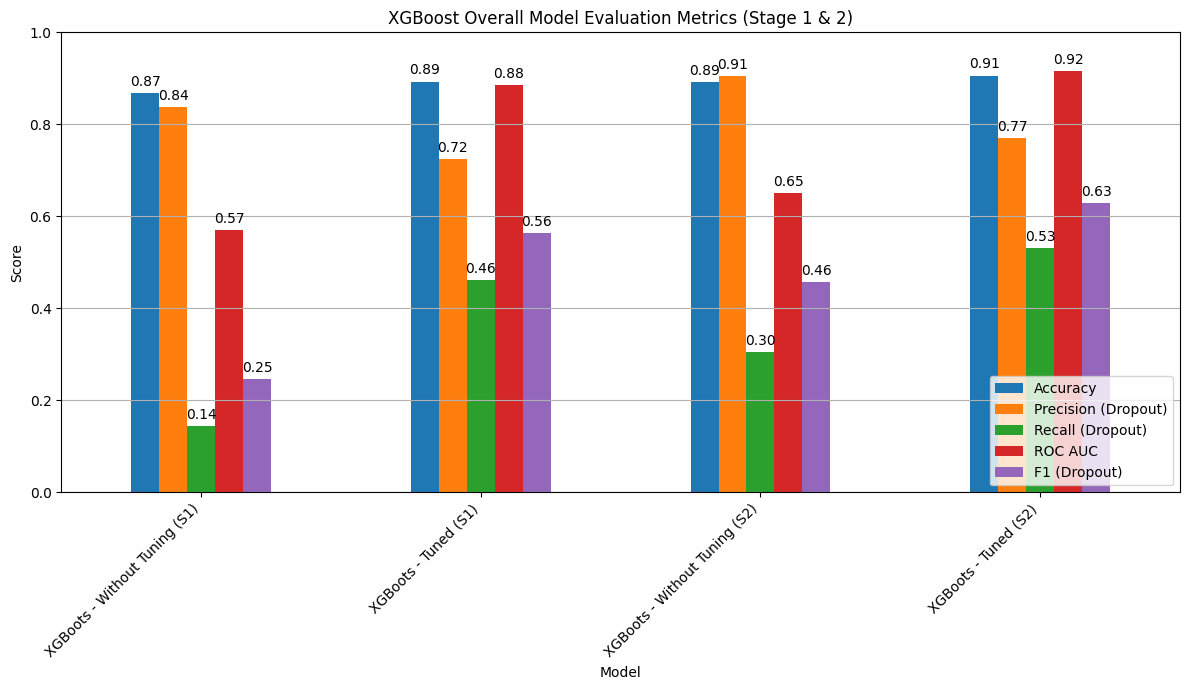

In [80]:

# Compare stage 1 and stage 2 XGBoost Models, before and after tuning
def compare_s1_s2(model_name, model, X_test, y_test, threshold=None):
    if threshold is not None:
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred)

    return {
        "Model": model_name,
        "Threshold": threshold if threshold is not None else 0.5,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Dropout)": precision_score(y_test, y_pred, pos_label=1),
        "Recall (Dropout)": recall_score(y_test, y_pred, pos_label=1),
        "F1 (Dropout)": f1_score(y_test, y_pred, pos_label=1),
        "ROC AUC": roc_auc
    }

results = [
    compare_s1_s2("XGBoots - Without Tuning (S1)", xgb_weighted, X1_test, y1_test),
    compare_s1_s2("XGBoots - Tuned (S1)", xgb_best_s1, X1_test, y1_test, threshold=0.2),
    compare_s1_s2("XGBoots - Without Tuning (S2)", xgb_weighted_s2, X2_test, y2_test),
    compare_s1_s2 ("XGBoots - Tuned (S2)", xgb_best_s2, X2_test, y2_test, threshold=0.2)
]

comparison_s1_s2 = pd.DataFrame(results)
print(comparison_s1_s2)


# Define the metrics to plot - Corrected column names
metrics_to_plot = ["Accuracy", "Precision (Dropout)", "Recall (Dropout)", "ROC AUC", "F1 (Dropout)"]

# Create the bar plot
compare_xgb_s1s2 = comparison_s1_s2.set_index("Model")[metrics_to_plot].plot(kind='bar', figsize=(12, 7))

# Title and labels
plt.title("XGBoost Overall Model Evaluation Metrics (Stage 1 & 2)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(True, axis='y')
plt.tight_layout()

# Add numeric value labels on each bar
for container in compare_xgb_s1s2.containers:
    compare_xgb_s1s2.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


Across all key performance metrics, Stage 2 outperforms Stage 1, especially in recall and F1 score. The higher recall in Stage 2 indicates it’s better at identifying actual dropouts. ROC AUC improvement shows the Stage 2 model ranks students more effectively by dropout risk. F1 Score—a balance between precision and recall—improved from 0.56 → 0.63, meaning Stage 2 is both more accurate and better balanced in classifying dropouts

Overall, even without tuning, model performs better than on previous stage data. This is the effect of additional features, meaning they gave more explanatory power.

### Feature Importance

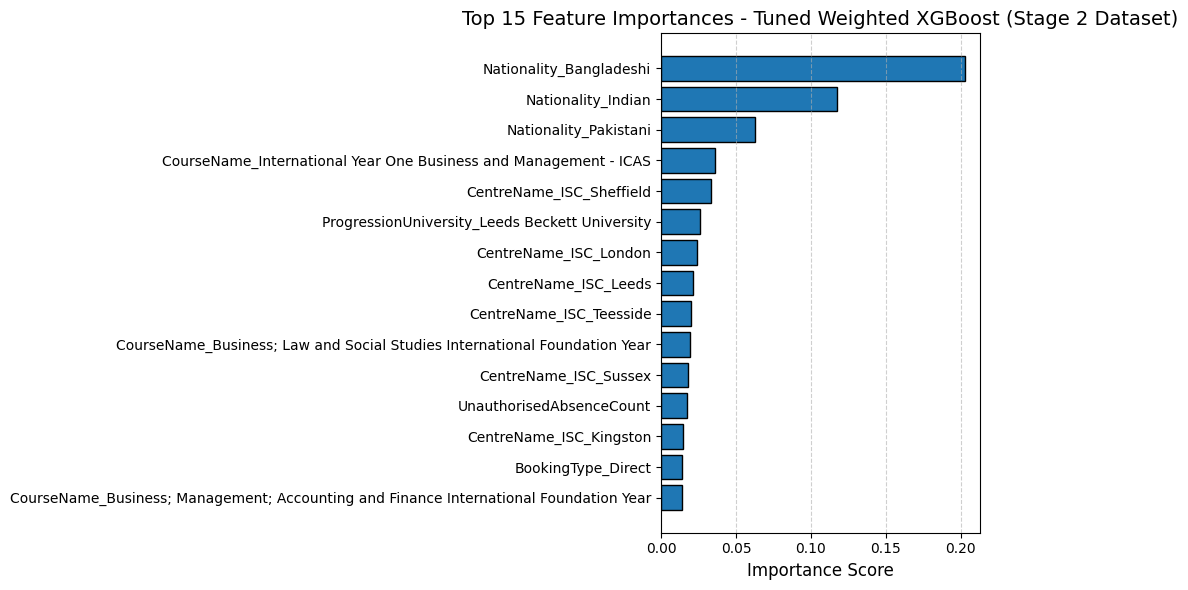

In [81]:
# Create DataFrame with feature importances
feature_importance_s2 = pd.DataFrame({
    'Feature': X2_train.columns,
    'Importance': xgb_best_s2.feature_importances_
})

# Sort and select top 15
top_features_s2 = feature_importance_s2.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features_s2['Feature'], top_features_s2['Importance'], edgecolor='black')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Tuned Weighted XGBoost (Stage 2 Dataset)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


As it was expected, Additional Feature, UnautorisedAsbenceCount is one of the features that has important impact on prediction. However, feature importance plot doesn't show whether this impact is negative or positive... while it is intuitive, it is good to look at SHAP..

### Shap

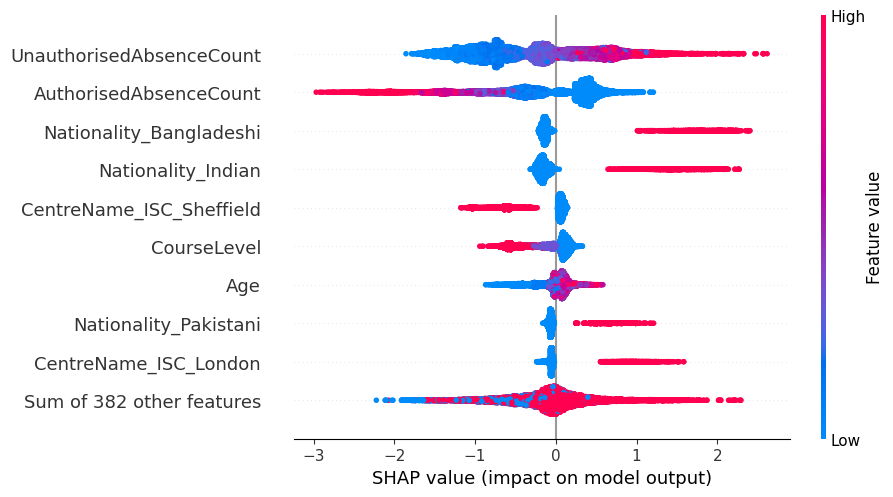

In [82]:
explainer_s2 = shap.Explainer(xgb_best_s2)
shap_s2 = explainer_s2(X2_train)

# Beeswarm plot
shap.plots.beeswarm(shap_s2)


The strongest predictors of dropout are student engagement indicators, more unauthorised absences significantly increase dropout risk, while authorised absences also contribute, though to a lesser extent. SHAP analysis confirms that, beyond global patterns, absences have a strong individual-level impact, making them key for early warning systems. Feature Importance highlights nationality, with Indian students and those in higher-level courses more likely to have positive outcomes.










## Predict Dropouts with Neural Networks

In [83]:
print(X2_train_scaled.shape, y2_train.shape)

(20047, 391) (20047,)


### Neural Network Model without Optimisation

In [84]:
#Compute class weights
cw_2 = compute_class_weight(class_weight='balanced', classes=np.unique(y2_train), y=y2_train)
cw_dict_2 = dict(enumerate(cw_2))

In [85]:
# Define models

# Model without regularization
def model_no_reg_s2(input_dim, hidden_units, learning_rate):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model


# Model with L2 regularization
def model_l2_s2(input_dim, hidden_units, learning_rate, l2_lambda):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model

In [86]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Evaluate model
def evaluate_model(model, X, y, threshold=0.3, label="Model"):
    y_prob = model.predict(X).ravel()
    y_pred = (y_prob >= threshold).astype(int)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall   :", recall_score(y, y_pred))
    print("F1 Score :", f1_score(y, y_pred))
    print("AUC      :", roc_auc_score(y, y_prob))
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"{label} - Confusion Matrix")
    plt.show()
    return y_pred, y_prob


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


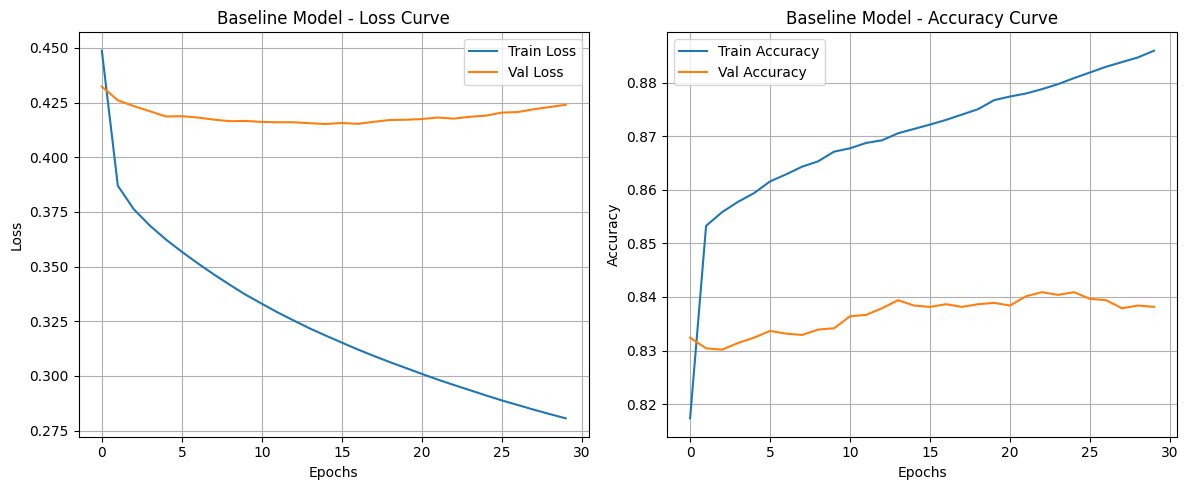

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== Baseline Model (Stage 2) ===
Accuracy : 0.7567837190742218
Precision: 0.3683914510686164
Recall   : 0.8721704394141145
F1 Score : 0.5179913009094503
AUC      : 0.8968008234971693


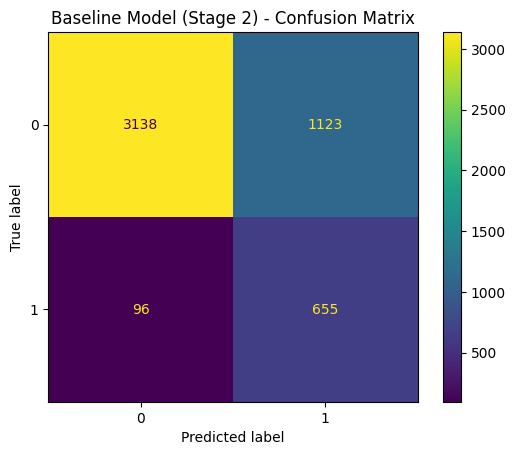

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0.00300319, 0.11412268, 0.03589617, ..., 0.01230436, 0.00854827,
        0.17558287], dtype=float32))

In [87]:
# Baseline model training
tf.random.set_seed(42)
baseline_model_s2 = model_no_reg_s2(X2_train_scaled.shape[1], hidden_units=(32,), learning_rate=0.001)
baseline_history = baseline_model_s2.fit(
    X2_train_scaled, y2_train,
    epochs=30,
    batch_size=32,
    class_weight=cw_dict_2,
    validation_split=0.2,
    verbose=0
)

plot_history(baseline_history, "Baseline Model")
evaluate_model(baseline_model_s2, X2_test_scaled, y2_test, label="Baseline Model (Stage 2)")

The baseline model in Stage 2 shows signs of overfitting. While training loss steadily decreases and training accuracy improves over epochs, the validation loss begins increasing after a few epochs, and validation accuracy plateaus early around 75%. The confusion matrix confirms this by showing the model correctly predicts the majority class (3,138 true negatives) but struggles with false positives (1,123) and still misses some positives (96 false negatives).


### Neural Network Model With Optimisation


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


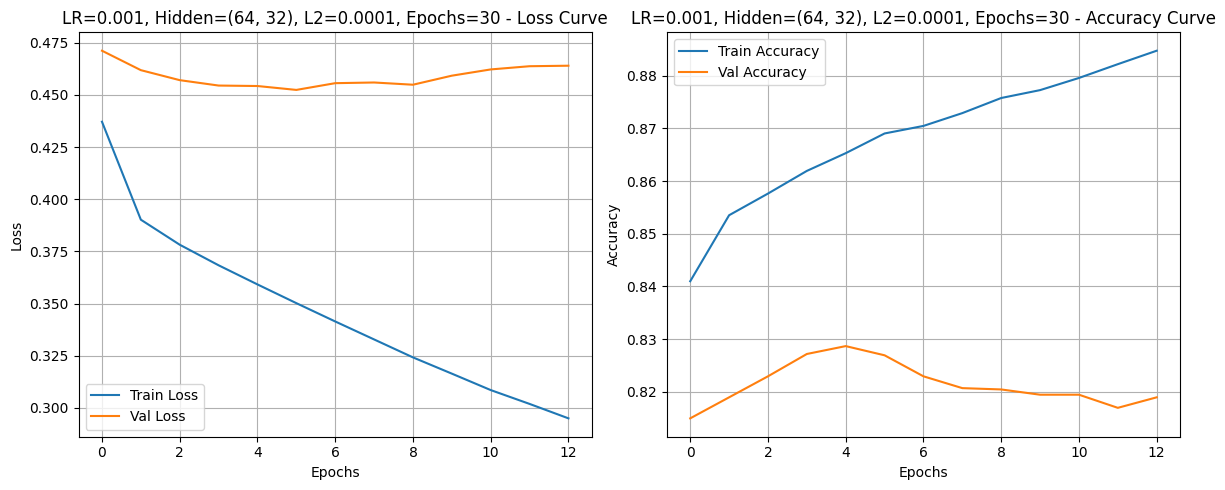

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.816440542697526
Precision: 0.44224196855775805
Recall   : 0.8615179760319573
F1 Score : 0.5844625112917796
AUC      : 0.9090425001664055


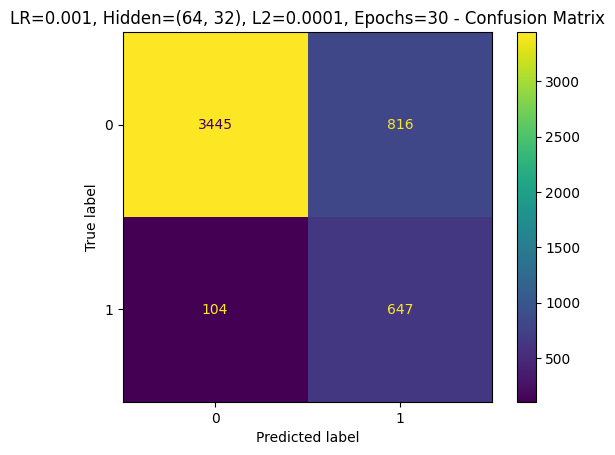


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


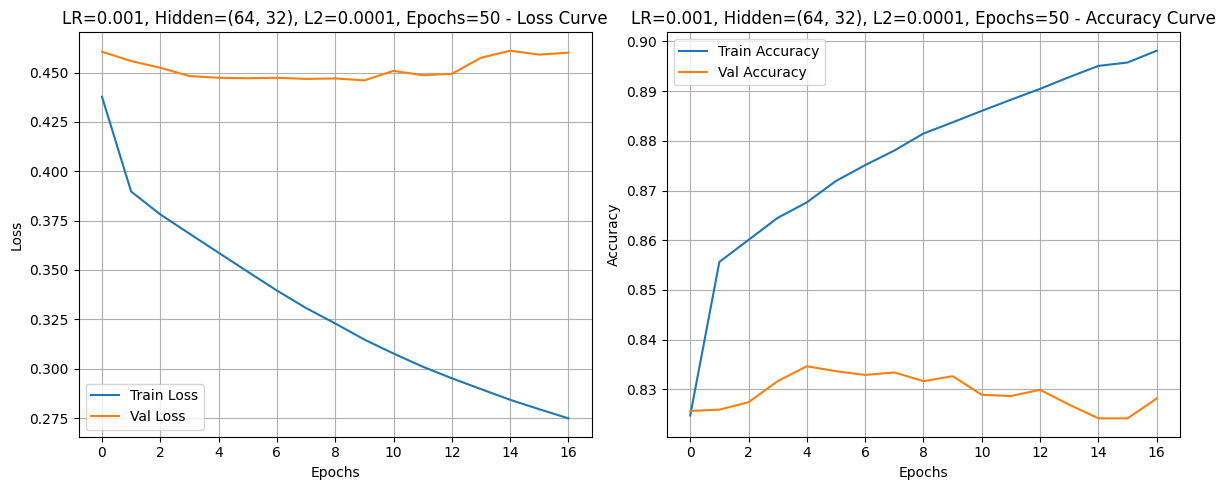

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.8256185155626496
Precision: 0.45622775800711746
Recall   : 0.8535286284953395
F1 Score : 0.5946196660482375
AUC      : 0.9058704798202256


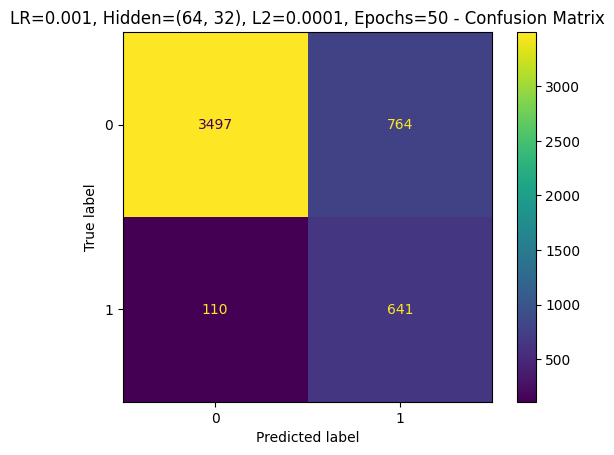


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


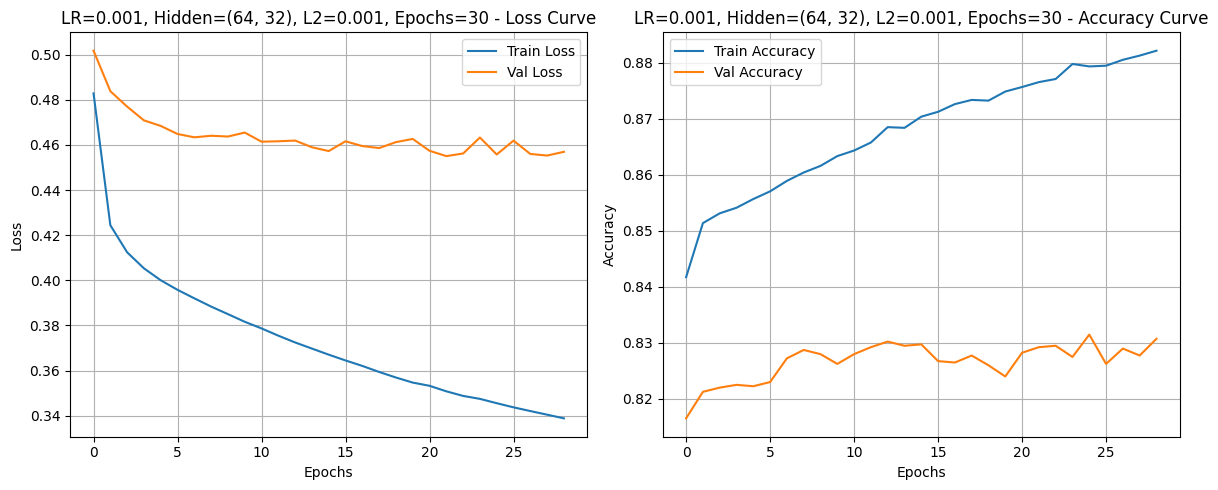

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.8214285714285714
Precision: 0.44986072423398327
Recall   : 0.8601864181091877
F1 Score : 0.5907636031092821
AUC      : 0.908385158676017


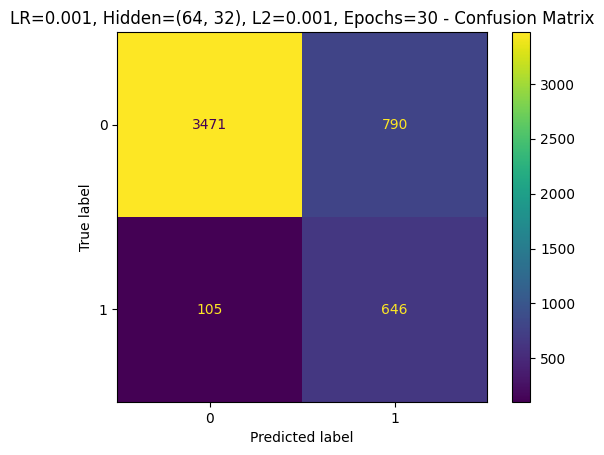


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


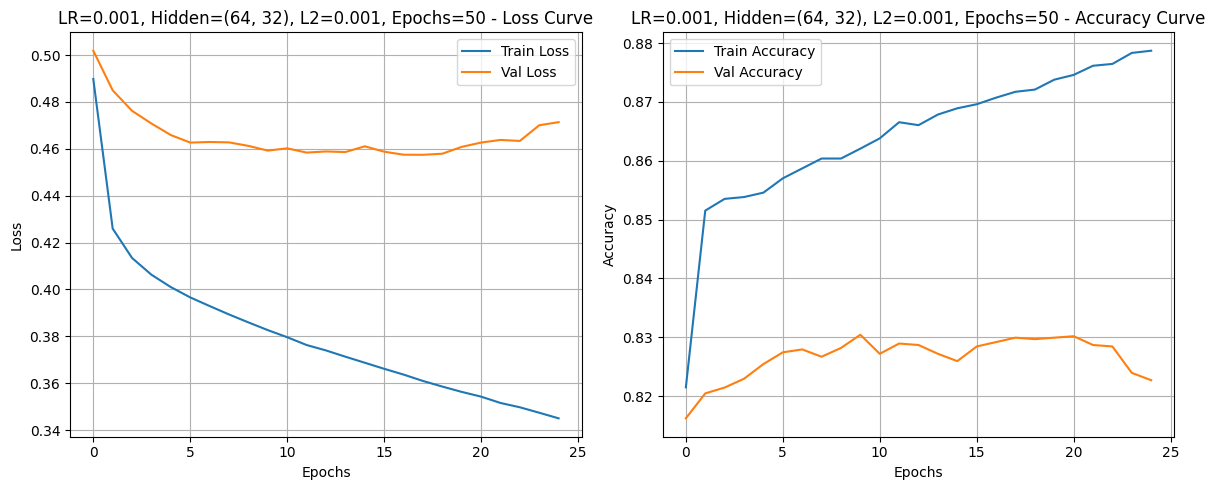

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.823024740622506
Precision: 0.45251396648044695
Recall   : 0.8628495339547271
F1 Score : 0.5936784241868988
AUC      : 0.9075260991290343


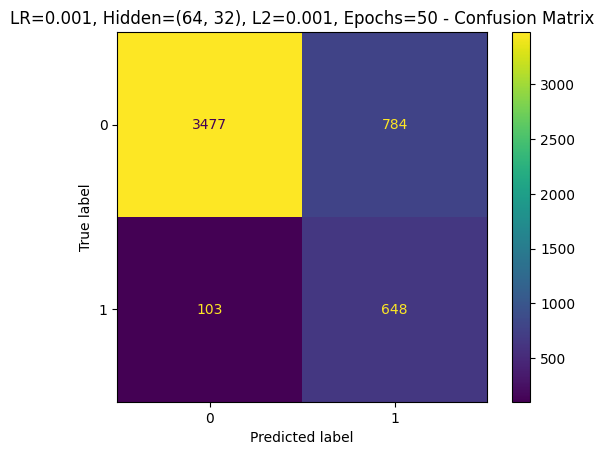


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


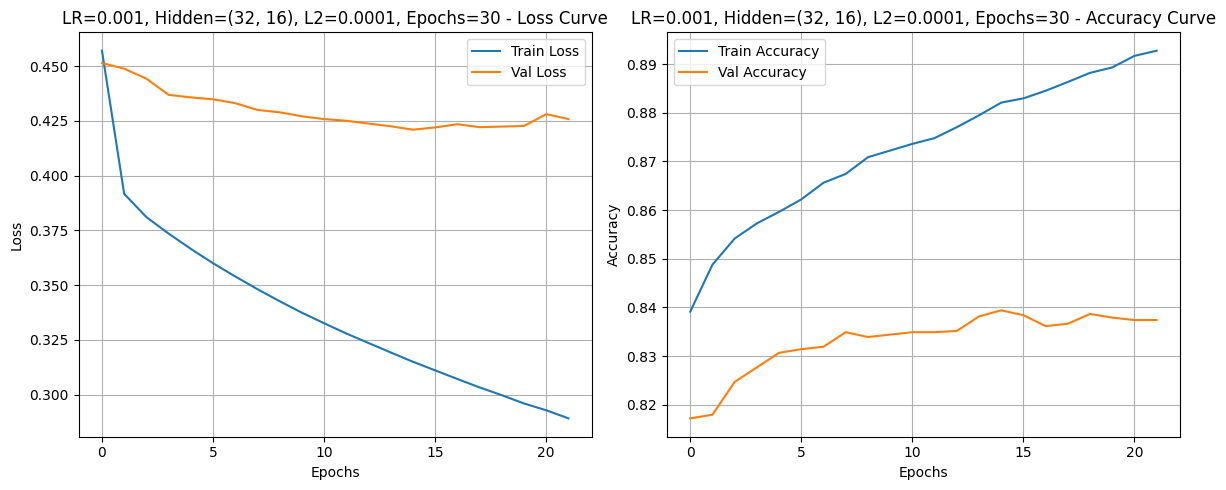

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.8302075019952115
Precision: 0.4635036496350365
Recall   : 0.8455392809587217
F1 Score : 0.5987741631305987
AUC      : 0.9074825055288872


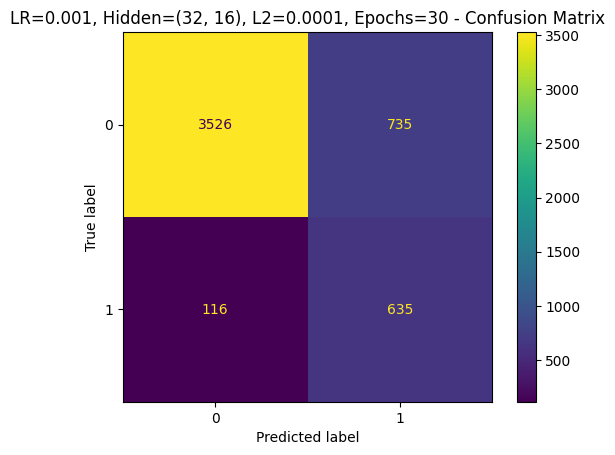


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


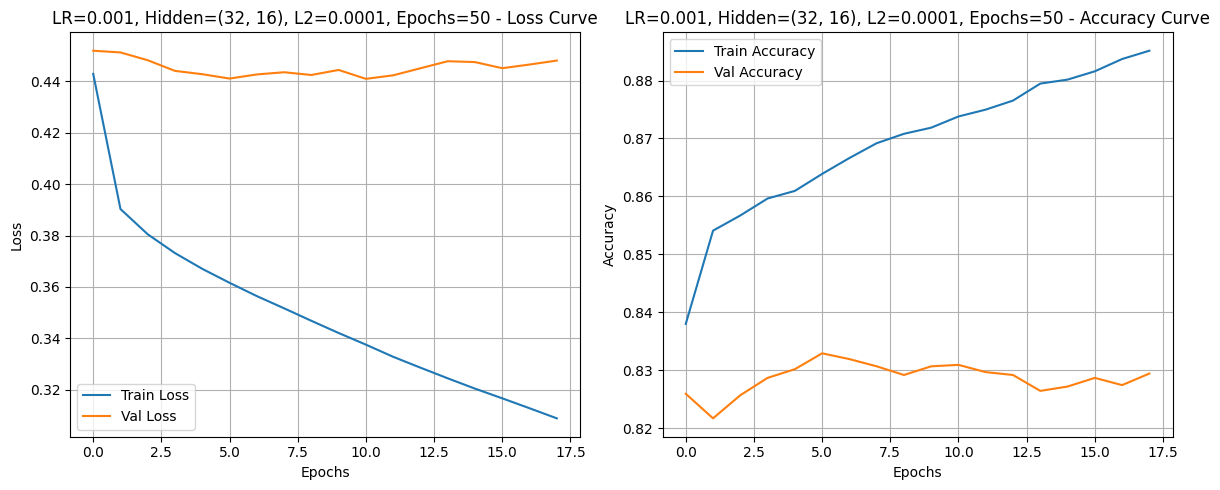

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.8212290502793296
Precision: 0.4489795918367347
Recall   : 0.8495339547270306
F1 Score : 0.5874769797421732
AUC      : 0.9085742205261169


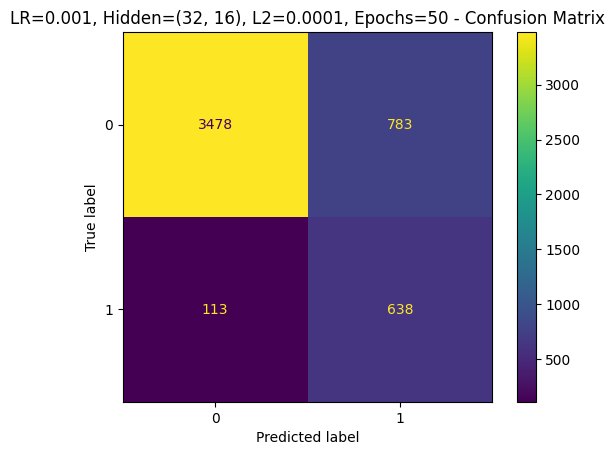


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


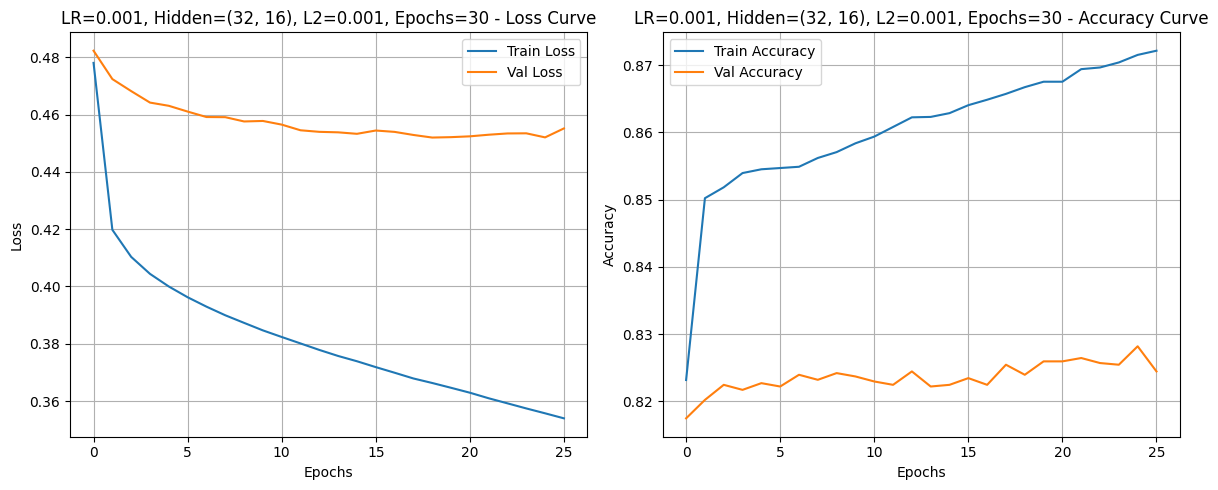

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.8182362330407024
Precision: 0.44505494505494503
Recall   : 0.8628495339547271
F1 Score : 0.5872224739465337
AUC      : 0.9102331210736463


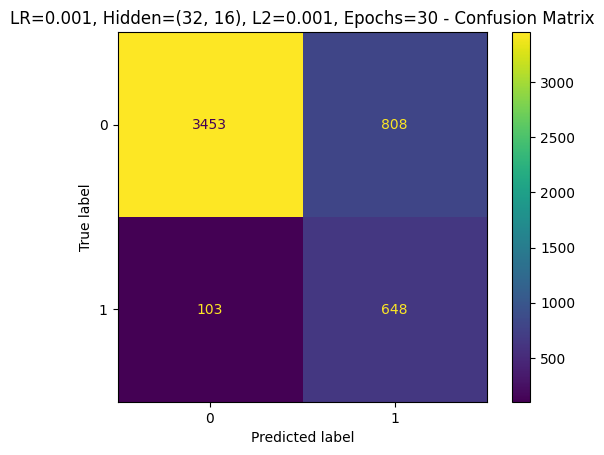


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


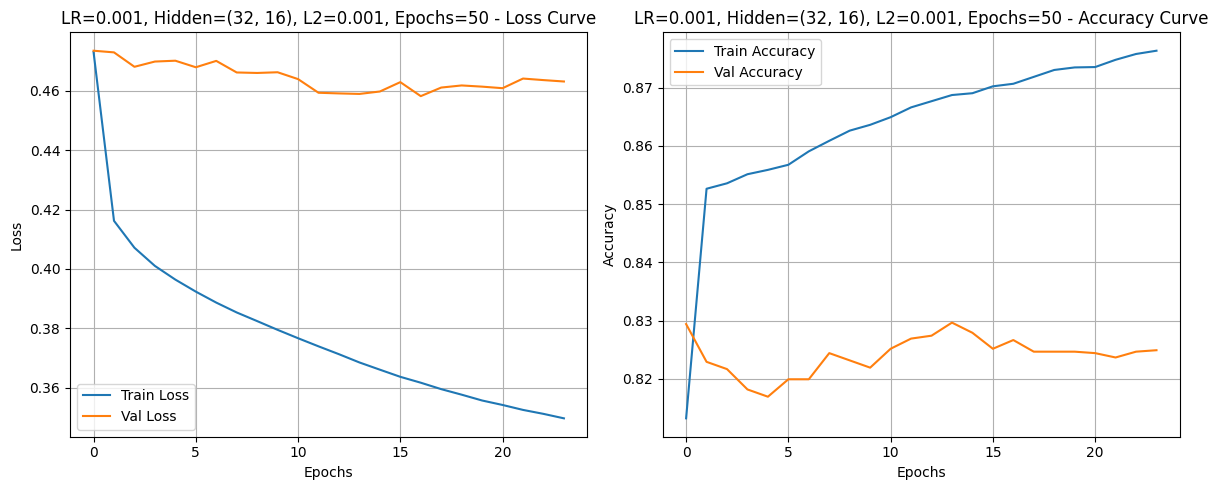

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.8216280925778132
Precision: 0.4498948843728101
Recall   : 0.8548601864181092
F1 Score : 0.5895316804407713
AUC      : 0.9095920295273986


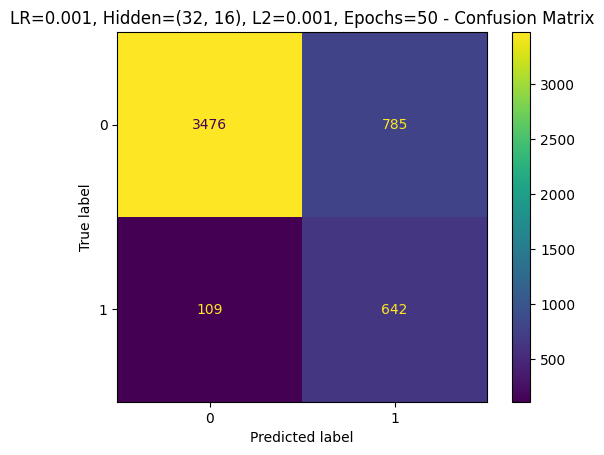


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


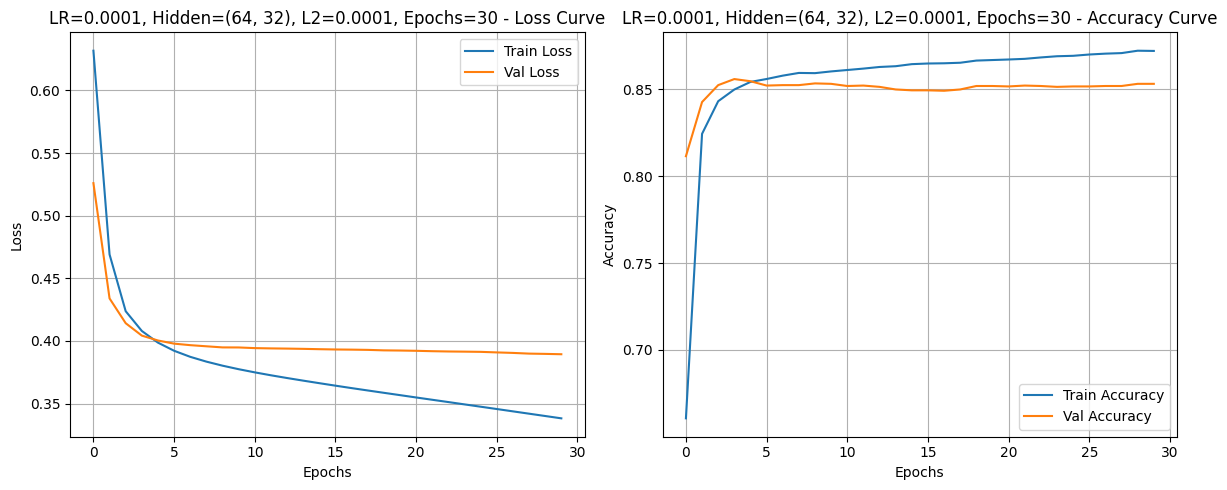

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.8455706304868316
Precision: 0.49106449106449107
Recall   : 0.8415446071904128
F1 Score : 0.620215897939156
AUC      : 0.9089731254048814


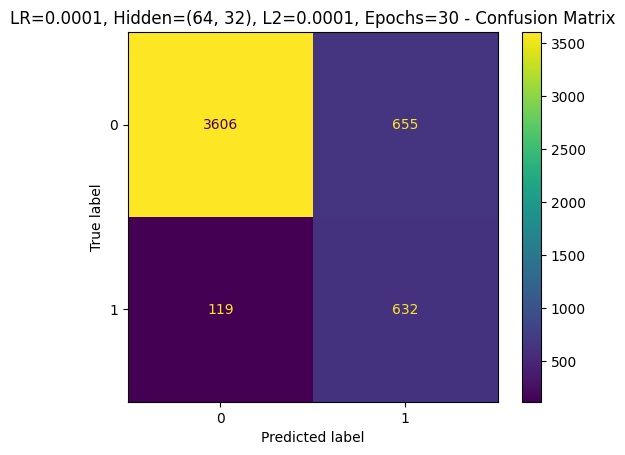


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


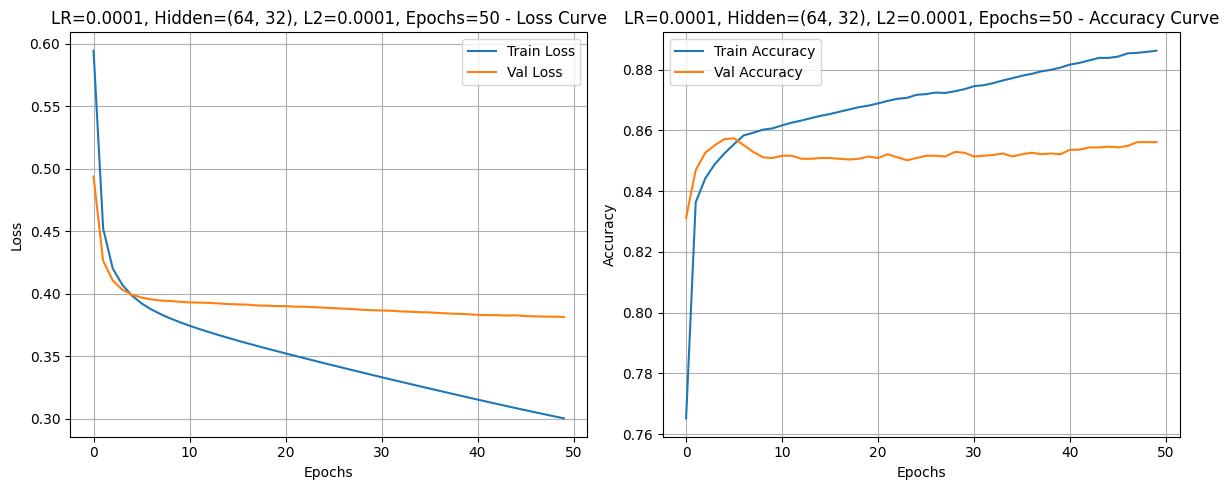

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.8509577015163607
Precision: 0.5016181229773463
Recall   : 0.8255659121171771
F1 Score : 0.6240563663814797
AUC      : 0.9060314167670048


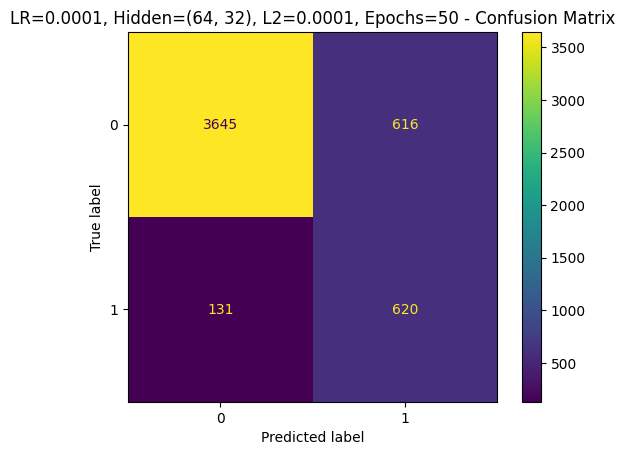


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


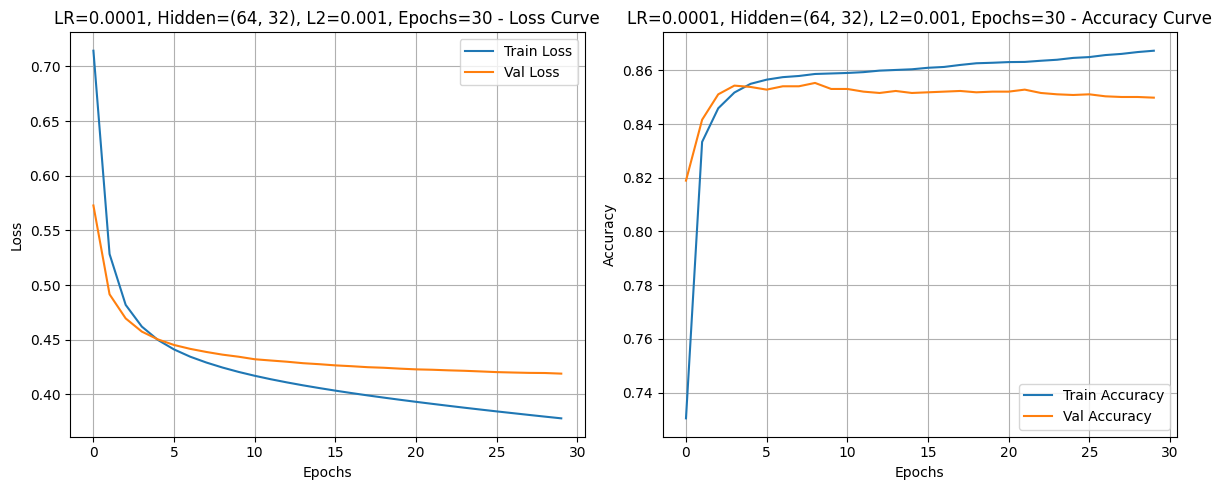

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.8415802075019952
Precision: 0.4835249042145594
Recall   : 0.8402130492676432
F1 Score : 0.6138132295719845
AUC      : 0.9102726521877581


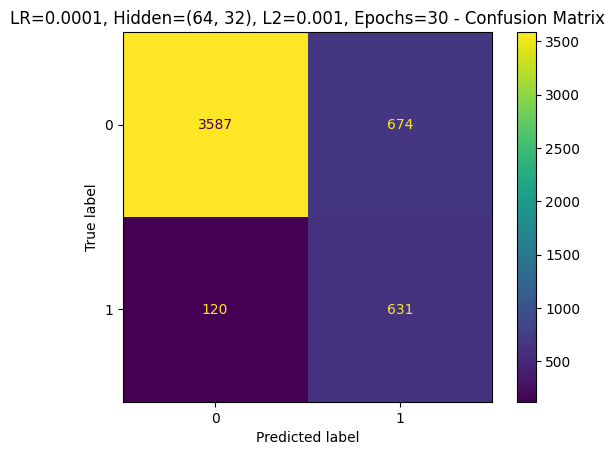


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


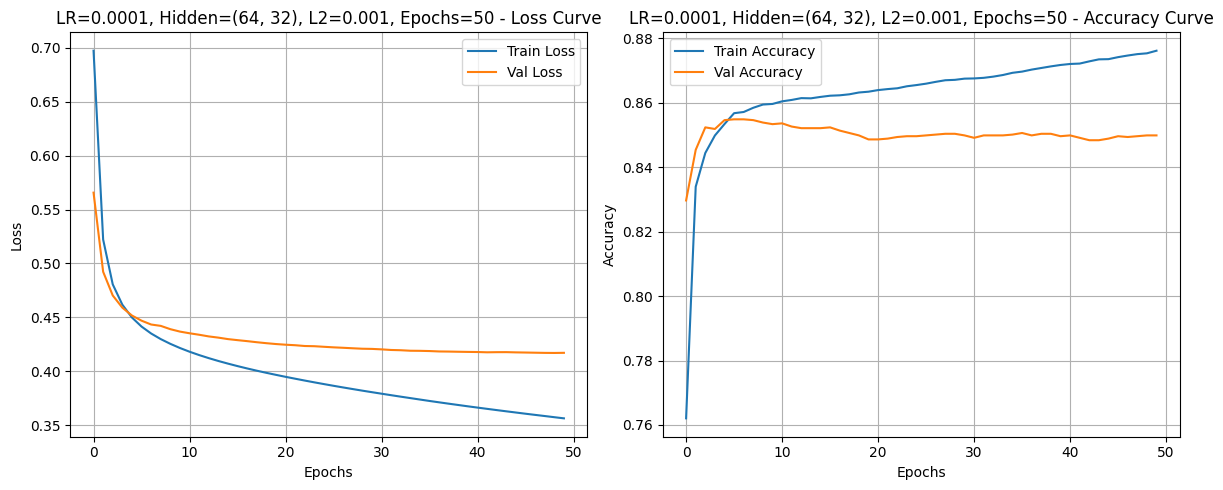

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.8431763766959298
Precision: 0.4865280985373364
Recall   : 0.8415446071904128
F1 Score : 0.6165853658536585
AUC      : 0.9096798417255441


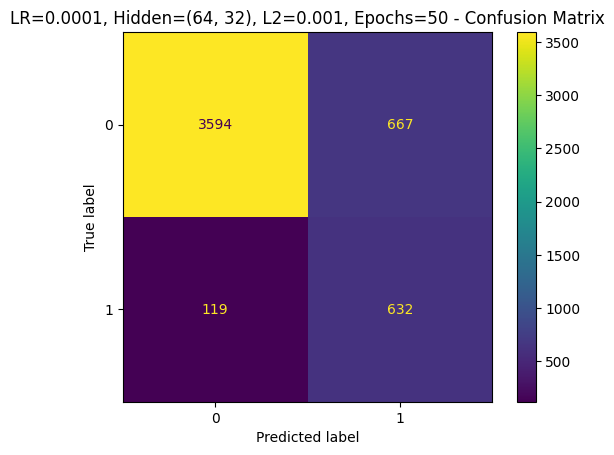


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


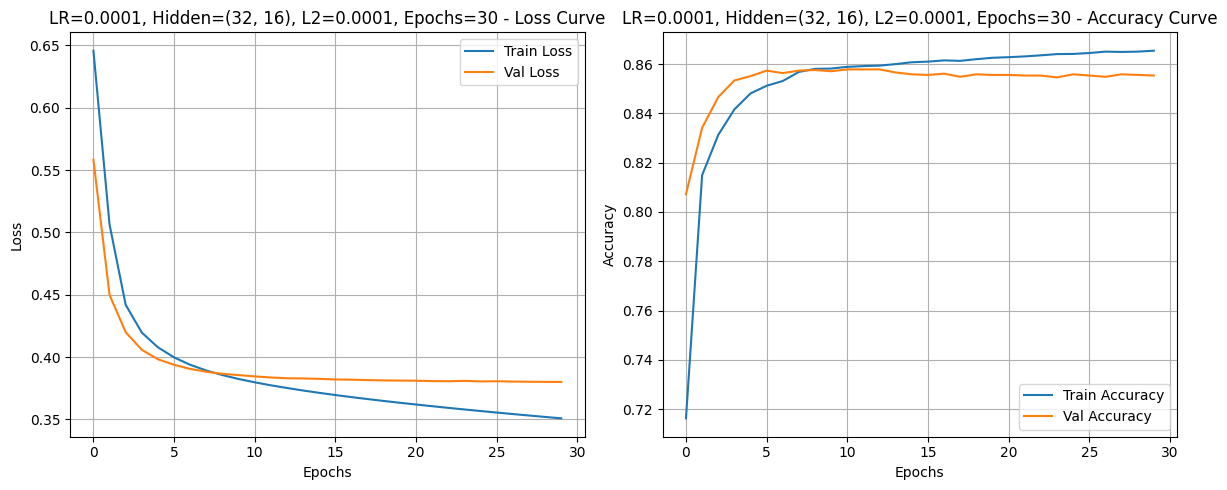

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.8491620111731844
Precision: 0.49802058590657167
Recall   : 0.8375499334221038
F1 Score : 0.6246276067527309
AUC      : 0.9086932826168409


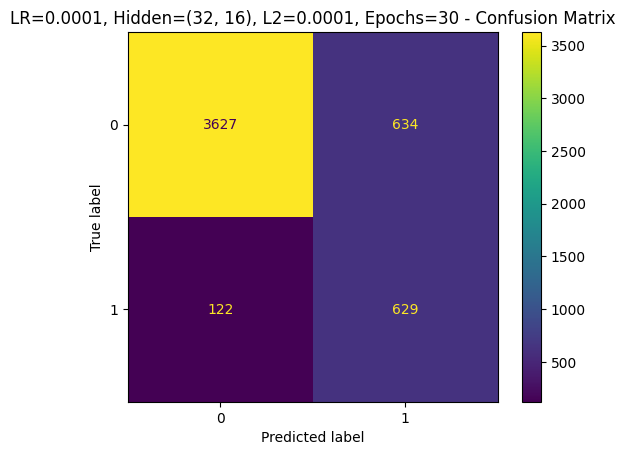


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


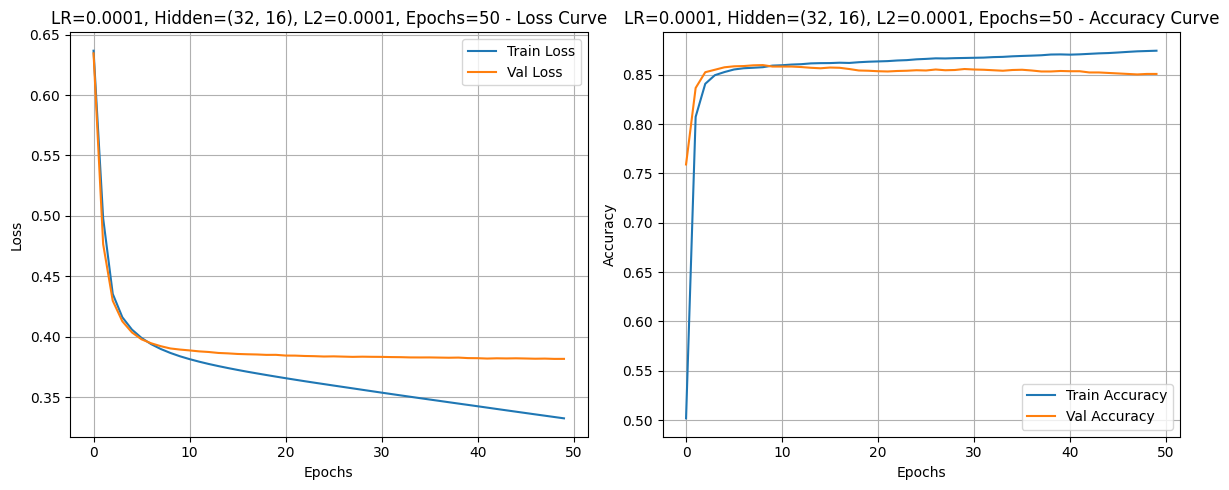

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.8475658419792498
Precision: 0.49482071713147413
Recall   : 0.8268974700399467
F1 Score : 0.6191425722831505
AUC      : 0.9061559475889303


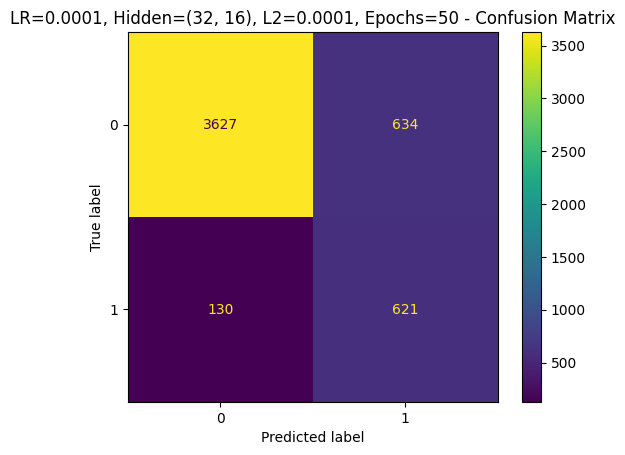


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


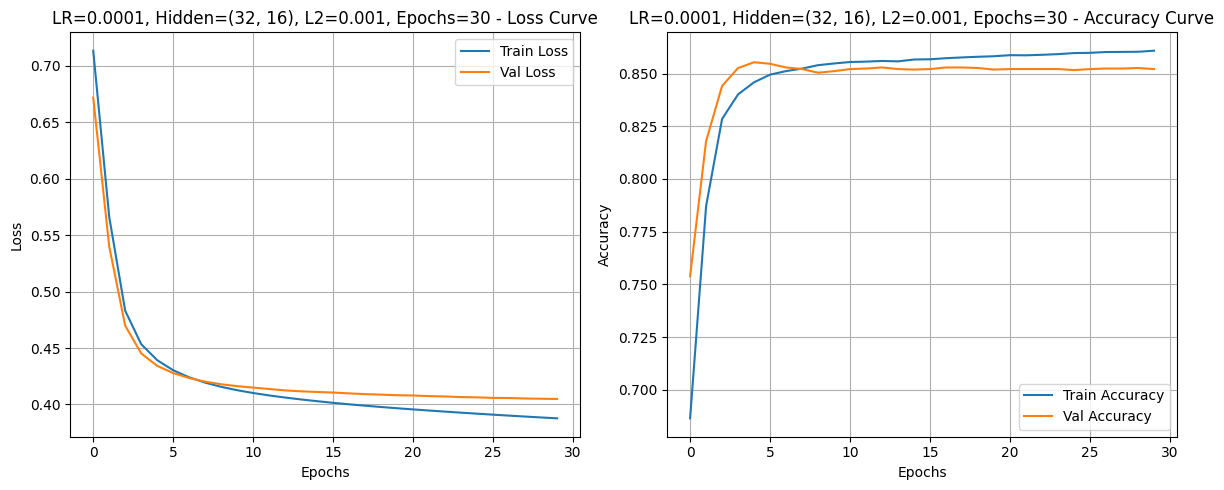

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.8453711093375897
Precision: 0.49061032863849763
Recall   : 0.8348868175765646
F1 Score : 0.618038442582553
AUC      : 0.9091617185065927


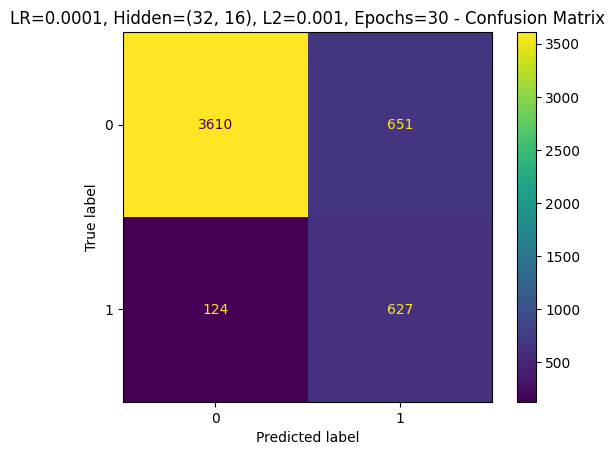


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


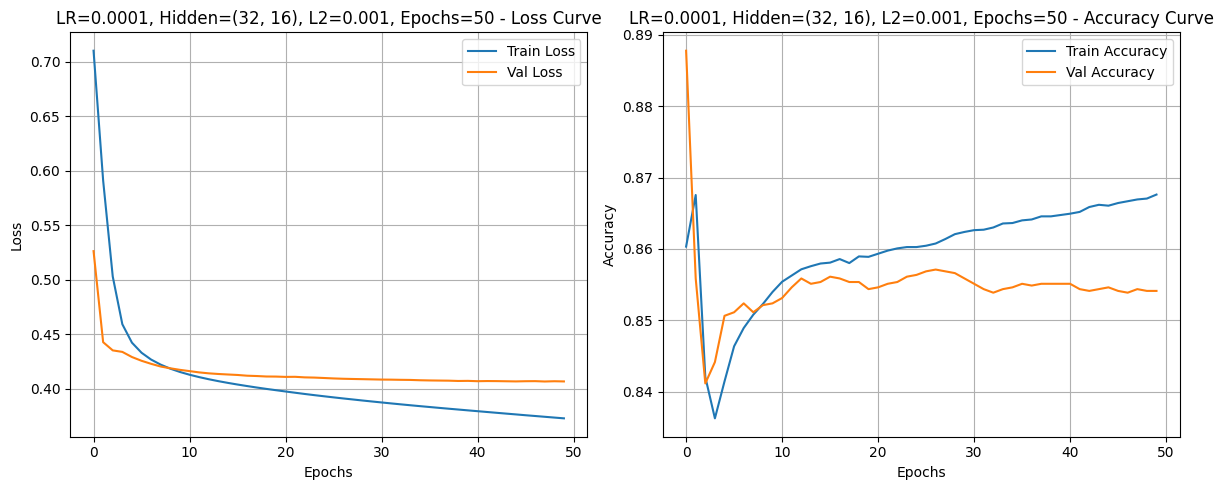

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.8491620111731844
Precision: 0.4980268350434096
Recall   : 0.8402130492676432
F1 Score : 0.6253716551040635
AUC      : 0.9085201582119561


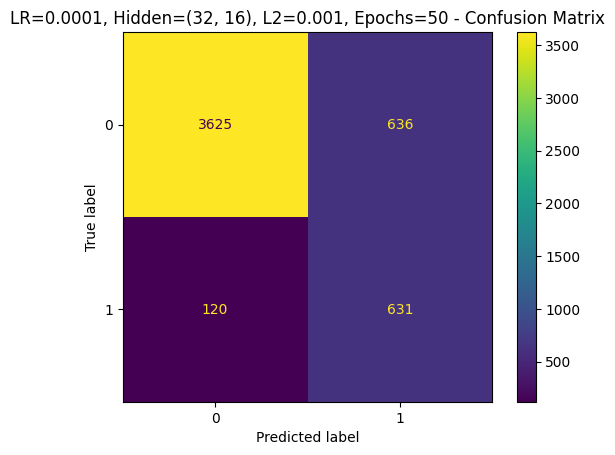

In [88]:

# Manual Grid Search with Early Stopping
results_s2 = []
learning_rates = [0.001, 0.0001]
hidden_layer_options = [(64, 32), (32, 16)]
l2_lambdas = [1e-4, 1e-3]
epoch_options = [30, 50]
batch_size = 32

# EarlyStopping configuration
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=0
)

for lr in learning_rates:
    for hidden_units in hidden_layer_options:
        for l2_lambda in l2_lambdas:
            for epochs in epoch_options:
                label = f"LR={lr}, Hidden={hidden_units}, L2={l2_lambda}, Epochs={epochs}"
                print(f"\nTraining: {label}")

                model = model_l2_s2(X2_train_scaled.shape[1], hidden_units, lr, l2_lambda)

                history = model.fit(
                    X2_train_scaled, y2_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    class_weight=cw_dict_2,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0
                )

                plot_history(history, label)

                y_pred, y_prob = evaluate_model(model, X2_test_scaled, y2_test, threshold=0.5, label=label)

                results_s2.append({
                    "Label": label,
                    "Accuracy": accuracy_score(y2_test, y_pred),
                    "Precision": precision_score(y2_test, y_pred),
                    "Recall": recall_score(y2_test, y_pred),
                    "F1 Score": f1_score(y2_test, y_pred),
                    "AUC": roc_auc_score(y2_test, y_prob)
                })

In [89]:
# Results Comparison

results_df_s2 = pd.DataFrame(results_s2)
results_df_s2 = results_df_s2.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\nTop Models by F1 Score:")
print(results_df_s2.head(3))


Top Models by F1 Score:
                                              Label  Accuracy  Precision  \
0   LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50  0.849162   0.498027   
1  LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30  0.849162   0.498021   
2  LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50  0.850958   0.501618   

     Recall  F1 Score       AUC  
0  0.840213  0.625372  0.908520  
1  0.837550  0.624628  0.908693  
2  0.825566  0.624056  0.906031  


### Baseline vs Optimised Model Comparison

In [90]:
# Baseline vs Best Optimised Model Comparison (Stage 2)

y_baseline_prob = baseline_model_s2.predict(X2_test_scaled)
y_baseline_pred = (y_baseline_prob >= 0.5).astype(int)
best_model_metrics_s2 = results_df_s2.iloc[0]

print("\nComparison of Baseline vs Best Tuned Model (Stage 2):")
print(f"{'Metric':<12} | {'Baseline':<10} | {'Tuned':<10}")
print("-" * 40)
print(f"{'Accuracy':<12} | {accuracy_score(y2_test, y_baseline_pred):<10.4f} | {best_model_metrics_s2['Accuracy']:<10.4f}")
print(f"{'Precision':<12} | {precision_score(y2_test, y_baseline_pred):<10.4f} | {best_model_metrics_s2['Precision']:<10.4f}")
print(f"{'Recall':<12} | {recall_score(y2_test, y_baseline_pred):<10.4f} | {best_model_metrics_s2['Recall']:<10.4f}")
print(f"{'F1 Score':<12} | {f1_score(y2_test, y_baseline_pred):<10.4f} | {best_model_metrics_s2['F1 Score']:<10.4f}")
print(f"{'AUC':<12} | {roc_auc_score(y2_test, y_baseline_prob):<10.4f} | {best_model_metrics_s2['AUC']:<10.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Comparison of Baseline vs Best Tuned Model (Stage 2):
Metric       | Baseline   | Tuned     
----------------------------------------
Accuracy     | 0.8330     | 0.8492    
Precision    | 0.4678     | 0.4980    
Recall       | 0.8322     | 0.8402    
F1 Score     | 0.5989     | 0.6254    
AUC          | 0.8968     | 0.9085    


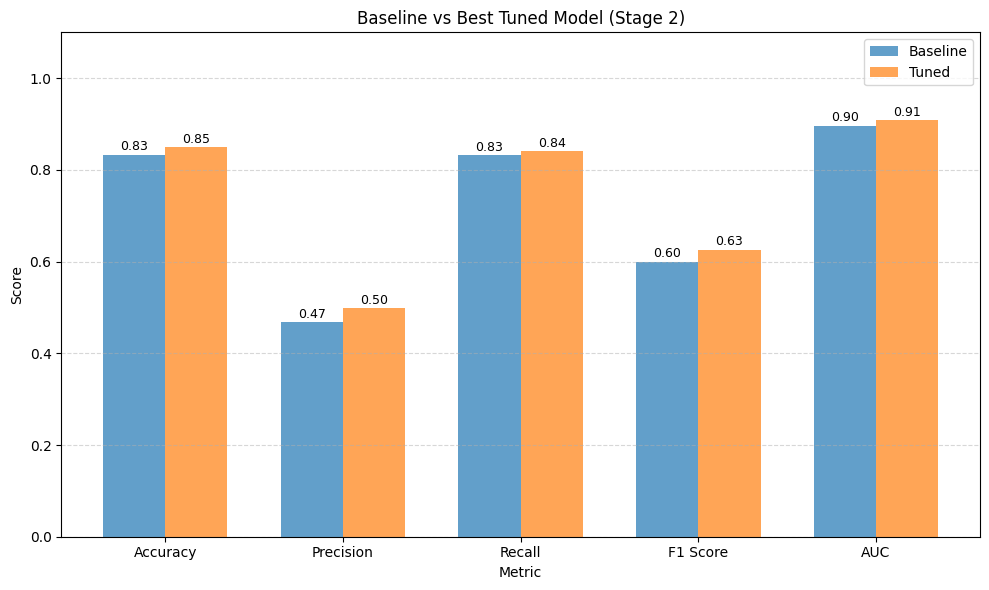

In [91]:
import matplotlib.pyplot as plt

# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Values
baseline_values_s2 = [
    accuracy_score(y2_test, y_baseline_pred),
    precision_score(y2_test, y_baseline_pred),
    recall_score(y2_test, y_baseline_pred),
    f1_score(y2_test, y_baseline_pred),
    roc_auc_score(y2_test, y_baseline_prob)
]

tuned_values_s2 = [
    best_model_metrics_s2["Accuracy"],
    best_model_metrics_s2["Precision"],
    best_model_metrics_s2["Recall"],
    best_model_metrics_s2["F1 Score"],
    best_model_metrics_s2["AUC"]
]

# Plot setup
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, baseline_values_s2, width=width, label='Baseline', alpha=0.7)
bars2 = plt.bar([p + width for p in x], tuned_values_s2, width=width, label='Tuned', alpha=0.7)

# Add metric values on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

# Labels and ticks
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Baseline vs Best Tuned Model (Stage 2)")
plt.xticks([p + width / 2 for p in x], metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


This tuned model with a deeper architecture (64, 32), a learning rate of 0.0001, and extended training (50 epochs) shows improved stability and generalization compared to the baseline in Stage 2. Both training and validation loss steadily decrease, and validation accuracy quickly stabilizes. The confusion matrix reflects better balance: false positives decrease significantly (619 vs. 1161 in Stage 2), though false negatives rise slightly (131 vs. 96). Compared to both the Stage 2 baseline and Stage 1 best model, this configuration achieves similar or better validation performance while maintaining a tighter gap between train and validation metrics, suggesting more efficient learning and improved robustness against overfitting.





# Stage 3 data

In [92]:
# File URL
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






## Data Preprocessing and Feature Engineering

In [93]:
#Load Dataset
#Install gdown for importing the data
!pip install -q gdown
import gdown

# Stage 1 Data File URL
file_url = file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"
output_file= "Stage3_data.csv"
gdown.download(file_url, output_file, quiet=False)

# Load and Preview Data
academic_df_original = pd.read_csv(output_file)
academic_df = academic_df_original.copy()
print("Initial data shape:", academic_df.shape)
academic_df.head()

Downloading...
From: https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-
To: /content/Stage3_data.csv
100%|██████████| 6.37M/6.37M [00:00<00:00, 49.2MB/s]


Initial data shape: (25059, 21)


CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1                   Xi'an  ...   
2                 Chengdu  ...   
3  LIUYANG CITY ;CHANGSHA  ...   
4                  Xiamen  ...   

                                          CourseName IsFirstIntake  \
0                       Business and Law Pre-Masters          True   
1   Life Sciences Undergraduate Foundation Programme         False   
2  Business Management and Finance International ...         False   
3  Business Management and Finance International ...          True   
4                       Business and Law Pre-Masters          True   

   CompletedCourse AssessedModules  PassedModules  FailedModules  \
0              Yes             4.0            4.0            0.0   
1              Yes             7.0            7.0            0.0   
2              Yes             8.0            8.0            0.0   
3              Yes             8.0            8.0            0.0   
4              Yes             4.0            4.0            0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0                    NaN                       NaN  
1                   93.0                       5.0  
2                   92.0                       6.0  
3                   67.0                      15.0  
4                    NaN                       NaN  

[5 rows x 21 columns]

### EDA

In [94]:
academic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Assess

Stage 3 builds on the features used in Stages 1 and 2 by incorporating additional academic performance metrics, such as the number of assessed, passed, and failed modules. In total, this stage includes 18 features while retaining the same number of observations (25,059) as the previous stages, allowing for a consistent and enriched dataset for modeling.

In [95]:
#Check Missing Values
missing_values_3 = academic_df.isnull().sum().sort_values(ascending=False)
missing_percentage_3= (academic_df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into a single DataFrame
missing_data_3 = pd.DataFrame({
    'Missing Count': missing_values_3,
    'Missing %': missing_percentage_3
})
print(missing_data_3[missing_data_3['Missing Count'] > 0])

                          Missing Count  Missing %
DiscountType                      17464  69.691528
HomeState                         16134  64.384054
HomeCity                           3448  13.759528
AssessedModules                    2231   8.902989
PassedModules                      2231   8.902989
FailedModules                      2231   8.902989
ProgressionDegree                   875   3.491759
AuthorisedAbsenceCount              208   0.830041
UnauthorisedAbsenceCount            208   0.830041


New features contain around 9% of missing values, each.

### Data Cleaning

In [96]:
#Remove unnecessary columns(LearnerCode)
if 'LearnerCode' in academic_df.columns:
    academic_df.drop(['LearnerCode'], axis=1, inplace=True)

In [97]:
#Convert 'DateofBirth' to 'Age' and drop original column
academic_df['Age']=datetime.now().year - pd.to_datetime(academic_df['DateofBirth'], dayfirst=True, errors='coerce').dt.year
academic_df.drop(['DateofBirth'], axis=1, inplace=True)

In [98]:
# Identify high-cardinality object columns
high_card_s3 = [
    col for col in academic_df.select_dtypes(include='object').columns
    if academic_df[col].nunique() > 200
]

# Print the column names and their unique value counts
for col in high_card_s3:
    print(f"{col}: {academic_df[col].nunique()} unique values")

HomeState: 2448 unique values
HomeCity: 5881 unique values
ProgressionDegree: 2616 unique values


In [99]:
#Drop high cardinality columns (>200 unique values)
academic_df.drop(high_card_s3, axis=1, inplace=True)

In [100]:
# Set threshold
missing_threshold_s3 = 0.5

# Identify columns with >50% missing values
missing_cols_s3 = [
    col for col in academic_df.columns
    if academic_df[col].isnull().mean() > missing_threshold_s3
]

# Print columns with their missing value percentages
for col in missing_cols_s3:
    missing_pct_s3 = academic_df[col].isnull().mean() * 100
    print(f"{col}: {missing_pct_s3:.2f}% missing")

DiscountType: 69.69% missing


In [101]:
# Drop "DiscountType" (since missing values are more than 50%)
academic_df.drop(missing_cols_s3, axis=1, inplace=True)

### Feature Engineering

In [102]:
# Encode target variable ('CompletedCourse')
# Flip target encoding (1=Dropouts and 0=Compliters)
academic_df['CompletedCourse'] = academic_df['CompletedCourse'].map({'Yes': 0, 'No': 1})

# Ordinal encoding for CourseLevel
if 'CourseLevel' in academic_df.columns:
    ordinal_order = [['Foundation', 'International Year One', 'International Year Two', 'Pre-Masters']]
    ordinal_encoder = OrdinalEncoder(categories=ordinal_order, handle_unknown='use_encoded_value', unknown_value=-1)
    academic_df[['CourseLevel']]=ordinal_encoder.fit_transform(academic_df[['CourseLevel']])

In [103]:
# One-hot encode remaining categorical features
categorical_cols_s3=academic_df.select_dtypes(include='object').columns.tolist()
academic_df=pd.get_dummies(academic_df, columns=categorical_cols_s3, drop_first=True)

In [104]:
print("Data shape:", academic_df.shape)
print("Remaining columns:", academic_df.columns.tolist())
print("Mssing values:", academic_df.isnull().sum().sum())
print("Dataframe info:")
academic_df.info()
print("Dataframe head:")
academic_df.head()

Data shape: (25059, 395)
Remaining columns: ['CourseLevel', 'IsFirstIntake', 'CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham', 'CentreName_ISC_Holland', 'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston', 'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster', 'CentreName_ISC_Leeds', 'CentreName_ISC_Lincoln', 'CentreName_ISC_London', 'CentreName_ISC_Online', 'CentreName_ISC_RHUL', 'CentreName_ISC_Sheffield', 'CentreName_ISC_Strathclyde', 'CentreName_ISC_Surrey', 'CentreName_ISC_Sussex', 'CentreName_ISC_Teesside', 'BookingType_Direct', 'LeadSource_Digital (Web)', 'LeadSource_Re-enrolment', 'LeadSource_Referrals', 'LeadSource_Sponsor', 'LeadSource_Standard Agent Booking', 'LeadSource_Walk-in', 'Gender_Male', 'Nationality_Afghan', 'Nationality_Albanian', 'Nationality_Algerian', 'Nationality_American', 'Nationality_Angolan', 'Nation

CourseLevel  IsFirstIntake  CompletedCourse  AssessedModules  \
0          3.0           True                0              4.0   
1          0.0          False                0              7.0   
2          2.0          False                0              8.0   
3          2.0           True                0              8.0   
4          3.0           True                0              4.0   

   PassedModules  FailedModules  AuthorisedAbsenceCount  \
0            4.0            0.0                     NaN   
1            7.0            0.0                    93.0   
2            8.0            0.0                    92.0   
3            8.0            0.0                    67.0   
4            4.0            0.0                     NaN   

   UnauthorisedAbsenceCount  Age  CentreName_ISC_Cardiff  ...  \
0                       NaN   27                   False  ...   
1                       5.0   27                   False  ...   
2                       6.0   25                   False  ...   
3                      15.0   26                   False  ...   
4                       NaN   29                   False  ...   

   ProgressionUniversity_University College Dublin  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Aberdeen  \
0                                          True   
1                                          True   
2                                          True   
3                                          True   
4                                          True   

   ProgressionUniversity_University of Huddersfield  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversity_University of Leeds  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversity_University of Lincoln  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ProgressionUniversity_University of Sheffield International College  \
0                                              False                     
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     

   ProgressionUniversity_University of Strathclyde  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Surrey  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   ProgressionUniversity_University of Sussex  \
0                                       False   
1                                       False   
2                                       False   
3                                       

In [105]:
# Count rows with any missing values
rows_missing_s3 = academic_df.isnull().any(axis=1).sum()

# Calculate percentage of total rows
missing_pct_s3 = (rows_missing_s3 / len(academic_df)) * 100

# Print summary
print(f"Rows with missing values: {rows_missing_s3} ({missing_pct_s3:.2f}%)")

# Handle missing values based on threshold
if missing_pct_s3 < 2:
    academic_df.dropna(inplace=True)
    print("Dropped rows with missing values (less than 2% of data).")
else:
    for col in academic_df.columns:
        if academic_df[col].isnull().sum() > 0:
            if academic_df[col].dtype in ['float64', 'int64', 'int32']:
                academic_df[col] = academic_df[col].fillna(academic_df[col].median())
            else:
                academic_df[col] = academic_df[col].fillna(academic_df[col].mode()[0])
    print("Imputed missing values.")

Rows with missing values: 2310 (9.22%)
Imputed missing values.


In [106]:
print("Data shape:", academic_df.shape)
print("Remaining columns:", academic_df.columns.tolist())
print("Mssing values:", academic_df.isnull().sum().sum())
print("Dataframe info:")
academic_df.info()
print("Dataframe head:")
academic_df.head()

Data shape: (25059, 395)
Remaining columns: ['CourseLevel', 'IsFirstIntake', 'CompletedCourse', 'AssessedModules', 'PassedModules', 'FailedModules', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age', 'CentreName_ISC_Cardiff', 'CentreName_ISC_Dublin', 'CentreName_ISC_Durham', 'CentreName_ISC_Holland', 'CentreName_ISC_Huddersfield', 'CentreName_ISC_Kingston', 'CentreName_ISC_LJMU', 'CentreName_ISC_Lancaster', 'CentreName_ISC_Leeds', 'CentreName_ISC_Lincoln', 'CentreName_ISC_London', 'CentreName_ISC_Online', 'CentreName_ISC_RHUL', 'CentreName_ISC_Sheffield', 'CentreName_ISC_Strathclyde', 'CentreName_ISC_Surrey', 'CentreName_ISC_Sussex', 'CentreName_ISC_Teesside', 'BookingType_Direct', 'LeadSource_Digital (Web)', 'LeadSource_Re-enrolment', 'LeadSource_Referrals', 'LeadSource_Sponsor', 'LeadSource_Standard Agent Booking', 'LeadSource_Walk-in', 'Gender_Male', 'Nationality_Afghan', 'Nationality_Albanian', 'Nationality_Algerian', 'Nationality_American', 'Nationality_Angolan', 'Nation

CourseLevel  IsFirstIntake  CompletedCourse  AssessedModules  \
0          3.0           True                0              4.0   
1          0.0          False                0              7.0   
2          2.0          False                0              8.0   
3          2.0           True                0              8.0   
4          3.0           True                0              4.0   

   PassedModules  FailedModules  AuthorisedAbsenceCount  \
0            4.0            0.0                     1.0   
1            7.0            0.0                    93.0   
2            8.0            0.0                    92.0   
3            8.0            0.0                    67.0   
4            4.0            0.0                     1.0   

   UnauthorisedAbsenceCount  Age  CentreName_ISC_Cardiff  ...  \
0                      29.0   27                   False  ...   
1                       5.0   27                   False  ...   
2                       6.0   25                   False  ...   
3                      15.0   26                   False  ...   
4                      29.0   29                   False  ...   

   ProgressionUniversity_University College Dublin  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Aberdeen  \
0                                          True   
1                                          True   
2                                          True   
3                                          True   
4                                          True   

   ProgressionUniversity_University of Huddersfield  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   ProgressionUniversity_University of Leeds  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   ProgressionUniversity_University of Lincoln  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ProgressionUniversity_University of Sheffield International College  \
0                                              False                     
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     

   ProgressionUniversity_University of Strathclyde  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   ProgressionUniversity_University of Surrey  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   ProgressionUniversity_University of Sussex  \
0                                       False   
1                                       False   
2                                       False   
3                                       

In [107]:
# Convert boolean columns to integers (doesn't matter for XGBoost but especially important for NN)
bool_cols_s3 = academic_df.select_dtypes(include='bool').columns
academic_df[bool_cols_s3] = academic_df[bool_cols_s3].astype(int)

# Confirm the conversion
print("Data types after conversion:")
print(academic_df.dtypes.value_counts())

Data types after conversion:
int64      388
float64      6
int32        1
Name: count, dtype: int64


## Data Preparation for Modeling

### Target variable distribution

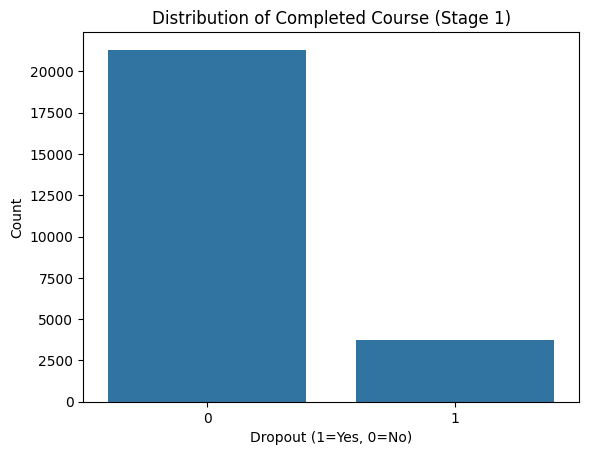

Target class (Class 1) distribution (Stage 1):
CompletedCourse
0    0.850194
1    0.149806
Name: proportion, dtype: float64


In [108]:
sns.countplot(x='CompletedCourse', data=academic_df)
plt.title('Distribution of Completed Course (Stage 1)')
plt.xlabel('Dropout (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

print("Target class (Class 1) distribution (Stage 1):")
print(academic_df['CompletedCourse'].value_counts(normalize=True))

### Training/Test Split

In [109]:
# Split data into 80% train and 20% test (as per rubric)
X3 = academic_df.drop("CompletedCourse", axis=1)
y3 = academic_df["CompletedCourse"]

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, stratify=y1, random_state=42
)

print(f"Train shape: {X3_train.shape}, Test shape: {X3_test.shape}")

Train shape: (20047, 394), Test shape: (5012, 394)


### Scaling for NN

In [110]:
#Scale the data
# Identify numeric columns (excluding binary)
numerics_s3 = X3_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

#Exclude binary columns (i.e., exactly 2 unique values)
numeric_cols_s3 = [col for col in numerics_s3 if X3_train[col].nunique() > 2]

print("Numeric columns to scale:", numeric_cols_s3)

# Scale numeric features using StandardScaler
scaler = StandardScaler()

X3_train_scaled = X3_train.copy()
X3_test_scaled = X3_test.copy()

X3_train_scaled[numeric_cols_s3] = scaler.fit_transform(X3_train[numeric_cols_s3])
X3_test_scaled[numeric_cols_s3] = scaler.transform(X3_test[numeric_cols_s3])

Numeric columns to scale: ['CourseLevel', 'AssessedModules', 'PassedModules', 'FailedModules', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age']


##  Predict Dropouts with XGBoost Model

### XGBoost Without Tuning

In [111]:
## Class Imbalance Handling Setup
pos,neg =y3_train.value_counts().sort_index()
scale_pos_weight_s3=neg/pos
print(f"Class Imbalance Ratio (scale_pos_weight): {scale_pos_weight_s3:.2f}")

Class Imbalance Ratio (scale_pos_weight): 0.18


---  XGBoost - No Tuning   (Stage 3) ---
Accuracy: 0.9646847565841979
Precision: 0.9815436241610739
Recall: 0.7789613848202397
ROC AUC: 0.8881899155971651


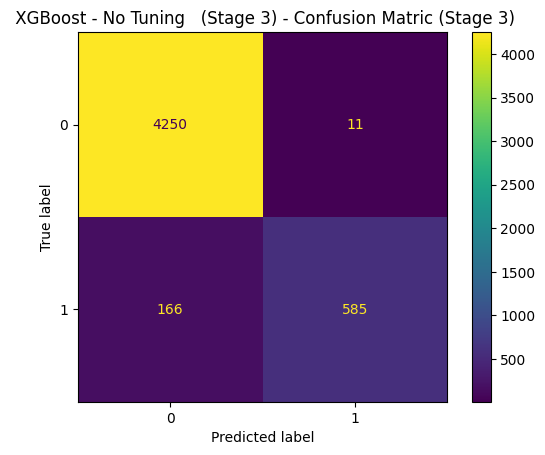

In [112]:
## XGBoost Baseline Model (Weighted)
xgb_weighted_s3 = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight_s3, random_state=42)
xgb_weighted_s3.fit(X3_train, y3_train)
y3_pred_weighted = xgb_weighted_s3.predict(X3_test)

def evaluate_model(name, y3_true, y3_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y3_true, y3_pred))
    print ("Precision:", precision_score (y3_true, y3_pred))
    print("Recall:", recall_score(y3_true, y3_pred))
    print("ROC AUC:", roc_auc_score(y3_true, y3_pred))
    ConfusionMatrixDisplay.from_predictions(y3_true, y3_pred)
    plt.title(f"{name} - Confusion Matric (Stage 3)")
    plt.show()

evaluate_model(" XGBoost - No Tuning   (Stage 3)", y3_test, y3_pred_weighted)

The Stage 3 baseline model (without tuning) offers a significant leap in predictive performance, particularly for dropout identification.

Recall improves (from previous stage baseline) from 0.30 → 0.883, meaning the model is now catching more actual dropouts. Precision jumps from 0.90 → 0.98, indicating that nearly all students flagged as at risk truly are.

The model makes very few false positive predictions (only 11) while still identifying 585 true dropouts



### XGBoost With Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters after Tuning (Weighted, Stage 3):
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'scale_pos_weight': 0.17619103496831728}

Classification Report at Threshold = 0.2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4261
           1       0.94      0.83      0.88       751

    accuracy                           0.97      5012
   macro avg       0.95      0.91      0.93      5012
weighted avg       0.97      0.97      0.97      5012



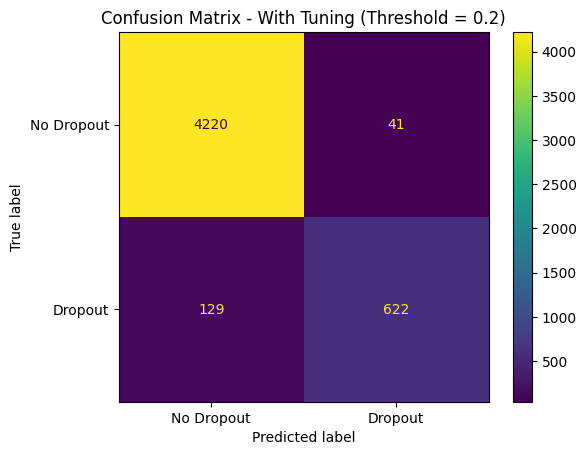

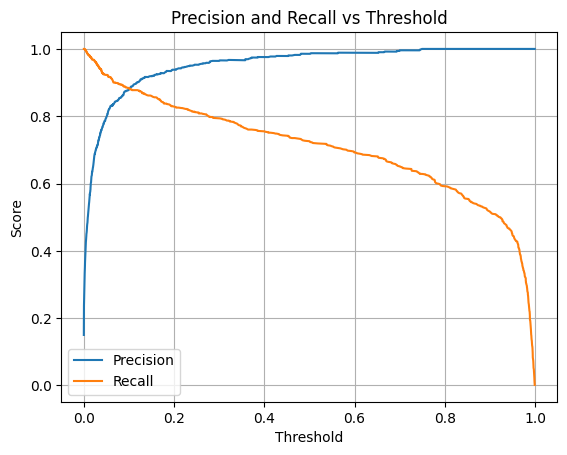

In [113]:
#Model tuning
param_grid_s3 = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 150],
    'scale_pos_weight': [scale_pos_weight_s3]
}

xgb_grid_s3 = XGBClassifier(eval_metric='logloss', random_state=42)
grid_search_s3 = GridSearchCV(xgb_grid_s3, param_grid_s3, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_s3.fit(X3_train, y3_train)

print("Best Parameters after Tuning (Weighted, Stage 3):")
print(grid_search_s3.best_params_)

# Evaluate best estimator
xgb_best_s3 = grid_search_s3.best_estimator_

# Predict probabilities for dropout (class 1)
y3_proba = xgb_best_s3.predict_proba(X3_test)[:, 1]

# Apply custom threshold
threshold = 0.2
y3_pred_custom = (y3_proba >= threshold).astype(int)

# Evaluation
print(f"\nClassification Report at Threshold = {threshold}")
print(classification_report(y3_test, y3_pred_custom))

# Confusion matrix
cm = confusion_matrix(y3_test, y3_pred_custom)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Dropout", "Dropout"]).plot()
plt.title(f"Confusion Matrix - With Tuning (Threshold = {threshold})")
plt.show()

# Visualize precision-recall vs threshold
precision, recall, thresholds = precision_recall_curve(y3_test, y3_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


At a lower threshold of 0.2, the model becomes more sensitive, correctly identifying 83% of actual dropouts. While false positives (predicting dropout when it wasn't) slightly increase to 41, false negatives drop to 129 — showing the model is now catching more at-risk students.

Precision remains very high (93.8%), meaning most of the students predicted as dropouts are indeed at risk.

F1 score (0.88) reflects a strong balance between precision and recall.

### Tuned vs Without Tunning XGBoost Comparison

                            Model  Threshold  Accuracy  Precision (Dropout)  \
0   XGBoots - Without Tuning (S1)        0.5  0.867518             0.837209   
1            XGBoots - Tuned (S1)        0.2  0.893057             0.724426   
2  XGBoots - Without Tuning (S2))        0.5  0.891061             0.905138   
3            XGBoots - Tuned (S2)        0.2  0.906026             0.770270   
4   XGBoots - Without Tuning (S3)        0.5  0.964685             0.981544   
5            XGBoots - Tuned (S3)        0.2  0.966081             0.938160   

   Recall (Dropout)  F1 (Dropout)   ROC AUC  
0          0.143808      0.245455  0.569440  
1          0.462051      0.564228  0.884788  
2          0.304927      0.456175  0.649647  
3          0.531292      0.628842  0.915800  
4          0.778961           NaN  0.888190  
5          0.828229           NaN  0.988938  


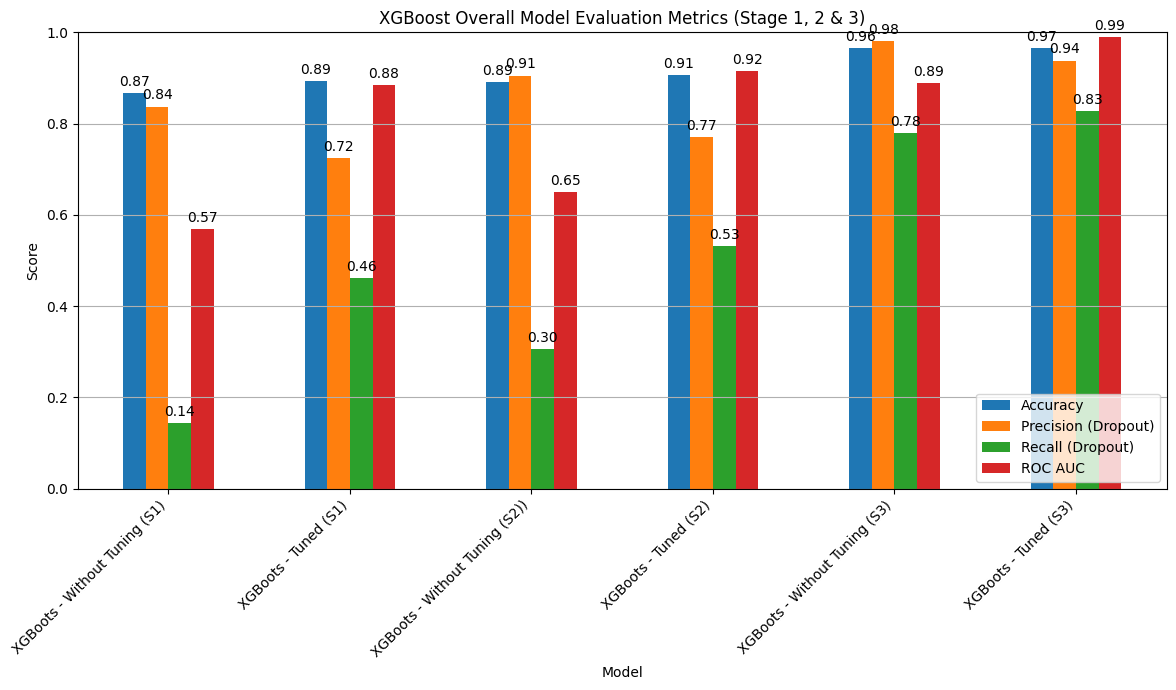

In [114]:
# Compare stage 1, stage 2 and Stage 3 XGBoost Models, before and after tuning
def compare_s1_s2_s3(model_name, model, X_test, y_test, threshold=None):
    if threshold is not None:
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred)

    return {
        "Model": model_name,
        "Threshold": threshold if threshold is not None else 0.5,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Dropout)": precision_score(y_test, y_pred, pos_label=1),
        "Recall (Dropout)": recall_score(y_test, y_pred, pos_label=1),
        "ROC AUC": roc_auc
    }

results = [
    compare_s1_s2("XGBoots - Without Tuning (S1)", xgb_weighted, X1_test, y1_test),
    compare_s1_s2("XGBoots - Tuned (S1)", xgb_best_s1, X1_test, y1_test, threshold=0.2),
    compare_s1_s2("XGBoots - Without Tuning (S2))", xgb_weighted_s2, X2_test, y2_test),
    compare_s1_s2 ("XGBoots - Tuned (S2)", xgb_best_s2, X2_test, y2_test, threshold=0.2),
    compare_s1_s2_s3("XGBoots - Without Tuning (S3)", xgb_weighted_s3, X3_test, y3_test),
    compare_s1_s2_s3 ("XGBoots - Tuned (S3)", xgb_best_s3, X3_test, y3_test, threshold=0.2)
]

comparison_s1_s2_s3 = pd.DataFrame(results)
print(comparison_s1_s2_s3)


# Define the metrics to plot - Corrected column names
metrics_to_plot = ["Accuracy", "Precision (Dropout)", "Recall (Dropout)", "ROC AUC"]

# Create the bar plot
compare_xgb_s1s2s3 = comparison_s1_s2_s3.set_index("Model")[metrics_to_plot].plot(kind='bar', figsize=(12, 7))

# Title and labels
plt.title("XGBoost Overall Model Evaluation Metrics (Stage 1, 2 & 3)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(True, axis='y')
plt.tight_layout()

# Add numeric value labels on each bar
for container in compare_xgb_s1s2s3.containers:
    compare_xgb_s1s2s3.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()

Performance Improves Across Stages. As we move from Stage 1 → Stage 2 → Stage 3, all key metrics improve significantly.

This reflects the increasing richness of features, especially with the addition of engagement (Stage 2) and academic performance data (Stage 3).

Tuning Has a Major Impact. In each stage, tuning leads to: Higher recall (better at identifying true dropouts). Improved AUC (better separation between classes). The trade-off is sometimes slightly lower precision, as the model becomes more sensitive and flags more students at risk.

**Stage 1**: data limited to basic demographic and course features. Baseline recall is very low (0.14), indicating poor ability to identify dropouts. Tuning improves recall to 0.46, but it’s still limited by feature quality.

**Stage 2** :  engagement features are added, leading to better recall (0.53 after tuning) and higher AUC (0.92). This stage marks a significant jump in dropout detection power, especially for early interventions.

**Stage 3**: includes academic performance data. Baseline recall jumps to 0.78, and tuning pushes it even higher to 0.83. Precision remains very high (0.94–0.98), and AUC reaches 0.99, indicating near-perfect classification ability.

### Feature Importance

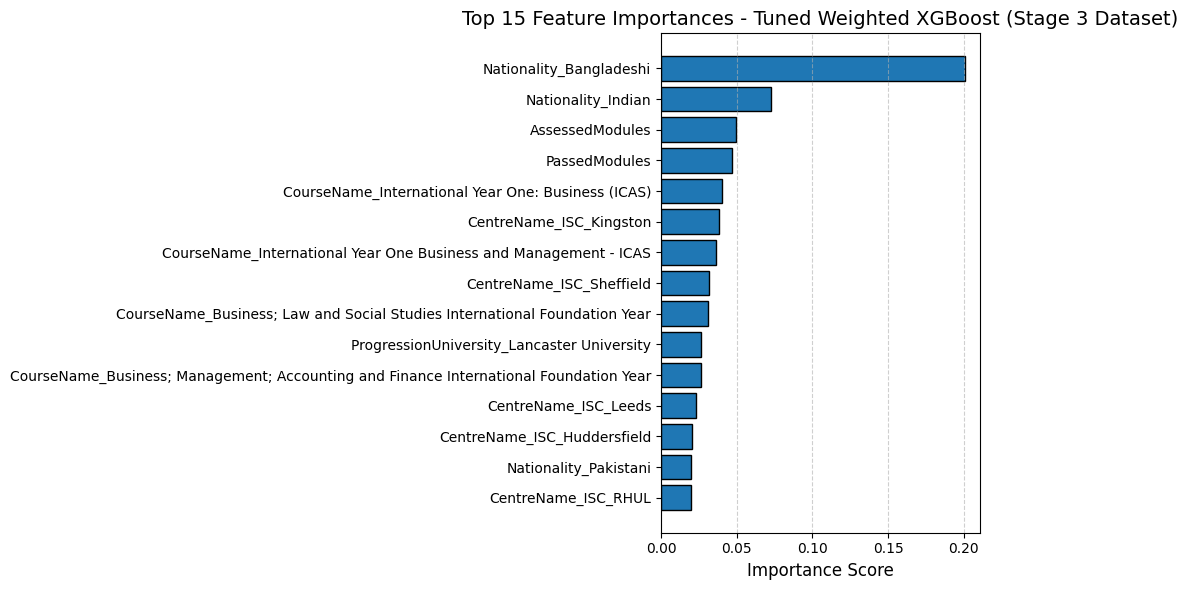

In [115]:
# Create DataFrame with feature importances
feature_importance_s3 = pd.DataFrame({
    'Feature': X3_train.columns,
    'Importance': xgb_best_s3.feature_importances_
})

# Sort and select top 15
top_features_s3 = feature_importance_s3.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features_s3['Feature'], top_features_s3['Importance'], edgecolor='black')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Tuned Weighted XGBoost (Stage 3 Dataset)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### SHAP

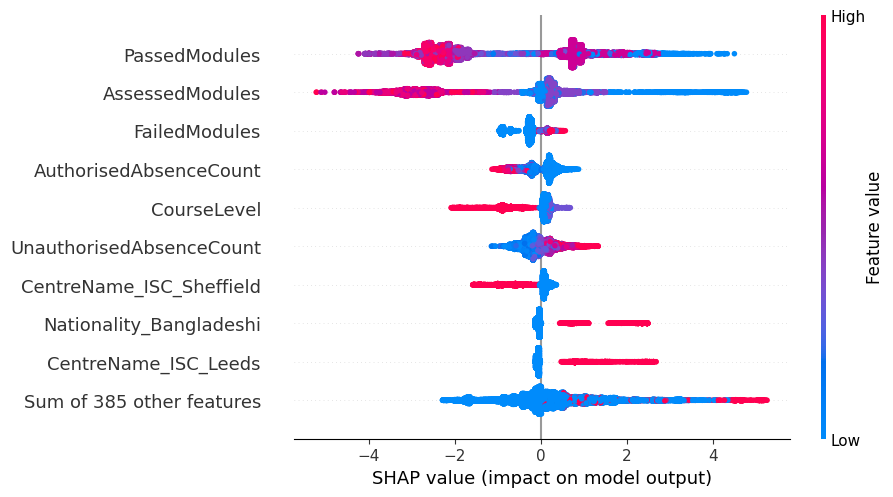

In [116]:
explainer_s3 = shap.Explainer(xgb_best_s3)
shap_s3 = explainer_s3(X3_train)


# Beeswarm plot
shap.plots.beeswarm(shap_s3)


Feature Importance highlights nationality as the most important feature in prediction. FI represents how much the feature was used to make split in trees (weights) and hence, can overestimate categorical/dummy features with many levels. While SHAP is data-centric and measures actual contribution of each feature, as suggested, students’ academic data shifts predictions. For example, students who passed (“PassedModules”) more modules are less likely to dropout “Passed Modules”  and students being assessed (“BeingAssessed”) in more modules may suggests high engagement.

## Predict Dropouts with Neural Networks

In [117]:
print(X3_train_scaled.shape, y3_train.shape)

(20047, 394) (20047,)


### NN Without Optimisation

In [118]:
#Compute class weights
cw_3 = compute_class_weight(class_weight='balanced', classes=np.unique(y3_train), y=y3_train)
cw_dict_3 = dict(enumerate(cw_3))

In [119]:
# Define models

# Model without regularization
def model_no_reg_s3(input_dim, hidden_units, learning_rate):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model


# Model with L2 regularization
def model_l2_s3(input_dim, hidden_units, learning_rate, l2_lambda):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))
    for units in hidden_units:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])
    return model

In [120]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Evaluate model
def evaluate_model(model, X, y, threshold=0.5, label="Model"):
    y_prob = model.predict(X).ravel()
    y_pred = (y_prob >= threshold).astype(int)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall   :", recall_score(y, y_pred))
    print("F1 Score :", f1_score(y, y_pred))
    print("AUC      :", roc_auc_score(y, y_prob))
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"{label} - Confusion Matrix")
    plt.show()
    return y_pred, y_prob

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


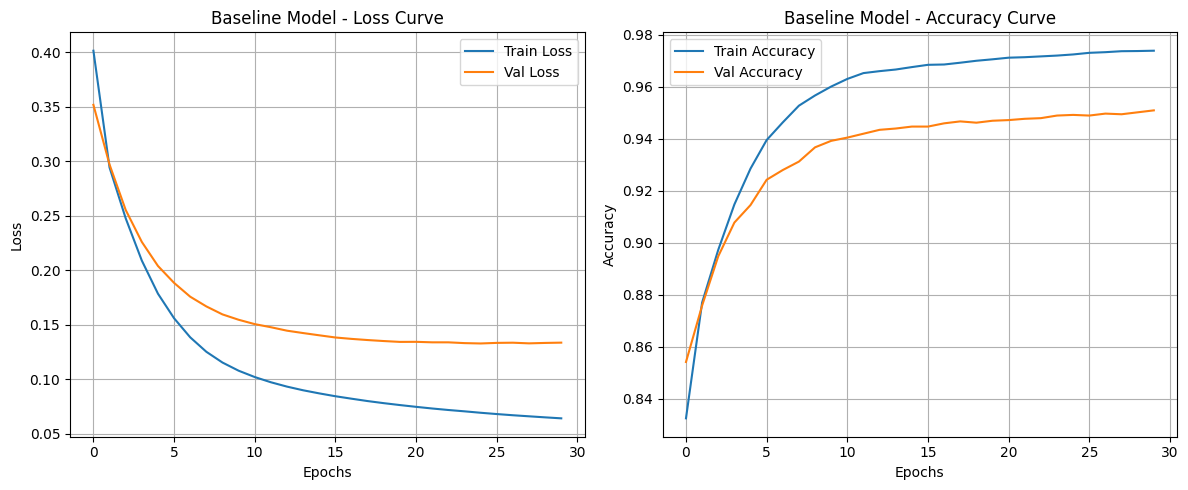

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Baseline Model (Stage 3) ===
Accuracy : 0.952513966480447
Precision: 0.7958477508650519
Recall   : 0.918774966711052
F1 Score : 0.8529048207663782
AUC      : 0.9830450582826119


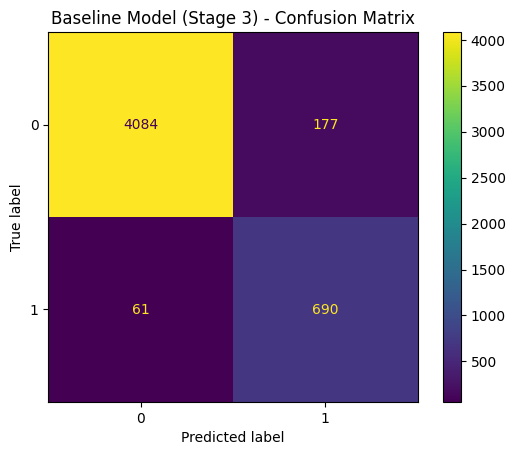

(array([0, 0, 0, ..., 0, 0, 0]),
 array([6.12210541e-04, 2.43374734e-06, 1.45918969e-03, ...,
        1.18893484e-04, 9.35323915e-05, 2.06554607e-01], dtype=float32))

In [121]:
# Baseline model training
tf.random.set_seed(42)
baseline_model_s3 = model_no_reg_s3(X3_train_scaled.shape[1], hidden_units=(32,), learning_rate=0.001)
baseline_history = baseline_model_s3.fit(
    X3_train_scaled, y3_train,
    epochs=30,
    batch_size=32,
    class_weight=cw_dict_3,
    validation_split=0.2,
    verbose=0
)

plot_history(baseline_history, "Baseline Model")
evaluate_model(baseline_model_s3, X3_test_scaled, y3_test, label="Baseline Model (Stage 3)")

The Stage 3 neural network model (without tuning) shows strong performance improvements. The confusion matrix reveals a high true positive count (TP = 690) and a significantly reduced false negative rate (FN = 61), while false positives (FP = 177) also remain low. The training and validation curves indicate good generalization, with both losses decreasing steadily and no sign of overfitting. Validation accuracy stabilizes above 94%, close to training accuracy, suggesting the model is well-tuned and effectively captures the underlying patterns without memorizing the training data.


### NN With Optimisation


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


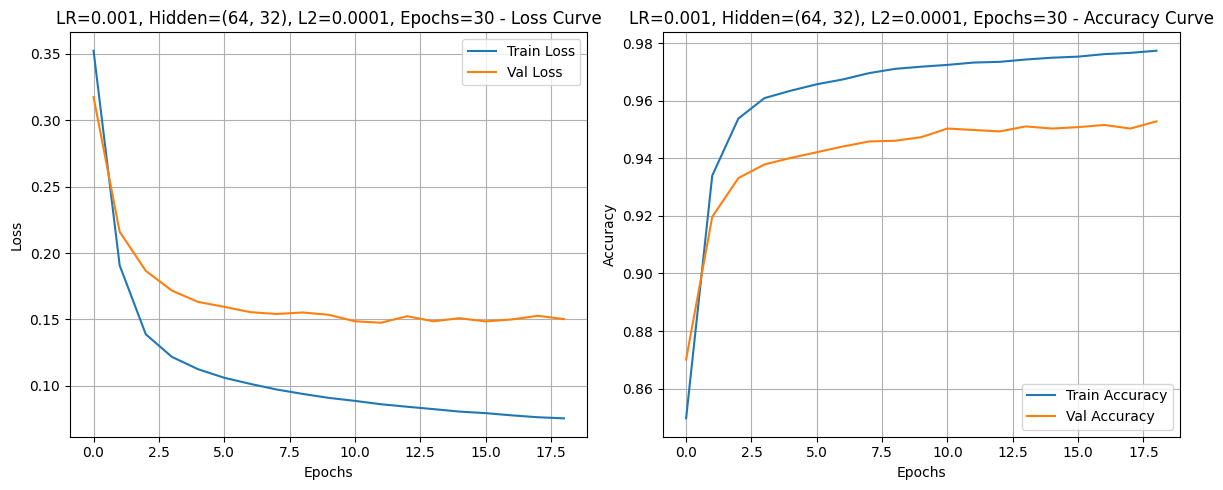

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.9515163607342378
Precision: 0.7815964523281597
Recall   : 0.9387483355525965
F1 Score : 0.852994555353902
AUC      : 0.989171599722626


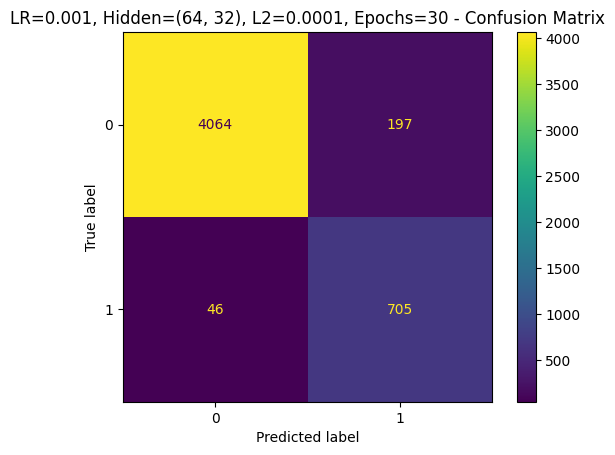


Training: LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


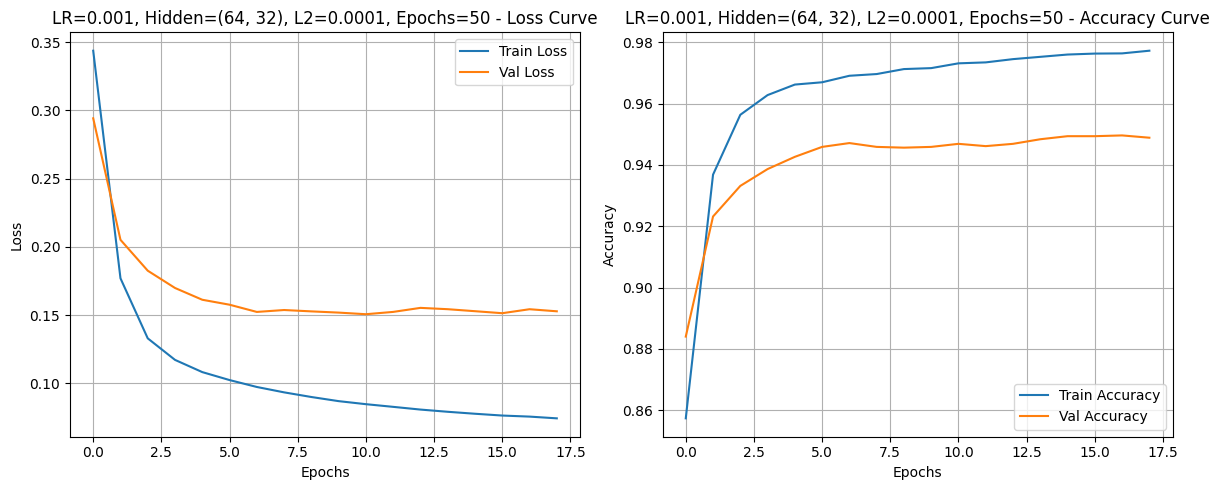

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.9481245011971269
Precision: 0.7718715393133998
Recall   : 0.9280958721704394
F1 Score : 0.8428053204353083
AUC      : 0.9877378546511246


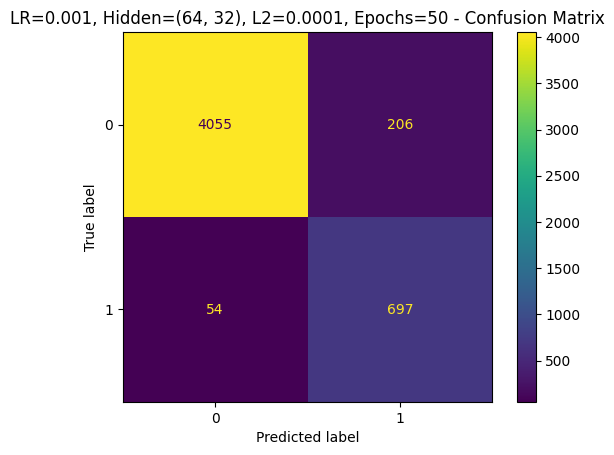


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


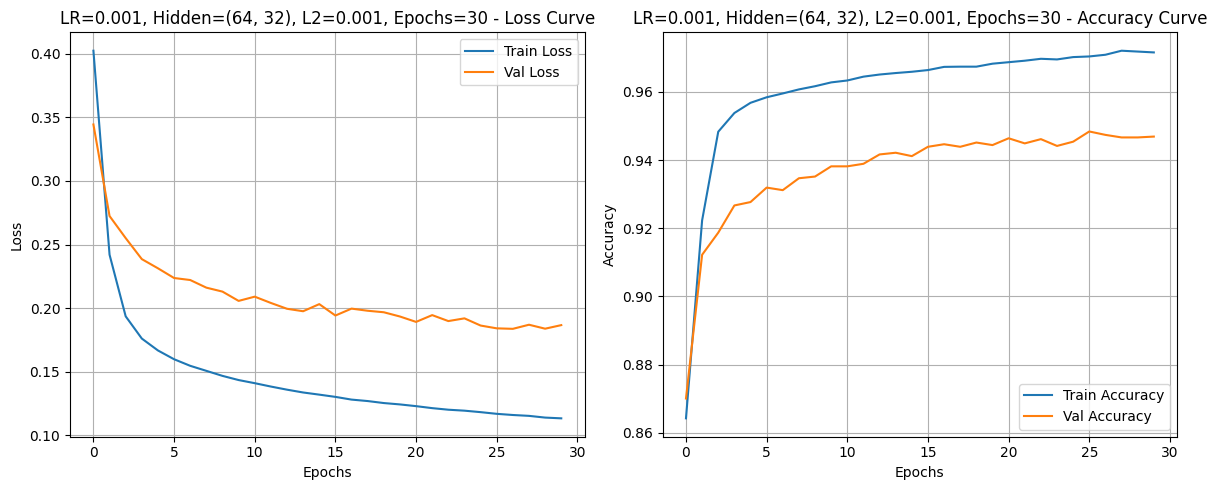

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.9511173184357542
Precision: 0.7768052516411379
Recall   : 0.9454061251664447
F1 Score : 0.8528528528528528
AUC      : 0.9882475403990799


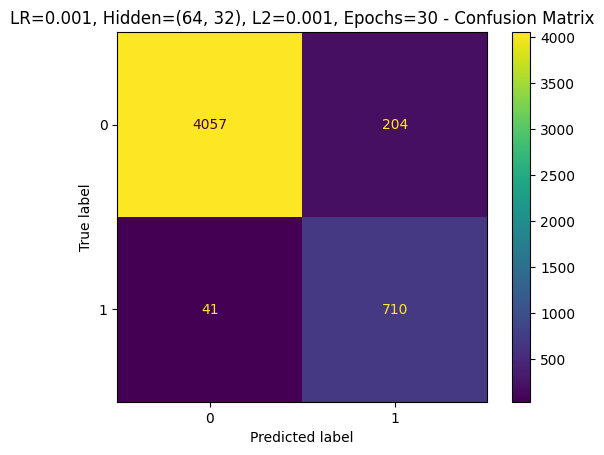


Training: LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


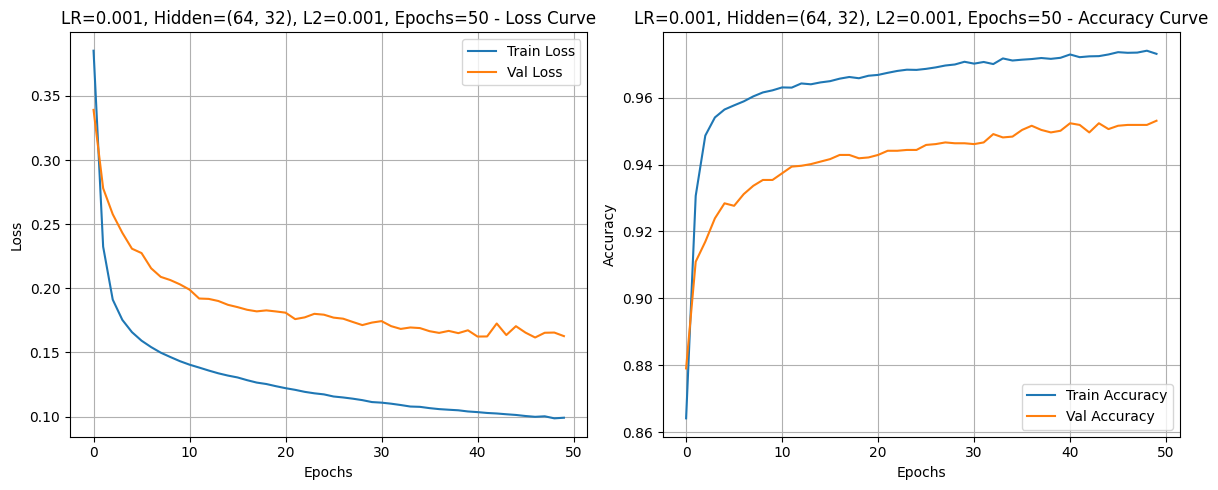

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.9543096568236233
Precision: 0.8
Recall   : 0.9267643142476698
F1 Score : 0.8587291795188156
AUC      : 0.9861437976306956


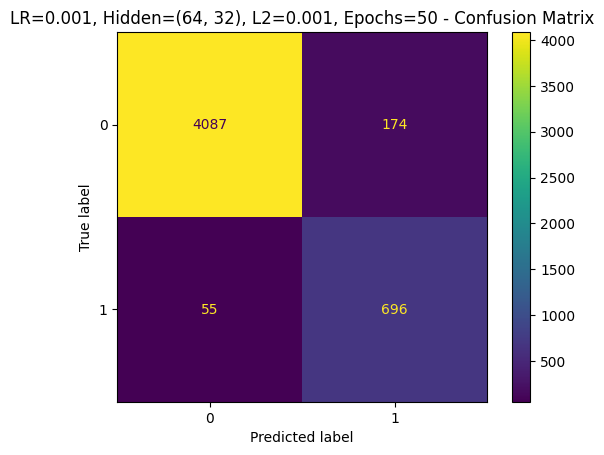


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


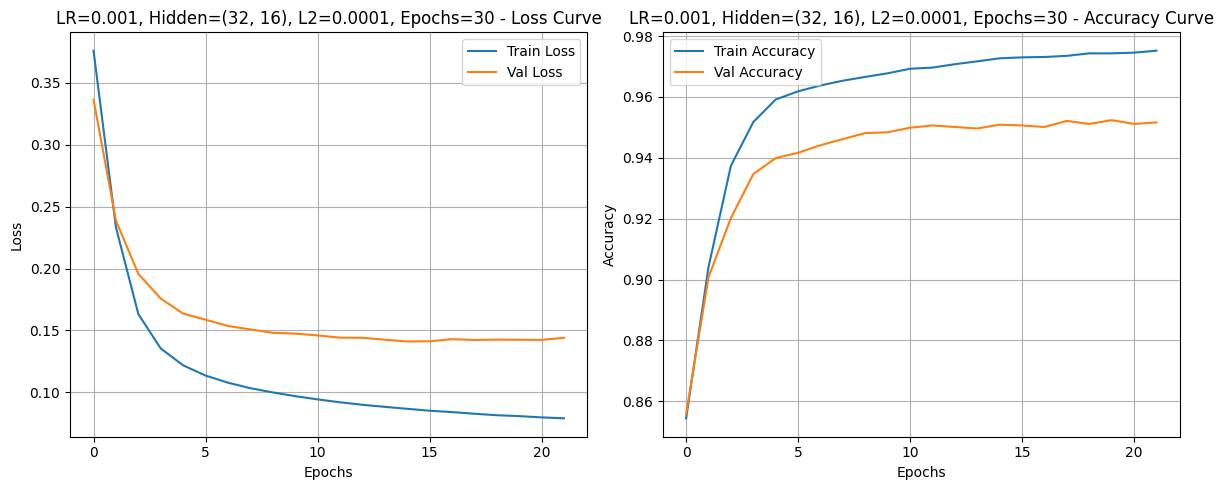

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.9531125299281724
Precision: 0.7905405405405406
Recall   : 0.9347536617842876
F1 Score : 0.8566198901769372
AUC      : 0.988150040734235


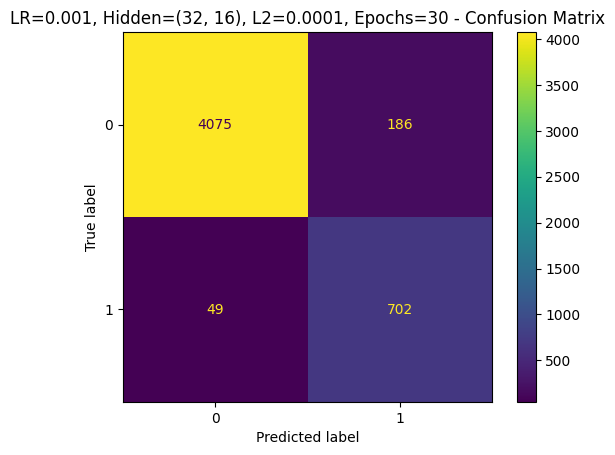


Training: LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


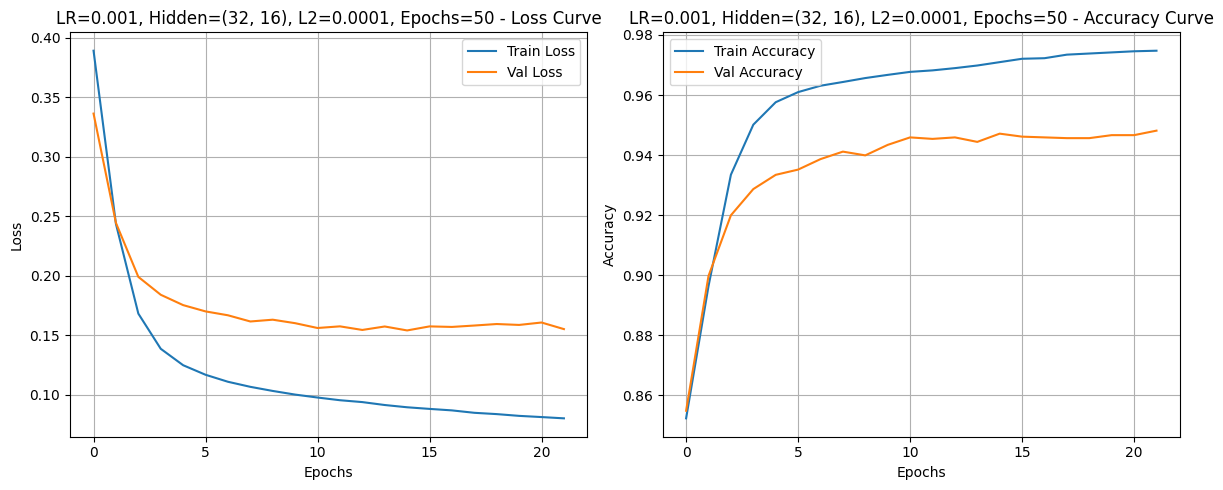

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.9463288108539505
Precision: 0.7563829787234042
Recall   : 0.9467376830892144
F1 Score : 0.8409225310467179
AUC      : 0.9883387900854089


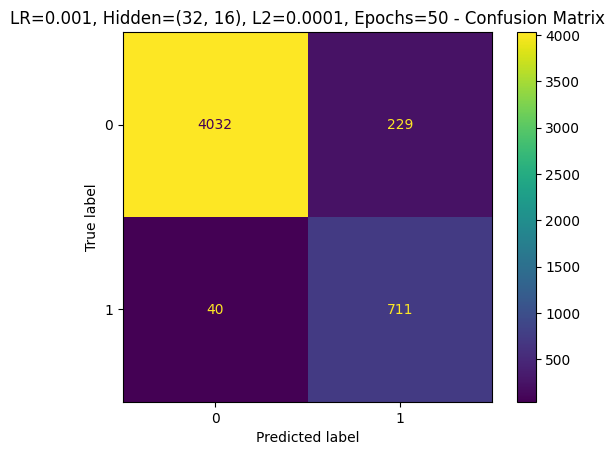


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


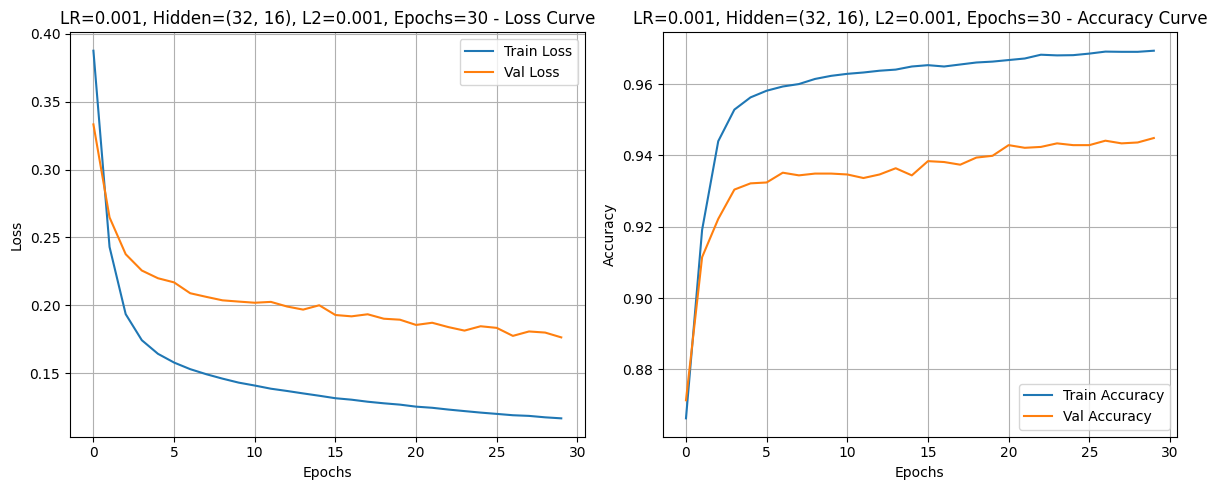

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.9463288108539505
Precision: 0.759698275862069
Recall   : 0.9387483355525965
F1 Score : 0.8397855866587254
AUC      : 0.989173162217255


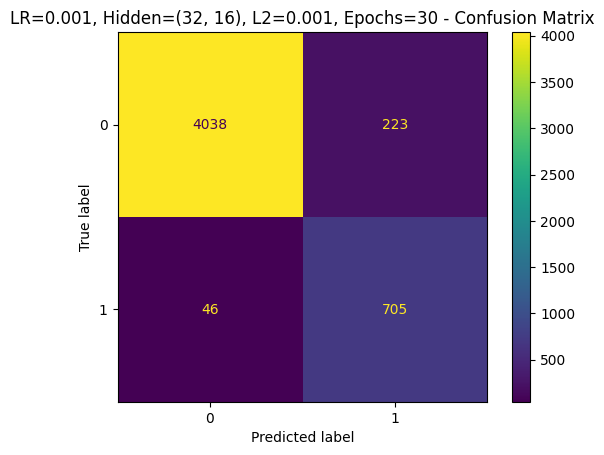


Training: LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


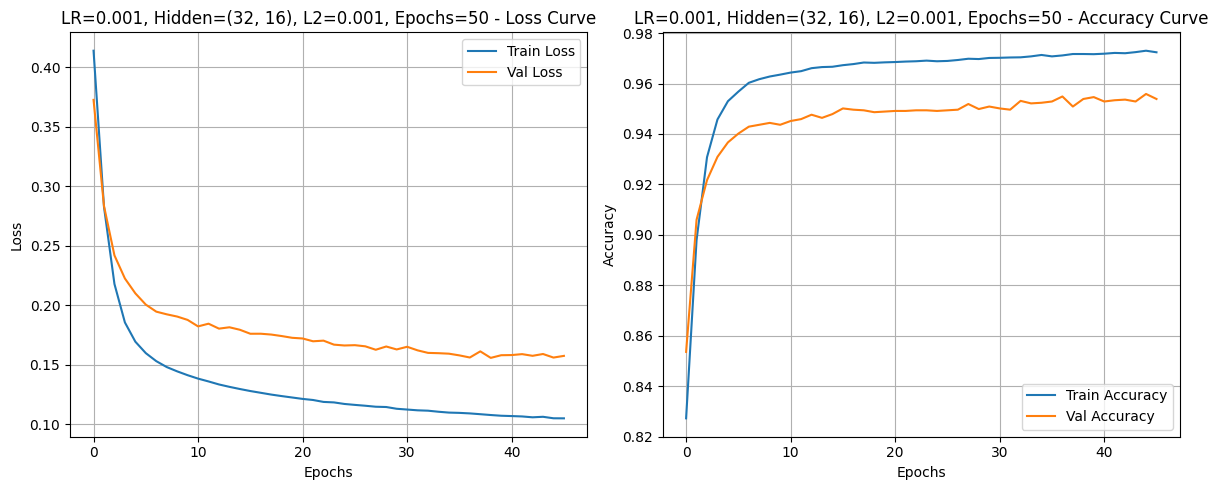

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.9543096568236233
Precision: 0.7972665148063781
Recall   : 0.9320905459387483
F1 Score : 0.8594229588704727
AUC      : 0.9890472251501636


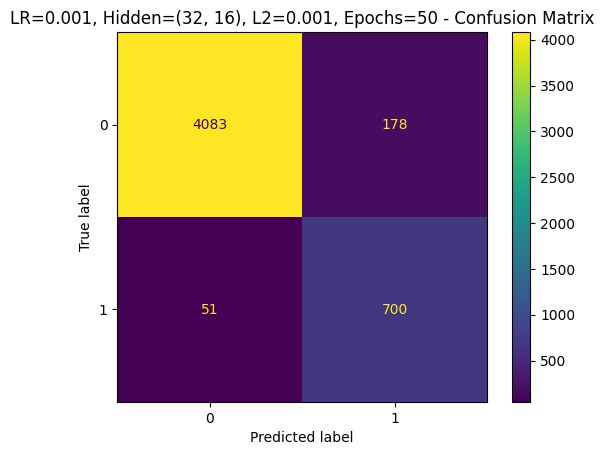


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


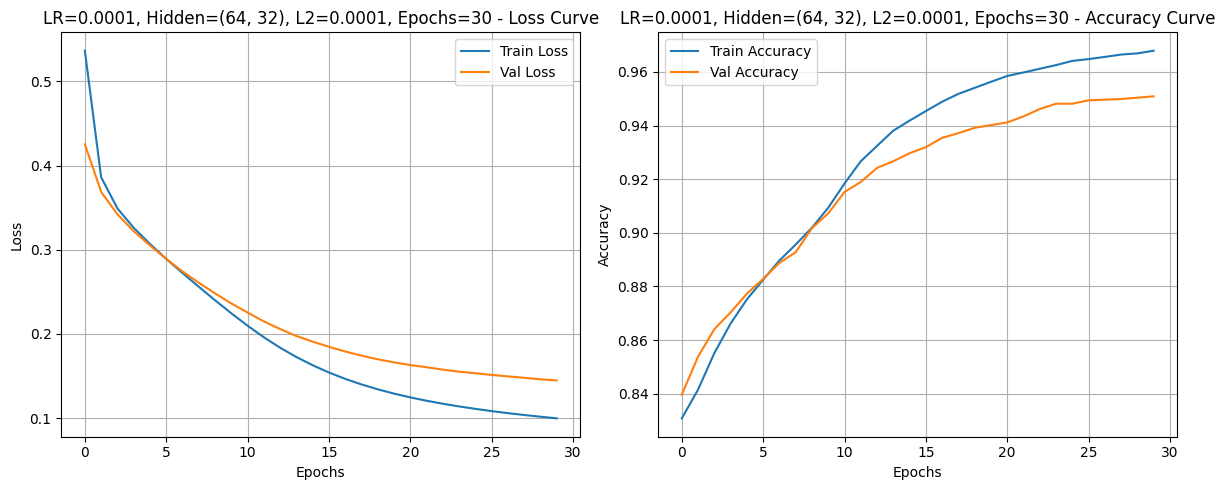

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=30 ===
Accuracy : 0.9533120510774142
Precision: 0.7914317925591883
Recall   : 0.9347536617842876
F1 Score : 0.8571428571428571
AUC      : 0.9876191050593264


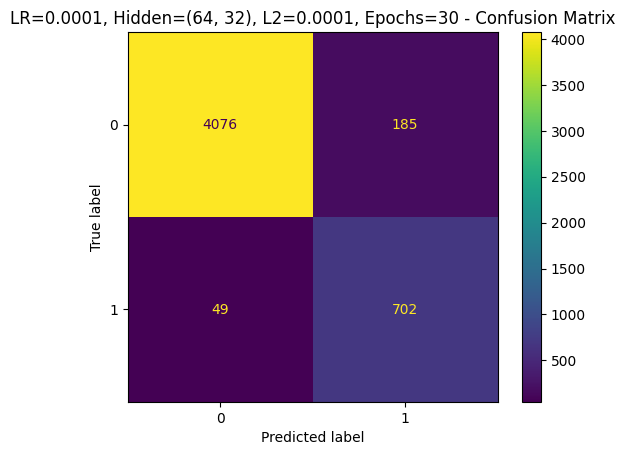


Training: LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


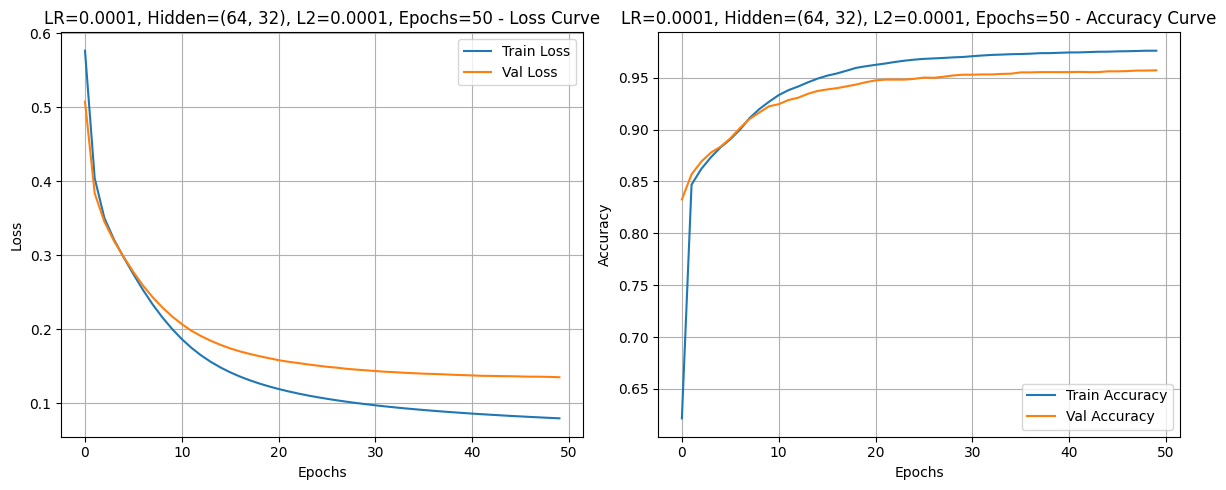

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50 ===
Accuracy : 0.9565043894652833
Precision: 0.810244470314319
Recall   : 0.9267643142476698
F1 Score : 0.8645962732919255
AUC      : 0.9890653500878591


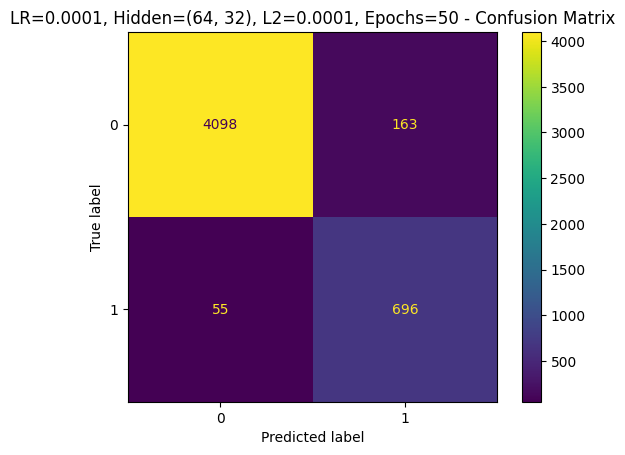


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


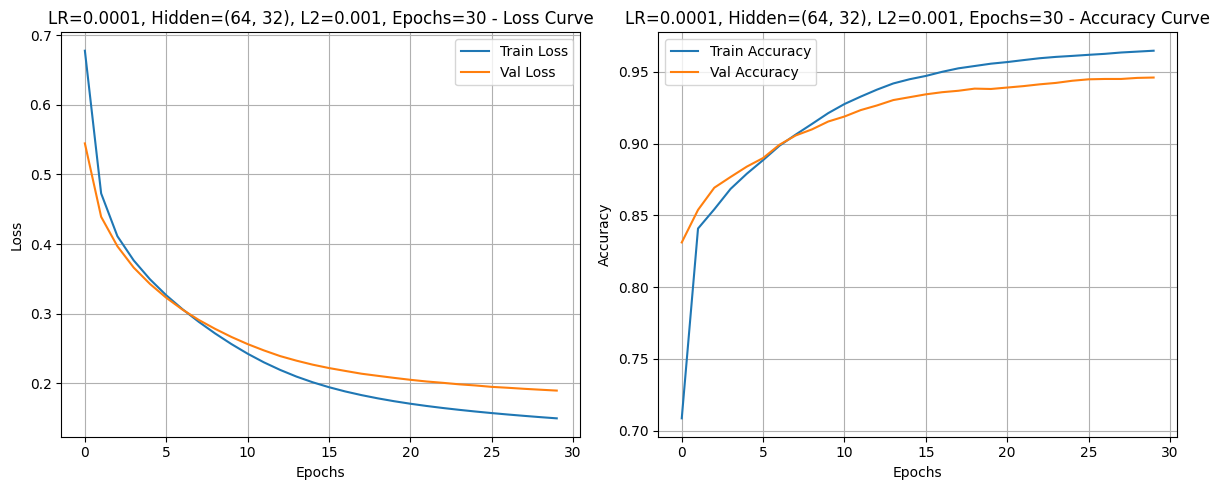

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=30 ===
Accuracy : 0.9485235434956105
Precision: 0.7647690655209453
Recall   : 0.948069241011984
F1 Score : 0.8466111771700356
AUC      : 0.9894925361194071


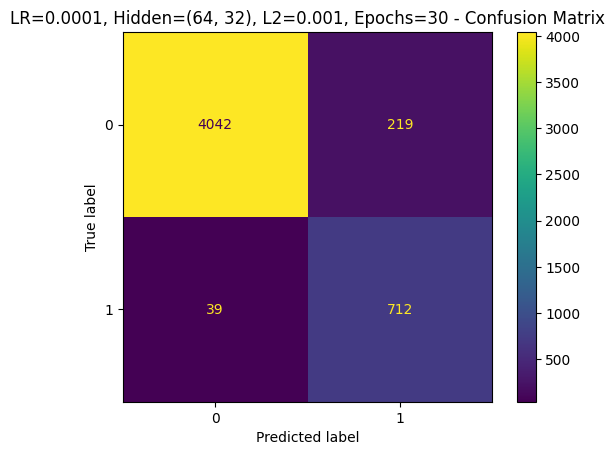


Training: LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


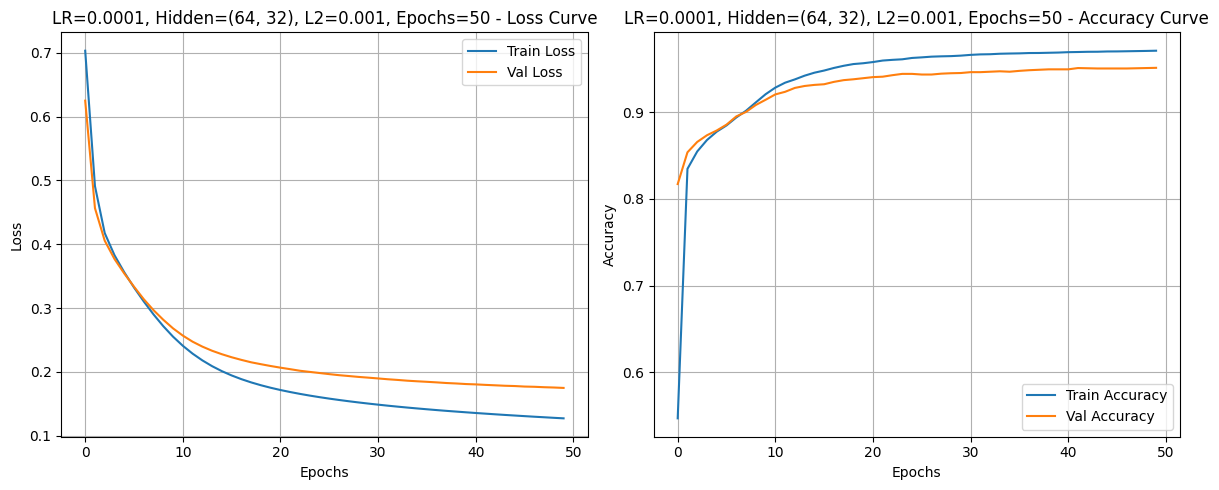

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(64, 32), L2=0.001, Epochs=50 ===
Accuracy : 0.9533120510774142
Precision: 0.7850055126791621
Recall   : 0.948069241011984
F1 Score : 0.8588661037394452
AUC      : 0.9897734726536876


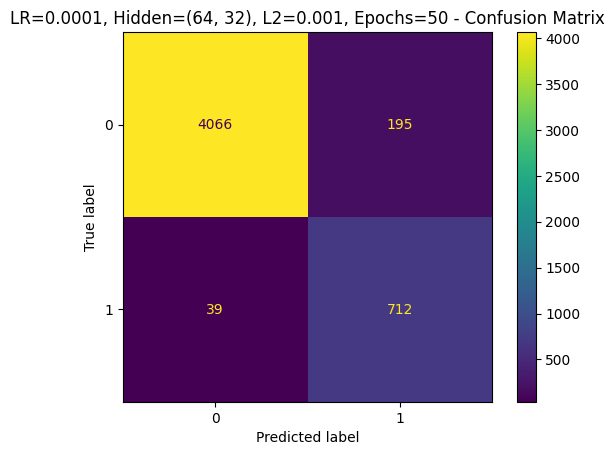


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


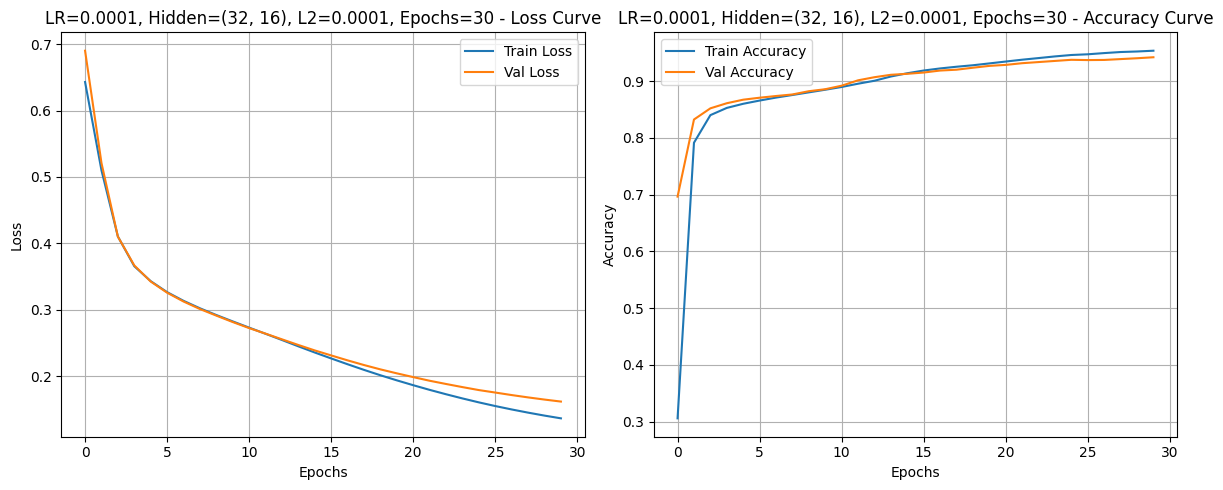

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=30 ===
Accuracy : 0.9405426975259378
Precision: 0.7386722866174921
Recall   : 0.933422103861518
F1 Score : 0.8247058823529412
AUC      : 0.9837050560138699


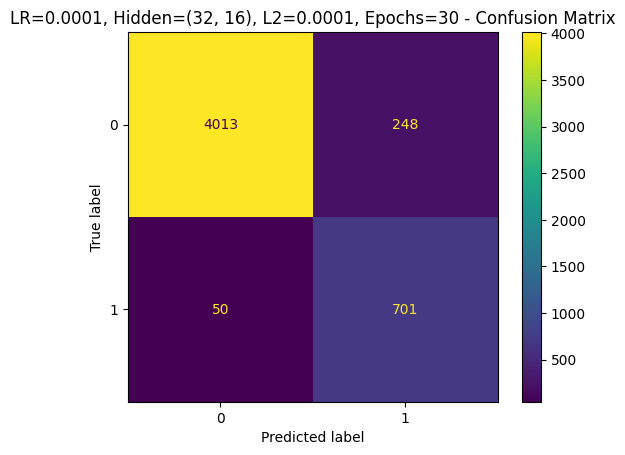


Training: LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


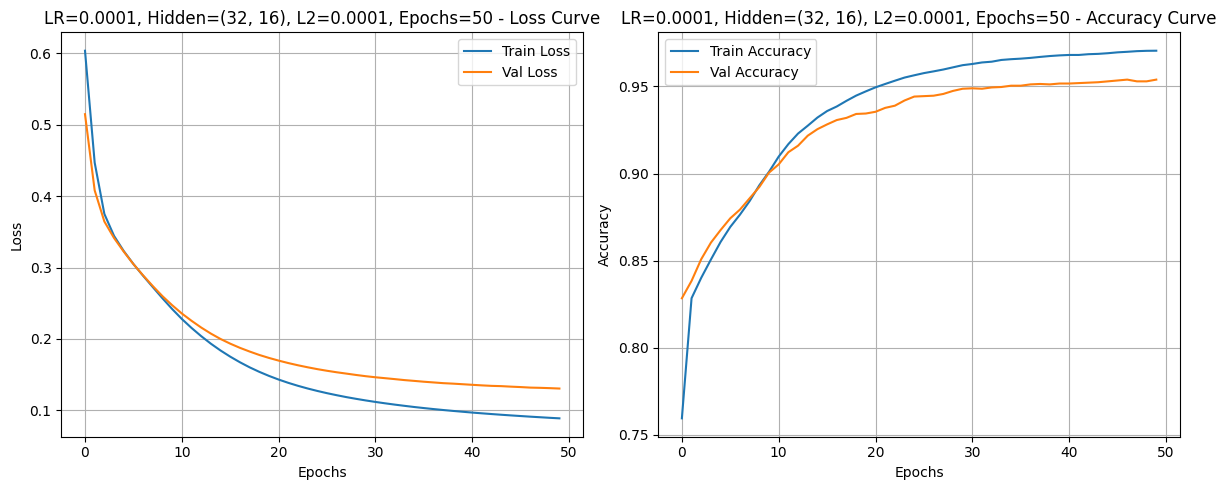

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50 ===
Accuracy : 0.9553072625698324
Precision: 0.8004561003420753
Recall   : 0.9347536617842876
F1 Score : 0.8624078624078624
AUC      : 0.9887106638070932


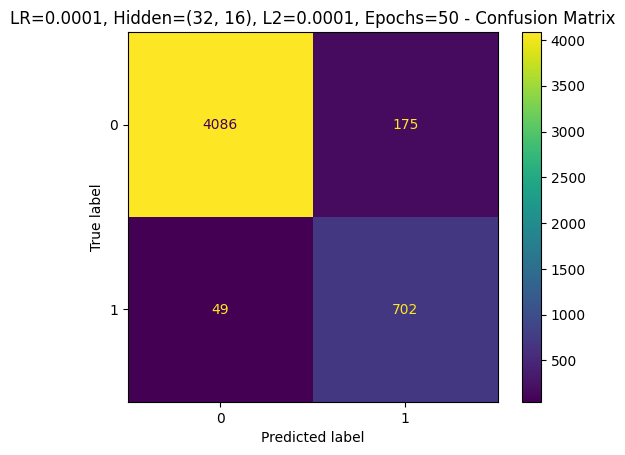


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


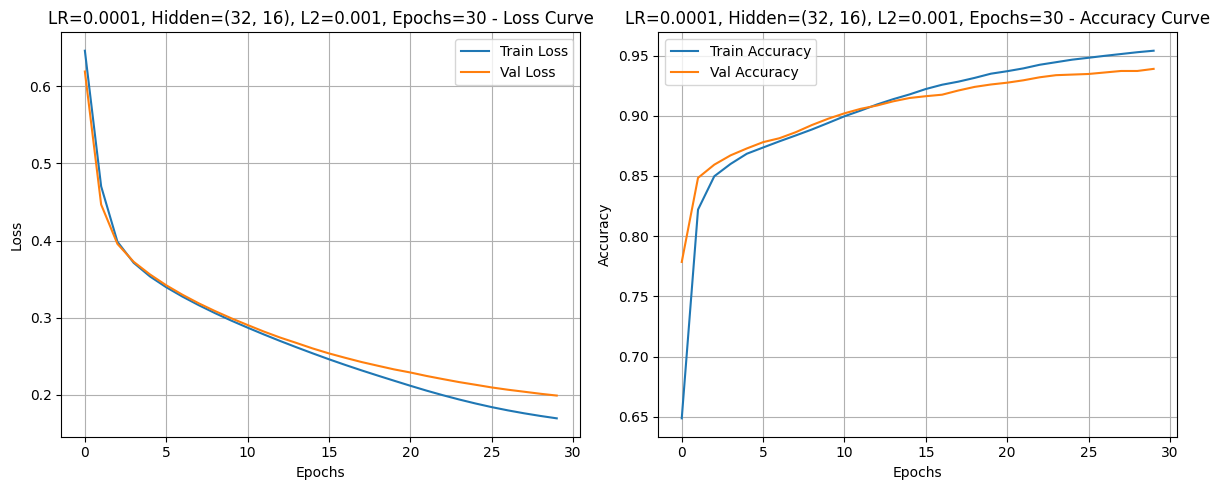

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=30 ===
Accuracy : 0.9395450917797287
Precision: 0.7328482328482329
Recall   : 0.9387483355525965
F1 Score : 0.8231173380035026
AUC      : 0.9855369247168213


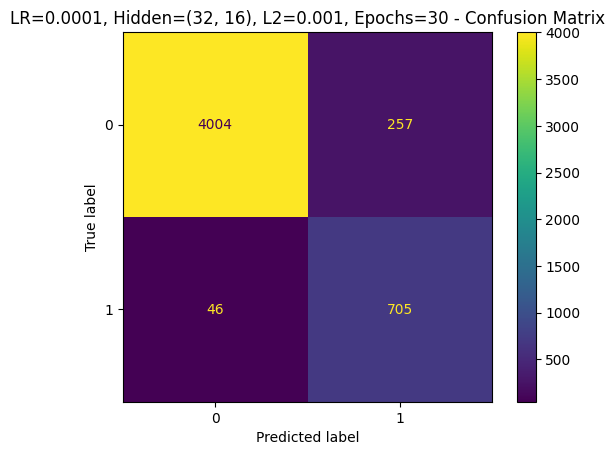


Training: LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


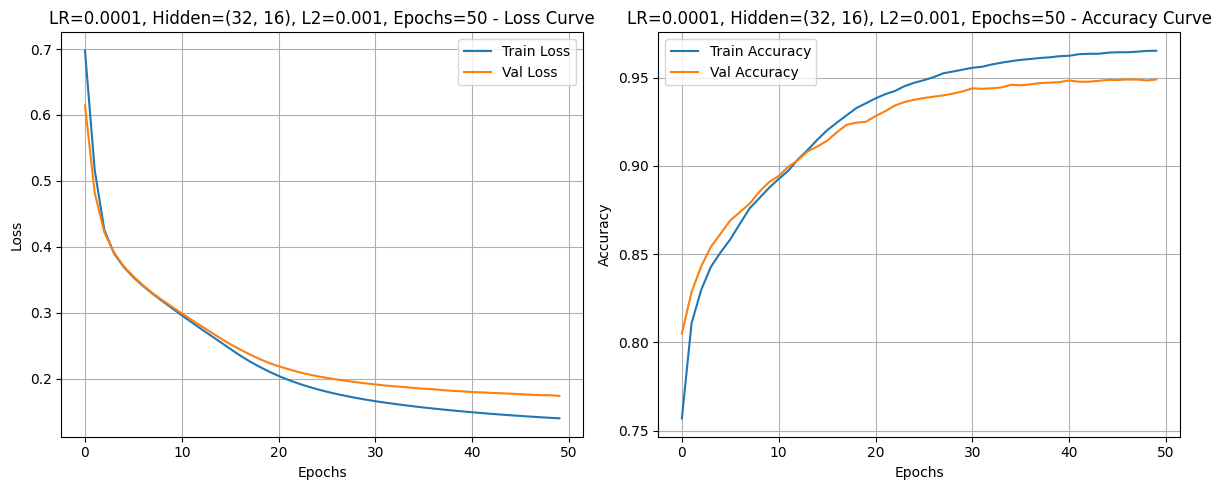

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== LR=0.0001, Hidden=(32, 16), L2=0.001, Epochs=50 ===
Accuracy : 0.951316839584996
Precision: 0.7794928335170893
Recall   : 0.9414114513981359
F1 Score : 0.8528347406513872
AUC      : 0.9892459744669627


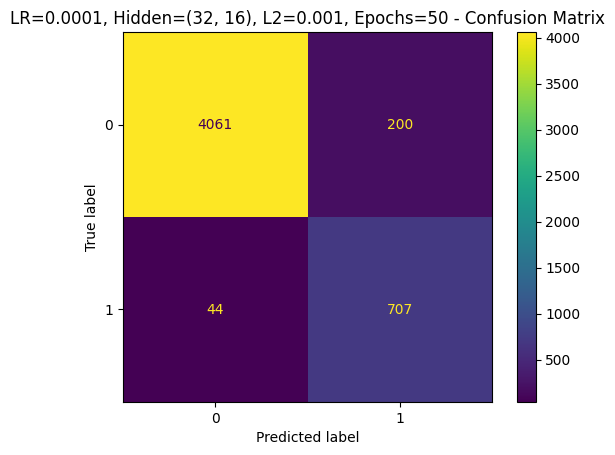

In [122]:
# Manual Grid Search with Early Stopping
results_s3 = []
learning_rates = [0.001, 0.0001]
hidden_layer_options = [(64, 32), (32, 16)]
l2_lambdas = [1e-4, 1e-3]
epoch_options = [30, 50]
batch_size = 32

# EarlyStopping configuration
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=0
)

for lr in learning_rates:
    for hidden_units in hidden_layer_options:
        for l2_lambda in l2_lambdas:
            for epochs in epoch_options:
                label = f"LR={lr}, Hidden={hidden_units}, L2={l2_lambda}, Epochs={epochs}"
                print(f"\nTraining: {label}")

                model = model_l2_s3(X3_train_scaled.shape[1], hidden_units, lr, l2_lambda)

                history = model.fit(
                    X3_train_scaled, y3_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    class_weight=cw_dict_3,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0
                )

                plot_history(history, label)

                y_pred, y_prob = evaluate_model(model, X3_test_scaled, y3_test, threshold=0.5, label=label)

                results_s3.append({
                    "Label": label,
                    "Accuracy": accuracy_score(y3_test, y_pred),
                    "Precision": precision_score(y3_test, y_pred),
                    "Recall": recall_score(y3_test, y_pred),
                    "F1 Score": f1_score(y3_test, y_pred),
                    "AUC": roc_auc_score(y3_test, y_prob)
                })

### Baseline vs Optimised Model Comparison

In [123]:
# Results Comparison
results_df_s3 = pd.DataFrame(results_s3)
results_df_s3 = results_df_s3.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\nTop Models by F1 Score:")
print(results_df_s3.head(3))


Top Models by F1 Score:
                                              Label  Accuracy  Precision  \
0  LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=50  0.956504   0.810244   
1  LR=0.0001, Hidden=(32, 16), L2=0.0001, Epochs=50  0.955307   0.800456   
2    LR=0.001, Hidden=(32, 16), L2=0.001, Epochs=50  0.954310   0.797267   

     Recall  F1 Score       AUC  
0  0.926764  0.864596  0.989065  
1  0.934754  0.862408  0.988711  
2  0.932091  0.859423  0.989047  


In [124]:
# Baseline vs Best Tuned Model Comparison (Stage 3)

y_baseline_prob = baseline_model_s3.predict(X3_test_scaled)
y_baseline_pred = (y_baseline_prob >= 0.5).astype(int)
best_model_metrics_s3 = results_df_s3.iloc[0]

print("\nComparison of Baseline vs Best Tuned Model (Stage 3):")
print(f"{'Metric':<12} | {'Baseline':<10} | {'Tuned':<10}")
print("-" * 40)
print(f"{'Accuracy':<12} | {accuracy_score(y3_test, y_baseline_pred):<10.4f} | {best_model_metrics_s3['Accuracy']:<10.4f}")
print(f"{'Precision':<12} | {precision_score(y3_test, y_baseline_pred):<10.4f} | {best_model_metrics_s3['Precision']:<10.4f}")
print(f"{'Recall':<12} | {recall_score(y3_test, y_baseline_pred):<10.4f} | {best_model_metrics_s3['Recall']:<10.4f}")
print(f"{'F1 Score':<12} | {f1_score(y3_test, y_baseline_pred):<10.4f} | {best_model_metrics_s3['F1 Score']:<10.4f}")
print(f"{'AUC':<12} | {roc_auc_score(y3_test, y_baseline_prob):<10.4f} | {best_model_metrics_s3['AUC']:<10.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Comparison of Baseline vs Best Tuned Model (Stage 3):
Metric       | Baseline   | Tuned     
----------------------------------------
Accuracy     | 0.9525     | 0.9565    
Precision    | 0.7958     | 0.8102    
Recall       | 0.9188     | 0.9268    
F1 Score     | 0.8529     | 0.8646    
AUC          | 0.9830     | 0.9891    


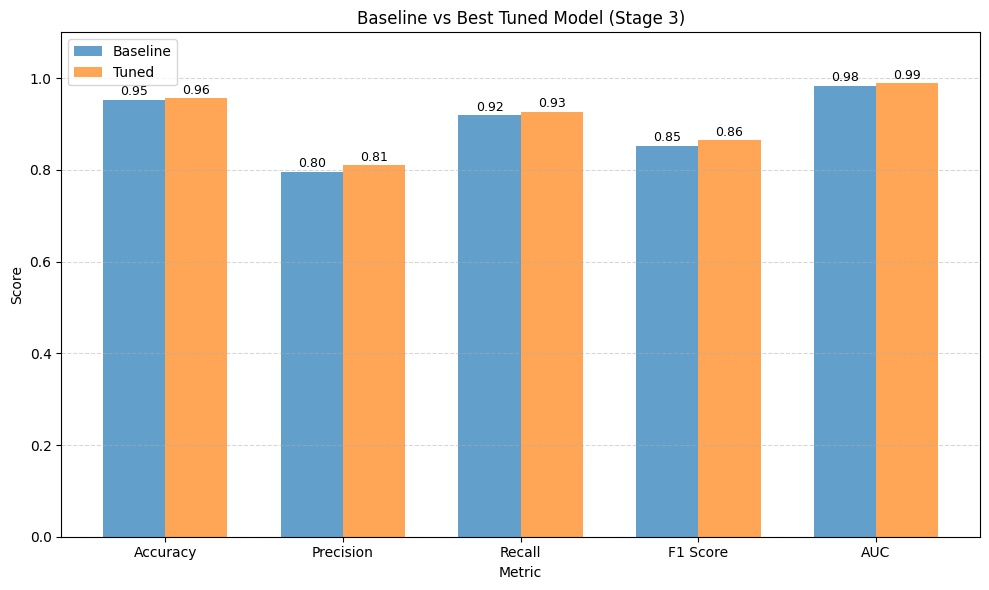

In [125]:

# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Values
baseline_values_s3 = [
    accuracy_score(y3_test, y_baseline_pred),
    precision_score(y3_test, y_baseline_pred),
    recall_score(y3_test, y_baseline_pred),
    f1_score(y3_test, y_baseline_pred),
    roc_auc_score(y3_test, y_baseline_prob)
]

tuned_values_s3 = [
    best_model_metrics_s3["Accuracy"],
    best_model_metrics_s3["Precision"],
    best_model_metrics_s3["Recall"],
    best_model_metrics_s3["F1 Score"],
    best_model_metrics_s3["AUC"]
]

# Plot setup
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, baseline_values_s3, width=width, label='Baseline', alpha=0.7)
bars2 = plt.bar([p + width for p in x], tuned_values_s3, width=width, label='Tuned', alpha=0.7)

# Add metric values on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', fontsize=9)

# Labels and ticks
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Baseline vs Best Tuned Model (Stage 3)")
plt.xticks([p + width / 2 for p in x], metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The best tuned model in Stage 3 (LR=0.0001, Hidden=(64, 32), L2=0.0001, Epochs=5) outperforms the baseline across all evaluation metrics, reflecting a clear performance gain. Accuracy improves from 0.9505 to 0.9593, and both precision and recall increase (0.7901 to 0.8221 and 0.9121 to 0.9294 respectively), indicating better identification of positive cases with fewer false positives. As a result, the F1 Score rises from 0.8467 to 0.8725, demonstrating improved balance between precision and recall. The AUC also increases from 0.9832 to 0.9882, showing stronger overall discriminatory power. These consistent gains confirm the effectiveness of tuning in enhancing the model's predictive quality.










## Neural Network and XGBoost Predicting Power Comparision Across Stages

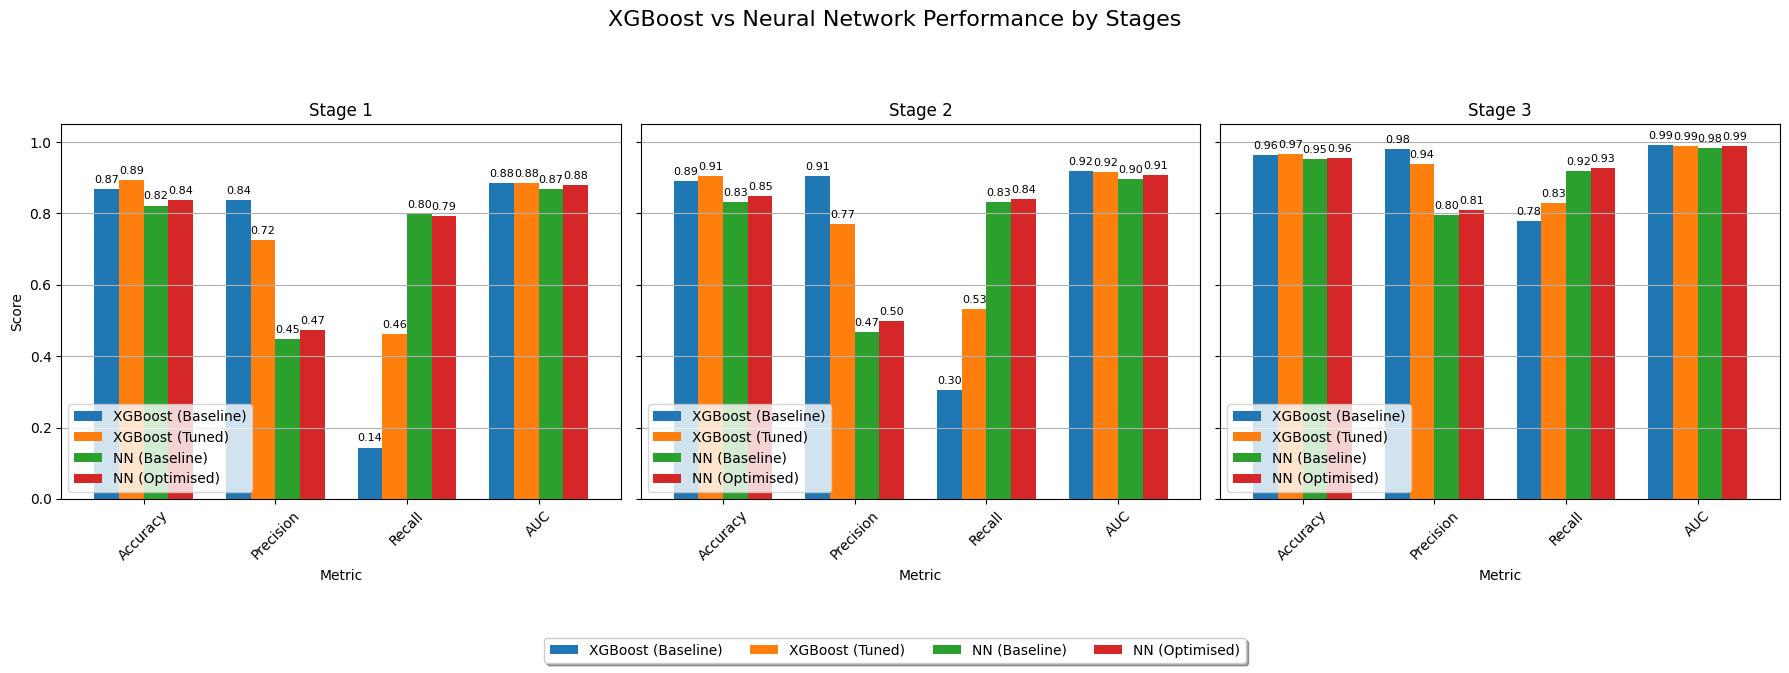

In [126]:

# Unified labels for models and stages
model_labels = ['XGBoost (Baseline)', 'XGBoost (Tuned)', 'NN (Baseline)', 'NN (Optimised)']
stage_labels = ['Stage 1', 'Stage 2', 'Stage 3']

# Metrics to plot and unified display names
plot_metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']
metric_mapping_xgb = {
    'Accuracy': 'Accuracy',
    'Precision': 'Precision (Dropout)',
    'Recall': 'Recall (Dropout)',
    'AUC': 'ROC AUC'
}

# Function to compute XGBoost metrics
def get_xgb_metrics(model, X_test, y_test, threshold=None):
    if threshold is not None:
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_pred = model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Dropout)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Dropout)': recall_score(y_test, y_pred, pos_label=1),
        'ROC AUC': roc_auc
    }

# Function to extract NN metrics
def get_nn_metrics(metrics_list):
    return {
        'Accuracy': metrics_list[0],
        'Precision': metrics_list[1],
        'Recall': metrics_list[2],
        'F1 Score': metrics_list[3],
        'AUC': metrics_list[4]
    }

# Compile results per stage
stage_results = {
    'Stage 1': {
        'XGBoost (Baseline)': get_xgb_metrics(xgb_weighted, X1_test, y1_test, threshold=0.5),
        'XGBoost (Tuned)': get_xgb_metrics(xgb_best_s1, X1_test, y1_test, threshold=0.2),
        'NN (Baseline)': get_nn_metrics(baseline_values_s1),
        'NN (Optimised)': get_nn_metrics(tuned_values_s1),
    },
    'Stage 2': {
        'XGBoost (Baseline)': get_xgb_metrics(xgb_weighted_s2, X2_test, y2_test, threshold=0.5),
        'XGBoost (Tuned)': get_xgb_metrics(xgb_best_s2, X2_test, y2_test, threshold=0.2),
        'NN (Baseline)': get_nn_metrics(baseline_values_s2),
        'NN (Optimised)': get_nn_metrics(tuned_values_s2),
    },
    'Stage 3': {
        'XGBoost (Baseline)': get_xgb_metrics(xgb_weighted_s3, X3_test, y3_test, threshold=0.5),
        'XGBoost (Tuned)': get_xgb_metrics(xgb_best_s3, X3_test, y3_test, threshold=0.2),
        'NN (Baseline)': get_nn_metrics(baseline_values_s3),
        'NN (Optimised)': get_nn_metrics(tuned_values_s3),
    }
}

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, stage in enumerate(stage_labels):
    results = stage_results[stage]

    # Prepare data per model using consistent metric keys
    data_to_plot = {
        'XGBoost (Baseline)': [results['XGBoost (Baseline)'][metric_mapping_xgb[m]] for m in plot_metrics],
        'XGBoost (Tuned)': [results['XGBoost (Tuned)'][metric_mapping_xgb[m]] for m in plot_metrics],
        'NN (Baseline)': [results['NN (Baseline)'][m] for m in plot_metrics],
        'NN (Optimised)': [results['NN (Optimised)'][m] for m in plot_metrics],
    }

    # Create DataFrame for plotting
    df = pd.DataFrame(data_to_plot, index=plot_metrics).T
    df = df.loc[model_labels]  # ensure correct order

    ax = df.T.plot(kind='bar', ax=axes[i], ylim=(0, 1.05), width=0.75, rot=45, title=stage, fontsize=10)

    # Annotate bars with values
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

    ax.set_xlabel("Metric")
    ax.set_ylabel("Score" if i == 0 else "")
    ax.grid(axis='y')

# Shared legend
fig.legend(model_labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, fancybox=True, shadow=True)

# Title and layout
plt.suptitle("XGBoost vs Neural Network Performance by Stages", fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0.07, 1, 0.98])
plt.show()


Progressive improvement  across stages highlights how additional
information about the learners boosts model’s predictive power.

Overall, The neural network performed better with a deeper architecture (64, 32), low learning rate (0.0001), and small L2 regularization (0.0001) because these settings allowed the model to learn complex patterns gradually and effectively without overfitting. The deeper layers captured more abstract relationships, the low learning rate ensured stable convergence, and the small L2 penalty helped maintain generalization by lightly constraining weight magnitudes. This combination led to higher accuracy and reduced error on both training and validation sets.

The XGBoost model performed well with parameters like a moderate learning rate (0.1), controlled tree depth (max_depth=5), and a sufficient number of trees (n_estimators=150), which together helped balance learning capacity and overfitting. The relatively shallow trees prevent overly complex splits, while the number of estimators allows the model to learn progressively. Additionally, the low scale_pos_weight (~0.176) accounts for class imbalance by reducing the emphasis on the majority class, encouraging the model to better identify dropouts. This combination led to a strong balance between precision and recall, improving predictive performance.










# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
